In [2]:
# import libraries
from matplotlib import pyplot as plt
import numpy as np
import struct

In [15]:
# house variable for hexidecimal bytes
HEXADECIMAL_BYTES = [
    0xAE73, 0xAD5A, 0xAA5A, 0xB63, 0xC63, 0x8B52, 0xEB62, 0xED62, 0x4C6B, 0x6D73, 0xAC5A, 0x4A52, 0xC95A, 0xAB52, 0xEA62, 0xC63, 0x4D6B, 0x4D6B, 0xC6B, 0xEC6A, 0xEC62, 0xC63, 0x2B6B, 0x4D73, 0x2E73, 0x2D73, 0xD6B, 0xC73, 0x2C6B, 0x8E73, 0xF84, 0xAF7B, 0x8E73, 0x8E73, 0x2D6B, 0xD6B, 0x8C52, 0xA42, 0xE818, 0xE418, 0xA510, 0xC410, 0xE410, 0xE410, 0xE410, 0x519, 0xE518, 0xC518, 0x8631, 0x494A, 0x6C73, 0xB09C, 0x14A5, 0xF4A4, 0xF4A4, 0x13AD, 0x34AD, 0x34AD, 0x34AD, 0x55AD, 0x55B5, 0x55B5, 0x75B5, 0x55B5, 0x55AD, 0x34AD, 0x34AD, 0x54AD, 0x74B5, 0x54AD, 0x54AD, 0x54AD, 0x54AD, 0x54AD, 0xB4B5, 0xB5B5, 0x95B5, 0xB6BD, 0xD6BD, 0xF6BD, 0x16C6, 0x16BE, 0x37BE, 0xB8AD, 0x948C, 0x9184, 0xB28C, 0xB28C, 0xB28C, 0xB28C, 0xB28C, 0xD28C, 0xD28C, 0xD28C, 0xF28C, 0xF28C, 0xF28C, 0xF38C, 0xF28C, 0xF28C, 0xF294, 0xD294, 0xD294, 0xD394, 0xD394, 0xF394, 0xF294, 0xF394, 0xF394, 0xF394, 0xF394, 0xF394, 0xF394, 0x1395, 0x1395, 0x139D, 0x139D, 0x139D, 0x3395, 0x139D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x349D, 0x349D, 0x349D, 0x549D, 0x549D, 0x549D, 0x549D, 0x54A5, 0x549D, 0x549D, 0x749D, 0x549D, 0x74A5, 0x749D, 0x749D, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x75A5, 0x75A5, 0x75A5, 0x95A5, 0x94A5, 0x95A5, 0x75A5, 0x95A5, 0x95A5, 0x94A5, 0x94A5, 0x95A5, 0x95A5, 0x95A5, 0x95A5, 0x95A5, 0x95A5, 0x95AD, 0x95AD, 0x95AD, 0x75AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95A5, 0x95AD, 0x6C63, 0xCC52, 0x2B63, 0xEB5A, 0xEC62, 0xA42, 0x2952, 0xAC5A, 0xAB52, 0xCB5A, 0xAB5A, 0x8B52, 0xA952, 0xAA52, 0x8A52, 0xAB5A, 0xCB62, 0xEC62, 0x2D6B, 0xC6B, 0xC6B, 0xCB5A, 0xCB5A, 0xC63, 0x6E73, 0x4D73, 0xCD62, 0xAC62, 0xAC62, 0x4D6B, 0x4C6B, 0x8E73, 0x8E73, 0x8E73, 0x4E6B, 0x2D63, 0x6C4A, 0xA931, 0x6729, 0x419, 0xE418, 0xC410, 0xC410, 0xE418, 0xC418, 0xC418, 0xE418, 0x529, 0xA639, 0xE849, 0x6C7B, 0xB09C, 0xF49C, 0xF4A4, 0x14A5, 0x14A5, 0x34A5, 0x34A5, 0x14A5, 0x34AD, 0x55AD, 0x55AD, 0x54AD, 0x55AD, 0x34AD, 0x34AD, 0x34A5, 0x34AD, 0x34AD, 0x34AD, 0x54AD, 0x54AD, 0x54AD, 0x54AD, 0x75AD, 0xB5B5, 0xB5B5, 0x96B5, 0xB6B5, 0xF6BD, 0x16BE, 0x16BE, 0x36C6, 0x37BE, 0xB58C, 0x9384, 0xB28C, 0xD28C, 0xD28C, 0xD28C, 0xD28C, 0xD28C, 0xB28C, 0xD28C, 0xD28C, 0xD28C, 0xD294, 0xF294, 0xF294, 0xD294, 0xD294, 0xF294, 0xD394, 0xD294, 0xF294, 0xD394, 0xF294, 0xF394, 0x1395, 0x1395, 0x1395, 0x1395, 0xF394, 0x1395, 0x1395, 0x1395, 0x1395, 0x3395, 0x139D, 0x139D, 0x139D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x349D, 0x549D, 0x549D, 0x549D, 0x34A5, 0x34A5, 0x34A5, 0x54A5, 0x54A5, 0x549D, 0x749D, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x94A5, 0x94A5, 0x75A5, 0x75A5, 0x95A5, 0x95A5, 0x94A5, 0x74A5, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95A5, 0x95A5, 0x95AD, 0x95AD, 0x75A5, 0x95A5, 0x95AD, 0x95AD, 0x95AD, 0x95A5, 0x95A5, 0x95A5, 0xC5B, 0x6B6B, 0xEC5A, 0x8A52, 0x6A4A, 0xE941, 0x94A, 0x6A5A, 0x6A52, 0x4A52, 0x8B52, 0x8B52, 0xAA52, 0xAB52, 0xAB52, 0x8B5A, 0x8B5A, 0xCC62, 0xD6B, 0x4D6B, 0x4D6B, 0x2C63, 0xCC5A, 0xCB5A, 0xC6B, 0xD6B, 0xCC62, 0xCB62, 0x8B5A, 0x2D6B, 0x2C63, 0x8E73, 0x8E73, 0xD6B, 0x6D6B, 0x4D6B, 0x8C52, 0x8A31, 0x2821, 0x519, 0xE518, 0x519, 0xE518, 0x519, 0x2519, 0x2619, 0x2521, 0x521, 0x8739, 0xEA62, 0xF84, 0xB19C, 0x13A5, 0x33A5, 0x34AD, 0x34AD, 0x35AD, 0x34A5, 0x34AD, 0x54AD, 0x54AD, 0x34AD, 0x34AD, 0x34AD, 0x34AD, 0x34AD, 0x34A5, 0x34A5, 0x14AD, 0x34AD, 0x34AD, 0x54AD, 0x54AD, 0x54AD, 0x74AD, 0x75AD, 0x95B5, 0x95B5, 0x96B5, 0xD6BD, 0x16BE, 0x16BE, 0x16BE, 0x17BE, 0x169D, 0x928C, 0xB28C, 0xB28C, 0xD28C, 0xB28C, 0xB28C, 0xB28C, 0xB28C, 0xD28C, 0xD28C, 0xD28C, 0xD28C, 0xF28C, 0xF294, 0xF294, 0xF294, 0xF294, 0xD28C, 0xD28C, 0xF294, 0xD394, 0xF294, 0xF394, 0x1395, 0x1395, 0x1395, 0xF394, 0xF394, 0x1395, 0x1395, 0x1395, 0x1395, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x339D, 0x339D, 0x339D, 0x339D, 0x349D, 0x339D, 0x339D, 0x339D, 0x339D, 0x549D, 0x549D, 0x549D, 0x549D, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x549D, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x94A5, 0x94A5, 0x95A5, 0x75A5, 0x75A5, 0x95A5, 0x94A5, 0x94A5, 0x95AD, 0x95AD, 0x95AD, 0x95A5, 0x95A5, 0x95AD, 0x95AD, 0x95AD, 0xB5AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95A5, 0x95A5, 0x95AD, 0xCB52, 0x2A5B, 0xEC5A, 0x8A52, 0x8A52, 0xA42, 0xA4A, 0x8B52, 0x6A52, 0x8A52, 0x6A4A, 0x6A4A, 0x8A52, 0xAB52, 0x6B52, 0x6B52, 0x6B5A, 0xCC5A, 0x6E6B, 0x8D6B, 0x8D6B, 0x8D6B, 0xCD5A, 0xCC5A, 0xC63, 0xC63, 0xD63, 0xAB5A, 0xCC5A, 0xEB5A, 0x4E63, 0x8E73, 0x4E6B, 0xE63, 0x4C6B, 0x4E63, 0x8C52, 0xC939, 0x2729, 0xE618, 0x521, 0x4621, 0x4521, 0x4629, 0xA629, 0x8629, 0x6629, 0x6629, 0x2742, 0x6B6B, 0x5184, 0x728C, 0xF39C, 0xD39C, 0xB39C, 0xB39C, 0xF4A4, 0x14A5, 0x14A5, 0x34A5, 0x14A5, 0xF4A4, 0x34A5, 0x54A5, 0x34A5, 0x14A5, 0x149D, 0x14A5, 0x14A5, 0x14AD, 0x34A5, 0x54AD, 0x54AD, 0x54AD, 0x54AD, 0x74AD, 0x95B5, 0xB6B5, 0x96B5, 0xB6B5, 0xD6B5, 0xF6BD, 0x16BE, 0x56C6, 0x97B5, 0x748C, 0xB18C, 0xB28C, 0xD28C, 0xB28C, 0xB28C, 0xB28C, 0xB28C, 0xD28C, 0xD28C, 0xF28C, 0xF28C, 0xF294, 0xF394, 0xD28C, 0xF28C, 0xF294, 0x1295, 0xF394, 0x1395, 0x1395, 0xF394, 0x1395, 0x1395, 0x1395, 0x1395, 0x1395, 0x1395, 0x1395, 0xF394, 0x139D, 0x1395, 0x139D, 0x139D, 0x139D, 0x139D, 0x339D, 0x339D, 0x339D, 0x339D, 0x349D, 0x349D, 0x349D, 0x339D, 0x339D, 0x549D, 0x549D, 0x549D, 0x549D, 0x34A5, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x94A5, 0x74A5, 0x94A5, 0x95A5, 0x95A5, 0x95A5, 0x75A5, 0x75A5, 0x94A5, 0x94A5, 0x95A5, 0x95A5, 0x75AD, 0x95AD, 0x95A5, 0x95AD, 0x95A5, 0x95A5, 0xB5AD, 0x95AD, 0x95AD, 0x95A5, 0xB5A5, 0x95A5, 0x95A5, 0x95AD, 0x894A, 0x6A4A, 0xCA5A, 0xAA52, 0xCB5A, 0x6B4A, 0x942, 0x2A4A, 0x4A4A, 0x8A52, 0xAB52, 0xCC52, 0xEC5A, 0xCC5A, 0xEC5A, 0xEC5A, 0xC63, 0x2D63, 0x6D6B, 0x6E6B, 0x8E6B, 0x6E6B, 0xCE5A, 0xEC5A, 0xC63, 0x2D63, 0x2D63, 0xC5B, 0xCC5A, 0xAB52, 0x4E6B, 0x6D6B, 0xD63, 0xD63, 0x4D6B, 0xE63, 0x4C42, 0xA3A, 0xCA31, 0x6729, 0x4621, 0x8729, 0x8729, 0x6629, 0x8629, 0xA831, 0xA731, 0xC731, 0x2842, 0x8B6B, 0x4F84, 0x718C, 0x9194, 0x9294, 0x9294, 0x9294, 0xB29C, 0xF3A4, 0xF3A4, 0xF3A4, 0x14A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x14A5, 0x14A5, 0xF3A4, 0xF3A4, 0x13A5, 0x14A5, 0x34A5, 0x34A5, 0x34A5, 0x34AD, 0x54AD, 0x95B5, 0x75B5, 0x76B5, 0xB6B5, 0xB5BD, 0xD6B5, 0xF7BD, 0xF6BD, 0x38BE, 0x369D, 0x7284, 0xB18C, 0xD28C, 0xD28C, 0xD28C, 0xB28C, 0xB28C, 0xD28C, 0xD28C, 0xF294, 0xF28C, 0xD28C, 0xD28C, 0xD394, 0xF294, 0xF28C, 0xF294, 0xF394, 0xF294, 0x1395, 0x1395, 0x1395, 0xF394, 0x1395, 0x1395, 0x1395, 0x1395, 0x1395, 0x1395, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x149D, 0x339D, 0x339D, 0x339D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x549D, 0x549D, 0x549D, 0x549D, 0x34A5, 0x349D, 0x54A5, 0x54A5, 0x34A5, 0x54A5, 0x74A5, 0x55A5, 0x54A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x94A5, 0x74A5, 0x94A5, 0x95A5, 0x95A5, 0x95A5, 0x75A5, 0x75A5, 0x75A5, 0x95A5, 0x95A5, 0x95AD, 0x95AD, 0x95A5, 0x95AD, 0x95AD, 0x95A5, 0x95A5, 0x95A5, 0x95AD, 0x95AD, 0x95A5, 0x95A5, 0xB5A5, 0xB5AD, 0xB5A5, 0x4942, 0xA3A, 0x684A, 0xB5B, 0xEB5A, 0x6C4A, 0xE941, 0x2A4A, 0x8B52, 0xCB5A, 0xCC52, 0xC5B, 0xEC52, 0x2D5B, 0x4C63, 0x4D63, 0x4D63, 0x2D63, 0x2D63, 0x4D63, 0x6E6B, 0x4E63, 0xE5B, 0xC5B, 0xC5B, 0x2D63, 0x4D63, 0x2C5B, 0xEC52, 0xCB52, 0x6D63, 0x6D63, 0x4D63, 0x2D5B, 0x4C63, 0xE63, 0x8B4A, 0xC53, 0xCC4A, 0xE931, 0xA831, 0xE831, 0xE831, 0xA831, 0xE739, 0x93A, 0x93A, 0x942, 0x2942, 0xCE73, 0x5184, 0x3284, 0x928C, 0xF294, 0xF394, 0xD394, 0xB294, 0xF39C, 0xF394, 0xF39C, 0x139D, 0x149D, 0x149D, 0x139D, 0x339D, 0x54A5, 0x34A5, 0x149D, 0x139D, 0x14A5, 0x34A5, 0x149D, 0x33A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x54AD, 0x75AD, 0xB6B5, 0xB5B5, 0xB6B5, 0xF7BD, 0x17BE, 0x36BE, 0xB7AD, 0x948C, 0xF28C, 0xD28C, 0xB28C, 0xB28C, 0xB28C, 0xB28C, 0xB28C, 0xD28C, 0xD28C, 0xB28C, 0xD28C, 0xD28C, 0xD38C, 0xF394, 0xF28C, 0xF294, 0xF394, 0xF394, 0x1395, 0x1395, 0xF394, 0xF394, 0xF394, 0xF394, 0x1395, 0x1395, 0x1395, 0x1395, 0x1395, 0x139D, 0x139D, 0x139D, 0x149D, 0x139D, 0x149D, 0x349D, 0x339D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x549D, 0x549D, 0x54A5, 0x549D, 0x549D, 0x34A5, 0x54A5, 0x35A5, 0x549D, 0x549D, 0x749D, 0x749D, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x95A5, 0x95A5, 0x95AD, 0x95A5, 0x95A5, 0x95A5, 0x95A5, 0x95AD, 0x95A5, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0xB5AD, 0xB5A5, 0xB5AD, 0xB5AD, 0x293A, 0xE939, 0x2842, 0xEC5A, 0xAC4A, 0x4C42, 0xA939, 0x894A, 0x2E5B, 0x4C5B, 0xED52, 0xED52, 0xCC52, 0x2D5B, 0x2D5B, 0xC5B, 0x2D63, 0xC5B, 0x2C5B, 0x2D63, 0x2D5B, 0x2D5B, 0x2E5B, 0x2D5B, 0x2D5B, 0x4E63, 0x2D5B, 0x4D5B, 0x2D5B, 0x8C4A, 0x4D6B, 0xD5B, 0x4D63, 0x6D63, 0xED5A, 0x6E6B, 0x6E63, 0x4F5B, 0xAD6B, 0xCD4A, 0x8A42, 0xAA4A, 0xAB4A, 0x8B42, 0xAA42, 0xAB4A, 0xAB4A, 0xEC52, 0xEB52, 0xF7C, 0x307C, 0x107C, 0x3084, 0x5184, 0x7184, 0x5184, 0x7184, 0x7184, 0xB28C, 0xD294, 0xD294, 0xB294, 0xB294, 0xD394, 0xF39C, 0xF39C, 0xF39C, 0xD394, 0xD394, 0xF49C, 0x13A5, 0xF39C, 0x14A5, 0x14A5, 0x34A5, 0x34A5, 0x34A5, 0x34AD, 0x74AD, 0x95B5, 0x95B5, 0x95B5, 0xF6BD, 0xF6BD, 0x16BE, 0x37BE, 0x569D, 0xF28C, 0xF28C, 0x1395, 0xD28C, 0xD28C, 0xD28C, 0xB294, 0xD28C, 0xD28C, 0xD28C, 0xD28C, 0xD28C, 0xF28C, 0xD28C, 0xF28C, 0xF294, 0xF394, 0xF294, 0xF394, 0xF394, 0xF394, 0xF394, 0xF394, 0x1395, 0x1395, 0x1395, 0x1395, 0x1395, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x149D, 0x349D, 0x349D, 0x349D, 0x339D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x339D, 0x549D, 0x549D, 0x54A5, 0x549D, 0x549D, 0x34A5, 0x54A5, 0x34A5, 0x549D, 0x54A5, 0x549D, 0x54A5, 0x74A5, 0x75A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x75A5, 0x74A5, 0x74A5, 0x74A5, 0x75A5, 0x95A5, 0x95A5, 0x94AD, 0x95A5, 0x95A5, 0x95A5, 0x95AD, 0x95AD, 0x95A5, 0x95AD, 0x95AD, 0x95AD, 0x95A5, 0x95AD, 0xB5A5, 0xB5AD, 0xB5AD, 0x93A, 0x93A, 0xE939, 0x494A, 0x4A4A, 0x2A42, 0x4A42, 0x884A, 0xD5B, 0xC53, 0x4D5B, 0xCC4A, 0xCC4A, 0x4D5B, 0x2D5B, 0xD5B, 0xC53, 0xD53, 0xEC52, 0xED52, 0xD53, 0x2D53, 0xED52, 0x8D4A, 0xAD52, 0xAD4A, 0xED52, 0x2D53, 0x2D53, 0xAD4A, 0xAB52, 0x2D5B, 0x4D5B, 0x6D63, 0x4F5B, 0x2D5B, 0x4E63, 0x2F5B, 0x2D5B, 0xB063, 0xD53, 0xEC52, 0xED52, 0xCC4A, 0xEB4A, 0x4C5B, 0x4D5B, 0x4D63, 0x2E63, 0x2D63, 0x8F63, 0xAF6B, 0x6F6B, 0xD073, 0xF073, 0xCF6B, 0xEF73, 0x3074, 0x507C, 0x517C, 0x7184, 0x7184, 0x7284, 0x9284, 0xD394, 0xB38C, 0xB38C, 0x928C, 0x928C, 0x139D, 0xF49C, 0xD394, 0x139D, 0x139D, 0x149D, 0xF39C, 0x34A5, 0x54A5, 0x34A5, 0x34A5, 0x54AD, 0x95AD, 0x96AD, 0xB6B5, 0xF5B5, 0x36BE, 0x56A5, 0x938C, 0xF294, 0xF394, 0xF394, 0xD38C, 0xD294, 0xD294, 0xD28C, 0xD28C, 0xD28C, 0xB28C, 0xD294, 0xD28C, 0xD294, 0xF294, 0xD294, 0xF28C, 0xF294, 0xF394, 0xF394, 0xF394, 0xF394, 0xF394, 0xF394, 0x1395, 0x1395, 0x1395, 0x1395, 0x1395, 0x1395, 0x139D, 0x1395, 0x139D, 0x139D, 0x149D, 0x149D, 0x349D, 0x349D, 0x339D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x549D, 0x539D, 0x549D, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x549D, 0x54A5, 0x74A5, 0x55A5, 0x75A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x75A5, 0x74A5, 0x74A5, 0x74A5, 0x75A5, 0x95A5, 0x95A5, 0x94A5, 0x94A5, 0x95A5, 0x95A5, 0x95A5, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x75AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x93A, 0x93A, 0xC939, 0x694A, 0x6B42, 0xCB52, 0xC5B, 0xAC4A, 0xD5B, 0xED52, 0x2D5B, 0xCC4A, 0xEC4A, 0x6D5B, 0xD53, 0xED52, 0xC53, 0x4E5B, 0xC53, 0xCC52, 0xAB4A, 0xAC4A, 0xEC52, 0x8D52, 0xCD52, 0xCD52, 0xAD4A, 0xCC4A, 0x8B42, 0xAC52, 0x8C4A, 0xEE52, 0x4D5B, 0xED52, 0x6D63, 0x4D63, 0xE5B, 0x8E6B, 0x2E53, 0x8F63, 0x6E5B, 0xD53, 0x2D53, 0x4D53, 0xD4B, 0x4D53, 0x8E63, 0x2E53, 0x4D63, 0x6D63, 0x4E63, 0x8F6B, 0x4E63, 0x6F6B, 0xAE6B, 0x8F6B, 0xAE6B, 0xAE6B, 0xEF73, 0xCF73, 0xF073, 0x317C, 0x117C, 0xD073, 0x5184, 0x5284, 0x728C, 0x7184, 0x517C, 0x928C, 0xD494, 0xF394, 0x339D, 0x349D, 0x349D, 0x149D, 0x139D, 0x34A5, 0x54A5, 0x34A5, 0x54A5, 0x74A5, 0x95AD, 0x95AD, 0x95B5, 0xB5AD, 0x95A5, 0x7484, 0xF294, 0xF394, 0x1395, 0xF38C, 0xD38C, 0xD394, 0xF28C, 0xF28C, 0xF28C, 0xF394, 0xD38C, 0xD28C, 0xD294, 0xD294, 0xD294, 0xD294, 0xF394, 0xF394, 0xD394, 0xF394, 0xF394, 0x1395, 0x1395, 0x1395, 0x1395, 0x1395, 0x1395, 0x1395, 0x1395, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x339D, 0x339D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x549D, 0x549D, 0x54A5, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x53A5, 0x54A5, 0x549D, 0x54A5, 0x54A5, 0x55A5, 0x55A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x75A5, 0x75A5, 0x74A5, 0x74A5, 0x75A5, 0x95A5, 0x95A5, 0x94A5, 0x94A5, 0x95A5, 0x95A5, 0x95A5, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0xB5AD, 0xB5AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x2942, 0x4A42, 0x4A42, 0xAB4A, 0xAB4A, 0xCC52, 0xEC52, 0xCD52, 0x2D5B, 0x4E5B, 0xCC52, 0xCC4A, 0xAC4A, 0xCC4A, 0xED52, 0xED4A, 0xED4A, 0x2E53, 0xEC52, 0xCD4A, 0xCC4A, 0xCD4A, 0xD53, 0xCD4A, 0xAC4A, 0xAC4A, 0x8C42, 0xAB4A, 0xAC4A, 0xCC4A, 0x6C42, 0xEE52, 0xCC4A, 0xCD4A, 0xEC52, 0xED52, 0xEE52, 0xAF6B, 0x8F63, 0xAF63, 0xD53, 0x6E63, 0x4E5B, 0x2D53, 0x2D53, 0xD4B, 0xC53, 0xE53, 0x2D5B, 0x6E63, 0x9063, 0x4E5B, 0x4E5B, 0x8E63, 0x2E5B, 0x2E5B, 0x2F63, 0xEE5A, 0xED5A, 0x6F63, 0x6E63, 0x6F63, 0xAF6B, 0x8F6B, 0xCF73, 0x1174, 0xF173, 0x706B, 0x8F6B, 0xF7C, 0x7184, 0x7284, 0x928C, 0xD28C, 0xF394, 0x1395, 0x1495, 0x359D, 0x349D, 0x549D, 0x549D, 0x559D, 0x95AD, 0x75A5, 0x75A5, 0xD5AD, 0xB5AD, 0xD48C, 0xF394, 0x139D, 0x149D, 0xF394, 0xF394, 0xF394, 0xF294, 0xF28C, 0xF28C, 0xD294, 0xD394, 0xD294, 0xD394, 0xD294, 0xD294, 0xD294, 0xD294, 0xF394, 0xF394, 0xF394, 0xF394, 0x1395, 0x1395, 0x1395, 0x1395, 0x1395, 0x1395, 0x1395, 0x1395, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x339D, 0x339D, 0x349D, 0x349D, 0x149D, 0x349D, 0x349D, 0x349D, 0x349D, 0x549D, 0x549D, 0x349D, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x55A5, 0x55A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x74A5, 0x74A5, 0x95A5, 0x95A5, 0x95A5, 0x94A5, 0x94A5, 0x95A5, 0x95A5, 0x95AD, 0x95A5, 0x95AD, 0x95A5, 0x95AD, 0xB5AD, 0x95A5, 0x95AD, 0x95A5, 0x95AD, 0xB5A5, 0x8B42, 0xAB42, 0xAC42, 0xCB4A, 0xAC42, 0xAC4A, 0xEC52, 0xCE52, 0xED5A, 0xEE52, 0xAC4A, 0x8C4A, 0xCC4A, 0x8C4A, 0xAD4A, 0xAD4A, 0x6C4A, 0x8C52, 0x4B42, 0xC5B, 0xAC4A, 0xAC4A, 0xAC4A, 0x8C4A, 0xCC52, 0xAB4A, 0xAC42, 0xAB4A, 0xCC4A, 0xCC4A, 0x8C42, 0xE53, 0xED52, 0xE4B, 0xD53, 0x6D4A, 0x4C42, 0x2D5B, 0x4E5B, 0x4E63, 0xAD52, 0xD5B, 0xD5B, 0x8D4A, 0xAD4A, 0xAC4A, 0x4B42, 0x2D63, 0x2D63, 0xE5B, 0x2E63, 0xCD52, 0xAC52, 0xAD6B, 0x6F63, 0xF63, 0xE5B, 0xE63, 0xCD52, 0x2E63, 0x6E6B, 0x4E63, 0x4E63, 0x8F6B, 0xAF6B, 0x1174, 0x107C, 0x4F63, 0x4D63, 0xCD73, 0x307C, 0xF173, 0x8F6B, 0xF84, 0x7184, 0x9284, 0xB38C, 0xD394, 0xB38C, 0xD38C, 0xF394, 0xD394, 0x139D, 0x54A5, 0x74A5, 0x95A5, 0x75A5, 0x359D, 0xF494, 0x149D, 0x149D, 0xF494, 0xF394, 0x1395, 0xF394, 0xF394, 0xF394, 0xF394, 0xF394, 0xF394, 0xF394, 0xD394, 0xD394, 0xD394, 0xD394, 0xD394, 0xF394, 0xF394, 0xF394, 0x1395, 0x1395, 0xF394, 0x1395, 0x1395, 0x1395, 0x1395, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x339D, 0x339D, 0x339D, 0x349D, 0x149D, 0x149D, 0x349D, 0x349D, 0x349D, 0x549D, 0x549D, 0x349D, 0x34A5, 0x549D, 0x549D, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x94A5, 0x95A5, 0x95A5, 0x95A5, 0x95A5, 0x95A5, 0x95A5, 0x95AD, 0x95AD, 0x95AD, 0x95A5, 0x95AD, 0x95AD, 0x95A5, 0x95A5, 0x95AD, 0xB5A5, 0x8B42, 0x8B42, 0x8B42, 0xCB4A, 0x8C42, 0xAC42, 0xAC4A, 0x8E4A, 0x8C4A, 0xEE52, 0xAD4A, 0xAC42, 0xAC4A, 0xAC42, 0xCD4A, 0xCD4A, 0xAC4A, 0x8C4A, 0x4B3A, 0xEC52, 0x6C42, 0xAD4A, 0xAC4A, 0x4C42, 0xAB4A, 0xCC4A, 0xCB4A, 0x8B42, 0xCC4A, 0xAC4A, 0xCD4A, 0xCD4A, 0xEC4A, 0xEE4A, 0xED4A, 0xCE4A, 0xAD4A, 0xAC4A, 0xCD4A, 0xCD52, 0xED52, 0xCE4A, 0xED52, 0xCF52, 0x6D4A, 0x8C4A, 0x8C4A, 0xD5B, 0xD5B, 0xEF5A, 0xEE5A, 0xCD52, 0xEE52, 0x2C5B, 0x6F63, 0x2F5B, 0xE5B, 0x2D5B, 0x6F63, 0x4E5B, 0x6E63, 0xAF6B, 0x4F63, 0x4E63, 0xCF6B, 0x3274, 0xF073, 0x6F63, 0x4E63, 0x2D5B, 0xAF63, 0x1074, 0x1174, 0xD073, 0xF073, 0x517C, 0x7284, 0x317C, 0x517C, 0x727C, 0x7284, 0x7284, 0xD28C, 0x1395, 0xF394, 0x3495, 0x749D, 0x549D, 0x349D, 0x539D, 0x3495, 0x1495, 0x3495, 0x3395, 0x1395, 0x1395, 0xF394, 0xF394, 0xF394, 0xF294, 0xF394, 0xD394, 0xD394, 0xD394, 0xF394, 0xD394, 0xD394, 0xD394, 0x1295, 0x1395, 0xF394, 0xF394, 0x1395, 0x1395, 0x1395, 0x1395, 0x1395, 0xF394, 0x149D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x149D, 0x339D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x549D, 0x549D, 0x549D, 0x349D, 0x349D, 0x34A5, 0x54A5, 0x54A5, 0x549D, 0x549D, 0x549D, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x75A5, 0x74A5, 0x74A5, 0x74A5, 0x75A5, 0x74A5, 0x74A5, 0x74A5, 0x95A5, 0x95A5, 0x95A5, 0x95A5, 0x95A5, 0x95A5, 0x95A5, 0x95A5, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0xB5AD, 0x8B42, 0x8B42, 0x8B42, 0xAB42, 0xAB42, 0xCC4A, 0x6C42, 0xED52, 0xAC4A, 0xF53, 0xCD4A, 0x8C42, 0x8C42, 0x4C42, 0xED52, 0xCD4A, 0xAC4A, 0x8C4A, 0x4B42, 0xEC52, 0x6C42, 0xED52, 0xAC4A, 0x6B42, 0x6942, 0x6B42, 0xAB4A, 0x4A42, 0x6C4A, 0x6B42, 0x8C4A, 0xAC4A, 0x6D42, 0x8C4A, 0x6C42, 0x6C42, 0xAC4A, 0xEC52, 0xEE52, 0xCC4A, 0x8C42, 0xC53, 0xD53, 0xEE52, 0xCD52, 0x6D42, 0x8C4A, 0xC5B, 0x6D42, 0xD53, 0xE5B, 0x8D4A, 0xD5B, 0xED5A, 0xE5B, 0x8E6B, 0x2F5B, 0xCE52, 0xED5A, 0x4D6B, 0xEF5A, 0xE63, 0x2E63, 0xEE5A, 0x2D63, 0x906B, 0x7063, 0xF5B, 0x4D6B, 0x6D63, 0x4E63, 0xAF6B, 0xF073, 0xCF6B, 0x6E63, 0xAE6B, 0x107C, 0xD073, 0xF073, 0x3074, 0x3074, 0x1074, 0x2F7C, 0x7184, 0x7184, 0x7184, 0x9284, 0xB38C, 0xB38C, 0x739D, 0x959D, 0x559D, 0x549D, 0x549D, 0x1495, 0x1395, 0xF394, 0xF394, 0xF394, 0xF394, 0xF394, 0xF394, 0xF394, 0xD494, 0xD394, 0xF394, 0xF394, 0xD394, 0x1395, 0xF394, 0xF394, 0xF294, 0x1395, 0x1395, 0x1395, 0x1395, 0xF394, 0x1395, 0x339D, 0x1395, 0x339D, 0x339D, 0x139D, 0x339D, 0x149D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x349D, 0x349D, 0x349D, 0x549D, 0x349D, 0x349D, 0x34A5, 0x349D, 0x549D, 0x54A5, 0x54A5, 0x549D, 0x549D, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x75A5, 0x74A5, 0x74A5, 0x74A5, 0x94A5, 0x95A5, 0x75A5, 0x95A5, 0x95A5, 0x95A5, 0x95A5, 0x95AD, 0x95A5, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x6B42, 0x8B42, 0x6B42, 0x8B42, 0xEC42, 0xAD42, 0x6B3A, 0xCD4A, 0x4C3A, 0xAD42, 0xAC42, 0xCD4A, 0x6C42, 0x4B3A, 0xAC42, 0x8C42, 0xCD4A, 0x8C42, 0x8C42, 0xEC4A, 0xAD4A, 0xCC4A, 0x8B42, 0x6C42, 0x6A42, 0x8B42, 0xCB4A, 0x6B42, 0x6C4A, 0x6B42, 0x8D4A, 0x8D4A, 0x6D42, 0x8C4A, 0x6C42, 0x6C42, 0x8C42, 0xCB4A, 0x8D42, 0x8B42, 0xAD4A, 0xAB4A, 0xCC4A, 0xAD4A, 0xAC4A, 0x4D42, 0x8C4A, 0x8B4A, 0x4D42, 0xAD4A, 0xCD52, 0xCE52, 0x8C4A, 0xCD52, 0x2F63, 0x2F5B, 0xE5B, 0xCE52, 0xCE52, 0x2C63, 0xEE52, 0x2F5B, 0x4E5B, 0xF5B, 0x4E63, 0x4F63, 0x6F63, 0x2F5B, 0x4E63, 0x4E5B, 0x4F63, 0x6F6B, 0x6E63, 0xEF6B, 0xF06B, 0xAF6B, 0xAF63, 0x3074, 0xF173, 0xB06B, 0xEF6B, 0x1074, 0xEF6B, 0x5074, 0x1174, 0xF173, 0x317C, 0x317C, 0x117C, 0xB18C, 0xF38C, 0xF38C, 0xF38C, 0x1395, 0x549D, 0x549D, 0x3495, 0x1495, 0x1395, 0xF394, 0xF394, 0xF394, 0xF394, 0xF394, 0xF394, 0xF394, 0xF394, 0xD394, 0xF394, 0xF394, 0xF394, 0xF394, 0x1395, 0x1395, 0x1395, 0x1395, 0x1395, 0x3395, 0x1395, 0x339D, 0x339D, 0x339D, 0x339D, 0x139D, 0x339D, 0x349D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x549D, 0x549D, 0x349D, 0x549D, 0x349D, 0x549D, 0x54A5, 0x549D, 0x54A5, 0x54A5, 0x549D, 0x549D, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x75A5, 0x75A5, 0x74A5, 0x94A5, 0x94A5, 0x95A5, 0x95A5, 0x95A5, 0x95A5, 0x95A5, 0x95A5, 0x95AD, 0x95A5, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x6B42, 0x6B42, 0x6B42, 0x8B42, 0x4A3A, 0x6B42, 0x4B42, 0xAC4A, 0x4B42, 0xAC4A, 0x8C42, 0x8C42, 0x6B42, 0x6B42, 0xCB4A, 0x4C42, 0x8C4A, 0x4A42, 0x4B3A, 0x8A4A, 0x6C42, 0xAC4A, 0x8B4A, 0xAB4A, 0x2B3A, 0xA3A, 0x8C4A, 0x6B42, 0x8B4A, 0x2C42, 0xAC4A, 0x8C4A, 0x2C3A, 0xAC4A, 0x6B42, 0xAC4A, 0x8B42, 0xAA4A, 0xCD4A, 0x2B3A, 0x6C4A, 0xCA52, 0xAC4A, 0xCD52, 0x8C4A, 0x4D42, 0x6C4A, 0xAB52, 0x8D4A, 0xCC52, 0x8C4A, 0x4C4A, 0x6C4A, 0x4B4A, 0xCD5A, 0xCD5A, 0xCD52, 0xEE5A, 0xE5B, 0x4D63, 0xEF52, 0x6E63, 0x4F5B, 0xF5B, 0x6E63, 0x8E63, 0x6F63, 0x4F63, 0x6E63, 0xAE52, 0x2D63, 0x8F6B, 0x8F6B, 0x4F63, 0x8E63, 0xAE6B, 0x6F63, 0xCF73, 0xCF73, 0xD06B, 0xAF6B, 0xCE6B, 0xF74, 0xF74, 0xF173, 0x906B, 0xEF73, 0xF073, 0xD073, 0x107C, 0x107C, 0x3084, 0x7184, 0x7284, 0xB38C, 0xD38C, 0xD38C, 0x1395, 0x1395, 0x1495, 0x149D, 0xF394, 0xF394, 0xF394, 0xF394, 0xF394, 0xF394, 0xF394, 0xF394, 0xF394, 0xF394, 0xF394, 0xF394, 0x1395, 0x1395, 0x1395, 0x1395, 0x1395, 0x1395, 0x339D, 0x3395, 0x3395, 0x339D, 0x149D, 0x149D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x539D, 0x339D, 0x539D, 0x539D, 0x349D, 0x349D, 0x349D, 0x34A5, 0x549D, 0x549D, 0x549D, 0x549D, 0x54A5, 0x54A5, 0x74A5, 0x74A5, 0x74A5, 0x75A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x94A5, 0x75A5, 0x75A5, 0x95A5, 0x74A5, 0x74A5, 0x95A5, 0x95A5, 0x95A5, 0x95A5, 0x95A5, 0x95A5, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x6B42, 0x6B42, 0x4B42, 0x6B3A, 0x2B3A, 0x4A42, 0x4B42, 0x8C4A, 0x4A3A, 0xAD42, 0x6C3A, 0xAC42, 0xAC42, 0x6C42, 0x6B42, 0x8C42, 0xCC4A, 0x6B42, 0x8B42, 0x8B42, 0x8C42, 0xAA4A, 0x8C42, 0xAB4A, 0xB3A, 0xEB39, 0x8B4A, 0x6C4A, 0x8B4A, 0x4B42, 0xAC4A, 0x8C4A, 0x8D42, 0xAC4A, 0x4B3A, 0x6C42, 0x2A3A, 0xAB4A, 0xCD4A, 0x2B3A, 0xAC4A, 0x8B4A, 0x6C42, 0xCD4A, 0xAC4A, 0x6D42, 0x6B4A, 0x8C4A, 0x8C4A, 0xCC52, 0x8C4A, 0x6C42, 0x6B42, 0x2B42, 0xED5A, 0xEE5A, 0xEE5A, 0xEE5A, 0xAD4A, 0xD53, 0x305B, 0x2D5B, 0x8E63, 0x4F5B, 0x2E53, 0x6E5B, 0x8F63, 0x4E63, 0xD53, 0xEF5A, 0xCD5A, 0xED52, 0xAF6B, 0x6F63, 0x4F63, 0x2D5B, 0x6E5B, 0x8F6B, 0x8E63, 0xAE63, 0x8F63, 0x6F63, 0x2E5B, 0x6D63, 0x3174, 0xB06B, 0x4E63, 0x4F6B, 0x4F63, 0xB073, 0xF073, 0xD073, 0xF073, 0xF073, 0x327C, 0x7284, 0x7284, 0x9184, 0x9284, 0xD28C, 0xF294, 0x3495, 0x1495, 0x1395, 0x1395, 0xF394, 0xF394, 0xF394, 0xF394, 0x139D, 0x1395, 0x1395, 0xF394, 0xF394, 0xF394, 0x1395, 0x1395, 0x1395, 0x139D, 0x1395, 0x339D, 0x3395, 0x339D, 0x349D, 0x349D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x539D, 0x339D, 0x34A5, 0x349D, 0x349D, 0x34A5, 0x54A5, 0x549D, 0x549D, 0x549D, 0x549D, 0x549D, 0x549D, 0x74A5, 0x549D, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x75A5, 0x95A5, 0x74A5, 0x94A5, 0x74A5, 0x94A5, 0x95A5, 0x95A5, 0x95A5, 0x95A5, 0x95A5, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x8B4A, 0x4B42, 0x6B42, 0x4B42, 0x4B3A, 0x6A42, 0x6B42, 0x8B4A, 0x2B3A, 0x4B42, 0xA3A, 0x4A42, 0x2B3A, 0x2B3A, 0xA3A, 0x2A42, 0x6B4A, 0x6A42, 0x6B42, 0x2A3A, 0x8B4A, 0x8B4A, 0x8C4A, 0xAC4A, 0xB3A, 0x2A42, 0x8B4A, 0x6C4A, 0xAB4A, 0x4B3A, 0xD53, 0xED4A, 0xED4A, 0x8C4A, 0x2B3A, 0x6B4A, 0x4B3A, 0xAB4A, 0xEC52, 0xB3A, 0x8C52, 0x8B4A, 0x4B42, 0x8C4A, 0x8C4A, 0x6D42, 0x6B4A, 0x8B4A, 0x8C4A, 0xCB52, 0x8C4A, 0x6C42, 0x6B42, 0x4B42, 0xAC52, 0xCC5A, 0xCD52, 0xAD52, 0xEC52, 0x6D42, 0xCD52, 0xCC5A, 0xAC52, 0x2E5B, 0x2D5B, 0xED52, 0xE5B, 0x4E63, 0xCC52, 0x8E4A, 0xC5B, 0xCD52, 0x6E63, 0xAF6B, 0xAF6B, 0x2E5B, 0xD5B, 0xAD6B, 0xAF6B, 0x6E63, 0x4E63, 0x6E63, 0xE5B, 0xC5B, 0xAF6B, 0xF7C, 0x6F6B, 0x6F6B, 0x4E63, 0xAF73, 0xCF73, 0xD073, 0xB073, 0xAF73, 0x107C, 0x117C, 0x117C, 0x7184, 0x5184, 0x117C, 0x3084, 0xB38C, 0xF394, 0x1395, 0xF394, 0xF394, 0x1395, 0x1395, 0x1395, 0x1395, 0x1395, 0x1395, 0xF394, 0xF294, 0x1395, 0x1395, 0x1395, 0x1395, 0x139D, 0x139D, 0x139D, 0x139D, 0x339D, 0x349D, 0x339D, 0x139D, 0x339D, 0x339D, 0x349D, 0x339D, 0x339D, 0x339D, 0x339D, 0x539D, 0x349D, 0x34A5, 0x34A5, 0x349D, 0x34A5, 0x54A5, 0x549D, 0x549D, 0x54A5, 0x549D, 0x549D, 0x549D, 0x74A5, 0x54A5, 0x74A5, 0x55A5, 0x55A5, 0x74A5, 0x94A5, 0x75A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x94A5, 0x95A5, 0x95A5, 0x95A5, 0x75A5, 0x95A5, 0x95A5, 0x95A5, 0x75A5, 0x95A5, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x4A42, 0x2B3A, 0x4B3A, 0x4B3A, 0x4B3A, 0x4B42, 0x2B3A, 0x6A42, 0x6C42, 0x2A3A, 0x2B3A, 0xA3A, 0xA3A, 0x2A3A, 0xEA39, 0xEB39, 0xA3A, 0xA3A, 0x2A3A, 0xA3A, 0x2A3A, 0x8A4A, 0x8C4A, 0x6C42, 0xB3A, 0xB42, 0x4A4A, 0x8D4A, 0x8B42, 0x8B42, 0xC53, 0xCC4A, 0xAD4A, 0x6B42, 0x4C42, 0x2A42, 0x2A3A, 0x4B42, 0xEC52, 0x4C42, 0x6C4A, 0x6A4A, 0x6C4A, 0x2B42, 0x4B42, 0x6C4A, 0x6C4A, 0x6C42, 0x8C4A, 0xAB4A, 0xAC4A, 0x6C4A, 0x6B42, 0xB3A, 0x8C4A, 0xAC52, 0x6D4A, 0xAC4A, 0xC53, 0xCD52, 0xAD52, 0xAC52, 0xCD52, 0xEE52, 0xCD4A, 0xCD52, 0x2E5B, 0x4D5B, 0xED52, 0xCE52, 0xC53, 0xAD4A, 0xED52, 0x2D5B, 0x4D5B, 0xEE52, 0xCD52, 0xEB5A, 0xEC5A, 0x4E63, 0x2E5B, 0xEC52, 0x4E53, 0x8F63, 0x4F63, 0x6E6B, 0x906B, 0xAF6B, 0xAF6B, 0x8E63, 0x4E63, 0xAE6B, 0x1074, 0x3074, 0xD16B, 0x8F6B, 0xB073, 0xF073, 0x117C, 0xB173, 0xD07B, 0x728C, 0x928C, 0xB38C, 0xD38C, 0x1395, 0x539D, 0x3395, 0x1395, 0x339D, 0x139D, 0xF39C, 0x1395, 0x1395, 0x1395, 0x1395, 0x1395, 0x1395, 0x139D, 0x1395, 0x139D, 0x139D, 0x139D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x349D, 0x549D, 0x549D, 0x349D, 0x549D, 0x549D, 0x549D, 0x549D, 0x549D, 0x549D, 0x549D, 0x549D, 0x549D, 0x54A5, 0x34A5, 0x54A5, 0x55A5, 0x54A5, 0x54A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x95A5, 0x95A5, 0x95A5, 0x95AD, 0x95A5, 0x95A5, 0x95A5, 0x95A5, 0x95A5, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0xB5AD, 0x493A, 0x4B3A, 0x4A42, 0x2A3A, 0x6B42, 0x4A3A, 0x4B3A, 0x6A42, 0x4B42, 0x2A3A, 0x2A3A, 0x2A3A, 0xA3A, 0x2A3A, 0x2A3A, 0xA3A, 0xA42, 0x2A42, 0x2A3A, 0x2A42, 0x4A42, 0x8A4A, 0xAC4A, 0x4B42, 0xB3A, 0x4A42, 0x8B4A, 0xAD4A, 0xAC4A, 0x8C42, 0xEC52, 0xCD4A, 0xCC52, 0x6B42, 0x4C42, 0x2A42, 0x2B3A, 0x2B42, 0x8B4A, 0x4C42, 0x8B4A, 0x8B4A, 0x6C4A, 0x6B42, 0x4B42, 0x8B4A, 0x6B42, 0x6C4A, 0x8C4A, 0xAC52, 0xAC4A, 0x8B4A, 0x8B4A, 0x2B42, 0x8B4A, 0xCC52, 0x6C4A, 0xAC4A, 0xCB4A, 0x8D42, 0xC53, 0xAC4A, 0xAC52, 0xD5B, 0xAC52, 0x8C4A, 0x2C63, 0x2E5B, 0x6C42, 0xEC52, 0xC53, 0xCC52, 0x2D5B, 0x2D5B, 0x2D5B, 0xAD4A, 0xCC52, 0xCC5A, 0x6C4A, 0xD63, 0xE5B, 0xCB52, 0xCD52, 0xEC5A, 0xD63, 0x2D63, 0xEE62, 0x4D6B, 0x8E6B, 0xCE6B, 0x4E63, 0x4D63, 0xAF6B, 0xCF6B, 0xCF73, 0xD073, 0xF07B, 0xB073, 0xAF73, 0xD07B, 0xCF7B, 0x5184, 0x5284, 0x3284, 0x728C, 0x928C, 0xB28C, 0xF494, 0x1395, 0x349D, 0x349D, 0xF394, 0x1395, 0x1395, 0x1395, 0x1395, 0x1395, 0x1395, 0x1395, 0x1395, 0x139D, 0x139D, 0x139D, 0x339D, 0x139D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x349D, 0x349D, 0x349D, 0x549D, 0x549D, 0x349D, 0x549D, 0x539D, 0x549D, 0x539D, 0x549D, 0x549D, 0x549D, 0x749D, 0x549D, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x54A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x95A5, 0x95A5, 0x95A5, 0x95AD, 0x95A5, 0x95A5, 0x95A5, 0x95A5, 0x95A5, 0x95AD, 0x95AD, 0x95A5, 0x95AD, 0x95AD, 0xB5AD, 0xB5AD, 0x293A, 0x6B42, 0x293A, 0x2A3A, 0x6B42, 0x6A42, 0x4B3A, 0x6A3A, 0x4B3A, 0x2A3A, 0xA3A, 0x2A3A, 0x2A3A, 0x4A3A, 0x6A42, 0x2B3A, 0x2A3A, 0x2A3A, 0x4A42, 0x2A42, 0x6B42, 0x8A42, 0xEC4A, 0x6B42, 0xB3A, 0x4942, 0xAB4A, 0x8D4A, 0x8C4A, 0x6D42, 0x6C4A, 0xCC52, 0xD53, 0x8B4A, 0x4C42, 0x2A42, 0x2B3A, 0x6B4A, 0x6A42, 0x6B42, 0x8B4A, 0x8B42, 0x8C42, 0x6B42, 0x2B42, 0x8C4A, 0x6B42, 0x6B4A, 0x6C4A, 0x6B4A, 0xAC52, 0x6B4A, 0x2A42, 0x6C4A, 0xAB4A, 0xAC52, 0x8D4A, 0x6B42, 0x8B42, 0xAC4A, 0xEC52, 0x4C42, 0xAD52, 0xED52, 0xAB4A, 0xCD4A, 0xB53, 0xEC52, 0xAD4A, 0x6B42, 0x8B42, 0xED52, 0x2D5B, 0x4D5B, 0x2D53, 0xCE4A, 0xEC52, 0xCC4A, 0xAC52, 0x2E63, 0x2E5B, 0xC53, 0xCD52, 0xCC52, 0x2D63, 0x2E63, 0xEF5A, 0x4D63, 0x2E63, 0x4D5B, 0x7063, 0x4E5B, 0x8F63, 0x8E63, 0xAE6B, 0xF173, 0x107C, 0xF073, 0xB073, 0x706B, 0x4F63, 0x107C, 0x5184, 0x5284, 0x127C, 0x3284, 0x928C, 0x1395, 0x539D, 0x749D, 0x549D, 0x149D, 0x149D, 0x1395, 0x1395, 0x1395, 0x1395, 0x1395, 0x1395, 0x1395, 0x1395, 0x1395, 0x1395, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x349D, 0x349D, 0x349D, 0x549D, 0x549D, 0x349D, 0x549D, 0x539D, 0x549D, 0x539D, 0x549D, 0x549D, 0x749D, 0x749D, 0x549D, 0x74A5, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x94A5, 0x94A5, 0x75A5, 0x75A5, 0x95A5, 0x95A5, 0x95A5, 0x95AD, 0x95A5, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0xB5AD, 0xB5AD, 0x95AD, 0xB5AD, 0xB5AD, 0x932, 0x6A42, 0x932, 0x4A42, 0x6A42, 0x2A3A, 0x6A42, 0x4A3A, 0x4B3A, 0x293A, 0xA3A, 0xE931, 0x93A, 0x493A, 0x4A3A, 0x493A, 0x93A, 0x2A3A, 0x293A, 0x4A3A, 0x6B42, 0x4B3A, 0x4B42, 0x4B42, 0x2B3A, 0x93A, 0x4A42, 0xAC52, 0x2D42, 0x8D4A, 0x8C4A, 0x4D42, 0x6C42, 0x6B42, 0x4B42, 0x2A42, 0x2A3A, 0x6B42, 0x4A42, 0x6B42, 0x6B4A, 0x4B42, 0xAB4A, 0x8B4A, 0x4B42, 0x8C4A, 0x6A42, 0x6B4A, 0xAC52, 0x6C4A, 0x8D52, 0x6B4A, 0x2B42, 0x8C4A, 0xCB4A, 0xCD52, 0x8D4A, 0x8C4A, 0x8B42, 0xAC4A, 0xEB52, 0x4C42, 0xC53, 0xD53, 0x8C42, 0xAB4A, 0x2B53, 0xD53, 0xCD52, 0xAB4A, 0x8C4A, 0xCC4A, 0xC53, 0x2C5B, 0xEC52, 0xCD52, 0xD53, 0xD53, 0xAD52, 0x2E63, 0x2E5B, 0xCD4A, 0xED52, 0xEC52, 0x4D63, 0x2E5B, 0xE5B, 0x6D6B, 0x6E63, 0xED52, 0x4E63, 0x6E63, 0xCE6B, 0xAF6B, 0xAF6B, 0x8F6B, 0xCF73, 0x107C, 0xF073, 0xB073, 0x6F6B, 0xCF7B, 0xF07B, 0x5284, 0x317C, 0x5184, 0x117C, 0x728C, 0xB28C, 0xF394, 0x149D, 0x549D, 0x349D, 0x1495, 0x1395, 0x3395, 0x1395, 0x1395, 0x1395, 0x1395, 0x1395, 0x1395, 0x139D, 0x339D, 0x339D, 0x139D, 0x139D, 0x339D, 0x339D, 0x339D, 0x339D, 0x349D, 0x549D, 0x349D, 0x349D, 0x349D, 0x549D, 0x349D, 0x549D, 0x549D, 0x549D, 0x549D, 0x549D, 0x549D, 0x749D, 0x749D, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x94A5, 0x74A5, 0x75A5, 0x95A5, 0x75A5, 0x95A5, 0x95A5, 0x95A5, 0x95A5, 0x95A5, 0x95AD, 0x95AD, 0x95A5, 0xB5A5, 0xB5A5, 0xB5AD, 0xB5AD, 0xD5AD, 0x932, 0x6A42, 0x93A, 0x4B42, 0x6B42, 0x2B3A, 0x2B3A, 0x2A3A, 0x4C3A, 0x293A, 0xA3A, 0xA3A, 0xEA31, 0xE939, 0x932, 0x6B42, 0x2A3A, 0x93A, 0x932, 0x4B3A, 0x8B42, 0x4B3A, 0x4B42, 0x6B42, 0x4B3A, 0x932, 0x4A42, 0xAC52, 0x6C42, 0xED52, 0x8D42, 0x4D3A, 0x6C42, 0x6B42, 0x6B4A, 0x4942, 0x2A3A, 0x6C42, 0x4A3A, 0x6B42, 0x6B42, 0x6B42, 0xCC4A, 0x8C4A, 0x6C4A, 0x8B4A, 0x6B42, 0x4B42, 0xAB4A, 0x6C42, 0x8D4A, 0x6B4A, 0x4B42, 0x4C42, 0x4A42, 0x8C4A, 0x8C4A, 0xAA4A, 0xAC42, 0xAC42, 0xAB4A, 0x8C4A, 0xAB4A, 0xAC4A, 0x4C3A, 0x6B42, 0xEA4A, 0xD4B, 0x2D53, 0xAB42, 0x8C4A, 0x8C4A, 0xAC52, 0xC53, 0xE5B, 0xD53, 0xEC4A, 0x2D53, 0xED52, 0x2E63, 0x2E5B, 0xEE52, 0xCD52, 0xCC4A, 0xD5B, 0x2E63, 0xCE5A, 0xED5A, 0xD5B, 0x2E63, 0x2E5B, 0xED52, 0x6D63, 0xAF6B, 0xB06B, 0x5063, 0x4E63, 0xAE6B, 0x107C, 0xD173, 0x8F6B, 0x8F6B, 0xF073, 0x517C, 0x117C, 0x117C, 0xF173, 0x5184, 0x9184, 0xF394, 0xF394, 0x349D, 0x549D, 0x149D, 0x349D, 0x149D, 0x139D, 0x139D, 0x1395, 0x1395, 0x1395, 0x1395, 0x339D, 0x339D, 0x1395, 0x339D, 0x139D, 0x339D, 0x339D, 0x339D, 0x339D, 0x539D, 0x549D, 0x349D, 0x349D, 0x549D, 0x549D, 0x349D, 0x549D, 0x54A5, 0x34A5, 0x549D, 0x549D, 0x549D, 0x749D, 0x749D, 0x74A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x74A5, 0x75A5, 0x75A5, 0x95A5, 0x75A5, 0x95A5, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xB5AD, 0x93A, 0x6942, 0x6A42, 0x6B42, 0x6B42, 0x2B3A, 0x2A3A, 0xEA31, 0x8A42, 0xEA31, 0xA3A, 0xA3A, 0xE939, 0x93A, 0xEA31, 0x4A3A, 0x2A3A, 0x2A3A, 0xE931, 0x4B42, 0x8A4A, 0x2B3A, 0x4B42, 0x4B42, 0x6B42, 0x93A, 0x4A42, 0xCB52, 0x8B42, 0x4E53, 0xD4B, 0x8E42, 0x6B42, 0x6C42, 0xAB4A, 0x2A3A, 0x4A42, 0x8B42, 0x4B3A, 0x4A42, 0x4B42, 0x4B42, 0x4A42, 0x4B42, 0x6C42, 0x8B4A, 0x6A42, 0xAC4A, 0xAD4A, 0x4C42, 0xAD52, 0x4B42, 0x4B42, 0x4B42, 0x6B4A, 0xAC4A, 0xAC4A, 0x6C42, 0x6B42, 0x8B4A, 0xAB4A, 0x6C42, 0xCB52, 0xAC4A, 0x4C3A, 0x6B42, 0xAA4A, 0xAC42, 0xED4A, 0xAB42, 0xAB4A, 0xAC4A, 0xEC52, 0xD5B, 0xE5B, 0xD5B, 0xEC4A, 0xAE4A, 0x8C4A, 0x4E63, 0x2E63, 0xAC52, 0x4C63, 0xEC52, 0xD5B, 0xED5A, 0x4D6B, 0xEE5A, 0xEC52, 0xD5B, 0x2E5B, 0xD5B, 0x6E63, 0x6F6B, 0x8E6B, 0xCF7B, 0x6F6B, 0xCF73, 0xB06B, 0x706B, 0x4E6B, 0x8E73, 0xD07B, 0xF07B, 0xEF7B, 0xF073, 0xF073, 0x7184, 0x5184, 0xD28C, 0xF394, 0xF394, 0x149D, 0x149D, 0x349D, 0x349D, 0x149D, 0x139D, 0x1395, 0x1395, 0x3395, 0x3395, 0x3395, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x539D, 0x339D, 0x339D, 0x339D, 0x539D, 0x549D, 0x549D, 0x549D, 0x54A5, 0x34A5, 0x549D, 0x549D, 0x549D, 0x749D, 0x749D, 0x749D, 0x74A5, 0x54A5, 0x74A5, 0x55A5, 0x54A5, 0x74A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x95A5, 0x95A5, 0x95A5, 0x95A5, 0x95AD, 0x95AD, 0x95AD, 0xB5AD, 0xB5AD, 0xB5AD, 0x95AD, 0xB5AD, 0xD5AD, 0xD6AD, 0xD6AD, 0x93A, 0x483A, 0x8942, 0x2B3A, 0x4A42, 0x2B3A, 0xA3A, 0xEA31, 0x8A42, 0xEA31, 0xEA39, 0xEA39, 0xEA39, 0x93A, 0x2A3A, 0x293A, 0x2A3A, 0x2A3A, 0xE931, 0x4B42, 0x6A42, 0x2C3A, 0x2B42, 0x4B42, 0x8B42, 0x932, 0x4A42, 0x8B4A, 0xAC42, 0x6D5B, 0xED4A, 0xAE42, 0x6C42, 0x4B42, 0xEC52, 0xB3A, 0x2A42, 0x2A3A, 0x4B3A, 0x6A42, 0x4B42, 0x4B42, 0x4B42, 0x6B42, 0x6B4A, 0x8B4A, 0x4A3A, 0xCC4A, 0xAC4A, 0x8C42, 0xCD4A, 0x4B42, 0x4B42, 0x4B42, 0x6B4A, 0xAC52, 0x8C4A, 0xB3A, 0x4B42, 0x6B42, 0x8B4A, 0x6C42, 0xAB52, 0xAC4A, 0x6C42, 0x6A42, 0x6A42, 0xAB42, 0xCC4A, 0xAA42, 0xAB4A, 0xEC52, 0x8B4A, 0xCB52, 0xEE52, 0xD5B, 0xEC52, 0xEE52, 0xED5A, 0xEC52, 0xAE52, 0x6C4A, 0xEB52, 0xEC52, 0xED5A, 0xE63, 0xE63, 0xEE5A, 0xE5B, 0x2E5B, 0xD5B, 0xD5B, 0x4E63, 0x906B, 0x4E63, 0x6E6B, 0xB073, 0xF073, 0xB06B, 0xAF73, 0x6E63, 0x8F6B, 0xB173, 0xD073, 0xF173, 0xF073, 0x1074, 0xF073, 0xD173, 0x5084, 0x928C, 0x928C, 0xD394, 0x339D, 0x349D, 0x149D, 0x139D, 0x149D, 0x139D, 0x139D, 0x339D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x549D, 0x549D, 0x549D, 0x54A5, 0x34A5, 0x549D, 0x549D, 0x549D, 0x549D, 0x549D, 0x549D, 0x54A5, 0x54A5, 0x74A5, 0x75A5, 0x54A5, 0x74A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75AD, 0x75A5, 0x75A5, 0x75AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0xB5AD, 0xB5AD, 0xD5AD, 0xB5AD, 0xB5AD, 0xD5B5, 0xD6AD, 0xD6AD, 0xF6AD, 0xF6B5, 0x93A, 0x4942, 0xA3A, 0x293A, 0x4A42, 0x2B3A, 0x293A, 0xEA31, 0x4A42, 0xEB31, 0xEA39, 0xE931, 0x93A, 0xE939, 0x2A3A, 0x2942, 0x2A3A, 0x2A3A, 0xC931, 0x4A42, 0x6A42, 0x4B42, 0x2A3A, 0x4B3A, 0x8A42, 0x93A, 0x6A4A, 0xAB4A, 0x8C42, 0xEC52, 0xC53, 0xAF4A, 0xCD4A, 0x2C3A, 0xCC52, 0x2C3A, 0x4A42, 0x4A3A, 0x4A3A, 0x4A42, 0x4A42, 0x4A42, 0x4A42, 0x2B42, 0x6C4A, 0x6B42, 0x2B3A, 0xAC4A, 0xAB4A, 0xAC42, 0xEC52, 0x4A42, 0x4B42, 0x4B42, 0x6B4A, 0xAB52, 0x8C4A, 0xC42, 0x4B42, 0x6B42, 0x8B42, 0x8C4A, 0xAB4A, 0xAC4A, 0x8C42, 0x6A42, 0x6A42, 0xAB4A, 0xEC52, 0x4C3A, 0x6B42, 0x8B4A, 0xCB52, 0x8C4A, 0xED5A, 0xD5B, 0x6D42, 0xED52, 0xD5B, 0xC5B, 0xCE5A, 0x6C4A, 0xEC5A, 0xCD52, 0xCD5A, 0xD63, 0x4E6B, 0xED5A, 0xEE5A, 0xD5B, 0xCC52, 0xED5A, 0x2E63, 0xCE73, 0x6F6B, 0x2E63, 0xB073, 0xAF73, 0xF073, 0xB06B, 0x4F63, 0x6E6B, 0xF073, 0xF073, 0x107C, 0x107C, 0x107C, 0xF07B, 0xF07B, 0x107C, 0x928C, 0x5284, 0x728C, 0xD294, 0xD394, 0x139D, 0x149D, 0x139D, 0x339D, 0x349D, 0x349D, 0x349D, 0x139D, 0x139D, 0x139D, 0x139D, 0x339D, 0x339D, 0x349D, 0x139D, 0x349D, 0x349D, 0x339D, 0x339D, 0x339D, 0x349D, 0x349D, 0x549D, 0x549D, 0x34A5, 0x34A5, 0x549D, 0x549D, 0x549D, 0x549D, 0x549D, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x54A5, 0x54A5, 0x74A5, 0x74A5, 0x75A5, 0x75A5, 0x75A5, 0x75AD, 0x75A5, 0x75A5, 0x75AD, 0x95AD, 0x95AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xD5AD, 0xF6B5, 0x16B6, 0x16B6, 0x16B6, 0xF6B5, 0xF6B5, 0x932, 0x493A, 0x2A3A, 0x2A3A, 0x4A3A, 0x2B3A, 0x2A3A, 0xA3A, 0x4A42, 0xA3A, 0xE939, 0xE931, 0x93A, 0x93A, 0xA3A, 0x4942, 0x2A3A, 0x2A42, 0xA931, 0x6A42, 0x6A42, 0x4B3A, 0x6A42, 0x8B42, 0x8B42, 0xE931, 0xA3A, 0x2942, 0x2B3A, 0xC94A, 0x2C5B, 0xCD52, 0xCD4A, 0x4C42, 0xEC5A, 0x2C42, 0x4A42, 0x4A42, 0x2B42, 0x4A42, 0x6A42, 0x4B42, 0x4A42, 0x4B42, 0x6C42, 0x6B42, 0x2B3A, 0xAB4A, 0xAC4A, 0xAB4A, 0xCC52, 0x4B42, 0x4B42, 0x4B42, 0x6B4A, 0x8B4A, 0xAC52, 0x2B3A, 0x4B42, 0x8B4A, 0x8C4A, 0xAD52, 0xAC4A, 0xAC4A, 0xAD4A, 0x4B42, 0x6A42, 0xCB52, 0xC53, 0x4C3A, 0x6B4A, 0x8C4A, 0xCB52, 0xAC4A, 0xED52, 0xED52, 0x6C4A, 0xED5A, 0xED52, 0xEC52, 0xCE52, 0xAC52, 0xCC52, 0xEE52, 0xED52, 0xED5A, 0xAC52, 0x2E63, 0xED5A, 0xCD52, 0xCB52, 0xE5B, 0x2E63, 0xAD6B, 0x6E63, 0x4F63, 0xAF6B, 0x8F6B, 0x8F6B, 0xB06B, 0x4F63, 0x2E63, 0xCF73, 0xB073, 0xB073, 0xB073, 0xEF73, 0x107C, 0xF17B, 0x317C, 0xB38C, 0x9284, 0x5284, 0x5184, 0xB28C, 0x329D, 0x3395, 0x349D, 0x549D, 0x349D, 0x349D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x339D, 0x339D, 0x139D, 0x349D, 0x349D, 0x349D, 0x339D, 0x339D, 0x339D, 0x349D, 0x349D, 0x34A5, 0x53A5, 0x53A5, 0x34A5, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x74A5, 0x54A5, 0x54A5, 0x74A5, 0x54A5, 0x75A5, 0x75A5, 0x95AD, 0x95AD, 0x95AD, 0x55A5, 0x54A5, 0x75AD, 0x95AD, 0xB5AD, 0xD5AD, 0xB5AD, 0xB5AD, 0xD6B5, 0xD6B5, 0xD6B5, 0xD6B5, 0x16B6, 0x16B6, 0x16B6, 0xF6AD, 0xD6AD, 0x932, 0x293A, 0x2A3A, 0x2A3A, 0x2A3A, 0x4A3A, 0x2A3A, 0xA3A, 0x2A42, 0x2A3A, 0x2A3A, 0x93A, 0x293A, 0xCA31, 0xA3A, 0x4942, 0x2A3A, 0x2A3A, 0xEA31, 0x4942, 0x6942, 0x4B3A, 0x6A3A, 0x6B3A, 0xAA4A, 0x2A3A, 0x2A3A, 0x4A42, 0x8B42, 0x2A53, 0xCE4A, 0xED52, 0xAD4A, 0x4C42, 0xC53, 0x6D42, 0x4942, 0x4B42, 0x2B42, 0x4A42, 0x4A42, 0x4B42, 0x4B42, 0x4B42, 0x6B42, 0x8B42, 0x4B42, 0xAB4A, 0xAC4A, 0x6C42, 0xCC52, 0x4B42, 0x4B42, 0x4A42, 0x6B42, 0x6B42, 0x6B42, 0x2B3A, 0x4B42, 0x4B42, 0x2A42, 0x6C4A, 0x8C4A, 0x8C4A, 0x6C4A, 0x6A4A, 0x4B42, 0x8A4A, 0xCB52, 0x6C42, 0xAB4A, 0xCC52, 0x6C42, 0xAC4A, 0xD5B, 0xEC52, 0x8D4A, 0xEC5A, 0xED5A, 0xED52, 0xCE52, 0xAD52, 0xAB52, 0xAD4A, 0xC5B, 0x2D63, 0xCD52, 0x4F63, 0x6E63, 0x2E63, 0x6C4A, 0xED5A, 0x6E6B, 0xCE6B, 0xF5B, 0xD5B, 0xEE73, 0xAF6B, 0x8F63, 0x4F63, 0x6E63, 0x4E63, 0xAF6B, 0xD073, 0xD073, 0xD073, 0xD073, 0xF07B, 0xD07B, 0xD07B, 0xB294, 0xB28C, 0x928C, 0x7184, 0x918C, 0xD28C, 0xF394, 0xF394, 0x139D, 0x549D, 0x349D, 0x349D, 0x139D, 0x339D, 0x339D, 0x139D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x349D, 0x349D, 0x349D, 0x349D, 0x339D, 0x339D, 0x53A5, 0x53A5, 0x549D, 0x549D, 0x54A5, 0x54A5, 0x74A5, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x75A5, 0x75A5, 0x75A5, 0x75AD, 0x75A5, 0x95AD, 0x95A5, 0xD5AD, 0xD6AD, 0xD6AD, 0xB6AD, 0xB5AD, 0xD6AD, 0xD6AD, 0xD6AD, 0xF6B5, 0xF6B5, 0xF6B5, 0xD6B5, 0xD6AD, 0xB6AD, 0xB5AD, 0xD5B5, 0xD6B5, 0x932, 0x293A, 0x2A3A, 0x2A3A, 0x4A3A, 0x4B42, 0x2A3A, 0xA3A, 0x2A3A, 0x4A3A, 0x93A, 0xEA31, 0x293A, 0xCA31, 0x2A3A, 0x4A42, 0xA3A, 0xA3A, 0x2A3A, 0x493A, 0x8A42, 0x6B3A, 0x8A42, 0x8C42, 0xCB52, 0x2B3A, 0x2A42, 0x4B42, 0xCC4A, 0x2B5B, 0xCE4A, 0xED52, 0xAD4A, 0xAC4A, 0xCA4A, 0x8C42, 0x6A42, 0x4B42, 0x4A42, 0x4B42, 0x6A42, 0x4B42, 0x4B42, 0x4B42, 0x8C4A, 0x8B42, 0x4B42, 0xCA52, 0xAC52, 0x6C4A, 0xCD52, 0x4B42, 0x4B42, 0x6A4A, 0x6B42, 0x6B42, 0x6B42, 0x2B3A, 0x4A42, 0x4A4A, 0x4B4A, 0x8C4A, 0x8C4A, 0x8C4A, 0x8C4A, 0x6A42, 0x4B42, 0x8B4A, 0xEC52, 0x8C4A, 0x8C4A, 0xCC52, 0x6C4A, 0xCD52, 0x2D5B, 0xCC52, 0x8D4A, 0xCC52, 0xED52, 0xED52, 0xED52, 0xAC4A, 0xAA52, 0xAD52, 0xAC52, 0xAB52, 0xCE52, 0xCD5A, 0xCD52, 0xAC52, 0x8E4A, 0xD63, 0xAC52, 0x8D6B, 0x5163, 0x4E63, 0xAD6B, 0xCF6B, 0xAF6B, 0x8F6B, 0x4D63, 0x6E63, 0xCF73, 0xF073, 0xD073, 0xD073, 0xF073, 0xD073, 0xB073, 0x706B, 0x718C, 0x9284, 0x317C, 0x3184, 0x117C, 0x5184, 0xD38C, 0xF394, 0xF394, 0xF394, 0x549D, 0x349D, 0x339D, 0x339D, 0x339D, 0x139D, 0x139D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x349D, 0x349D, 0x549D, 0x549D, 0x539D, 0x53A5, 0x54A5, 0x549D, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x75A5, 0x95AD, 0x75A5, 0x74A5, 0x94AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xD5AD, 0xD5AD, 0xD6AD, 0xD6B5, 0xD6AD, 0xD6AD, 0xD6AD, 0xD6AD, 0xB6AD, 0xB5AD, 0xB5AD, 0x95AD, 0xB5AD, 0xB6AD, 0xB6AD, 0xD6AD, 0xD6B5, 0xE931, 0x493A, 0x2A3A, 0x293A, 0x293A, 0x6A42, 0x2A3A, 0x2A3A, 0xA3A, 0xA3A, 0x293A, 0xA32, 0x293A, 0xEA31, 0x4942, 0x2A3A, 0xB3A, 0x293A, 0x2A32, 0x2932, 0x293A, 0x8B42, 0xA3A, 0x4A42, 0x6A42, 0xCB31, 0xA3A, 0x2A3A, 0x6B42, 0xA94A, 0x2C42, 0xAB52, 0x8D4A, 0x8C4A, 0x8A4A, 0x6C42, 0x6A42, 0x4A42, 0x4A42, 0x4A42, 0x2B3A, 0x2A42, 0x4A42, 0x2A42, 0x2A42, 0x6A42, 0x6C42, 0xAB4A, 0xAC4A, 0x8C4A, 0xCC52, 0x2B42, 0x4B42, 0x6A42, 0x6B42, 0x6B42, 0x6B42, 0xA3A, 0x4A42, 0x4B4A, 0x4B4A, 0x8C4A, 0x8C4A, 0x8C4A, 0x8C4A, 0x4B42, 0x6B42, 0x8B4A, 0xAB52, 0x8D4A, 0x8C4A, 0xCC52, 0x6C42, 0x6C4A, 0xC5B, 0xCD52, 0x8D4A, 0xAC52, 0xCD52, 0xED52, 0xED52, 0xED52, 0x4C42, 0x8B52, 0xCC52, 0xCC52, 0xAD52, 0x2C63, 0xD5B, 0x6D4A, 0x8C4A, 0x4D6B, 0xAD52, 0xED5A, 0x2E63, 0x4E63, 0x4E63, 0x4E63, 0x4D63, 0xEE73, 0x4D63, 0xE5B, 0x6D6B, 0x8E6B, 0xAF6B, 0xB06B, 0xAF6B, 0xD073, 0xD073, 0xAF73, 0x3084, 0x117C, 0xD07B, 0xD07B, 0xF083, 0x1184, 0x728C, 0xB294, 0xF394, 0xF394, 0x149D, 0x349D, 0x349D, 0x339D, 0x339D, 0x339D, 0x139D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x349D, 0x549D, 0x539D, 0x539D, 0x539D, 0x549D, 0x54A5, 0x549D, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x75A5, 0x95A5, 0x95A5, 0x75A5, 0x95A5, 0x95AD, 0xB5AD, 0xD6AD, 0xF6AD, 0xD6AD, 0xB5AD, 0xD5AD, 0xD6AD, 0xD6B5, 0xD6AD, 0xB6AD, 0xB5AD, 0xB5AD, 0xB6AD, 0xB5AD, 0xD6AD, 0xD6AD, 0xB6AD, 0xD6AD, 0xD6AD, 0xD6B5, 0x2A3A, 0x2942, 0xA3A, 0x293A, 0x293A, 0x6A42, 0x2A42, 0x2B3A, 0xA3A, 0xA3A, 0x2A3A, 0xA32, 0x2932, 0xEA31, 0x293A, 0x2A3A, 0x2A3A, 0x2932, 0x4A3A, 0x2932, 0x4A3A, 0x6B42, 0xA32, 0x2A3A, 0x4A42, 0xC42, 0x6A4A, 0x2B3A, 0x6B42, 0xAB4A, 0x8D4A, 0xCC52, 0xAD4A, 0x8D4A, 0x6A42, 0x8C42, 0x6A42, 0x6A42, 0x2B42, 0x4B42, 0x2B42, 0x2B42, 0x2B3A, 0x4A42, 0x4A42, 0x6A42, 0x4B3A, 0x8A42, 0xAC4A, 0xAC4A, 0xCC52, 0x2B3A, 0x6B4A, 0x6A42, 0x4B42, 0x8B4A, 0x8C4A, 0xB3A, 0x4A42, 0x4A42, 0x4B42, 0x6C4A, 0x8C4A, 0x8C42, 0xAB4A, 0x4A42, 0x4B42, 0x8B4A, 0xAB52, 0xAC4A, 0xAC4A, 0xAC4A, 0xAD4A, 0xAD52, 0xAB52, 0xCD52, 0x8D4A, 0xAC4A, 0xAC4A, 0x2F5B, 0xED52, 0xED52, 0x2D42, 0xAB52, 0xAC52, 0xCD52, 0xCE52, 0x4C63, 0x2E5B, 0xF5B, 0xCD52, 0xEB5A, 0xAD4A, 0x2E5B, 0xD53, 0x4D5B, 0x4E5B, 0x8F63, 0x2E5B, 0x4E63, 0x2C5B, 0x5063, 0x4E63, 0x2E63, 0x8F6B, 0xD073, 0xB06B, 0xAF6B, 0xAF6B, 0xAF6B, 0x517C, 0x717C, 0x517C, 0x317C, 0x117C, 0x117C, 0x7384, 0x9284, 0xD38C, 0xD38C, 0x1595, 0x349D, 0x749D, 0x349D, 0x349D, 0x339D, 0x139D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x349D, 0x339D, 0x54A5, 0x549D, 0x549D, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x34A5, 0x54A5, 0x74A5, 0x54A5, 0x74A5, 0x74A5, 0x74A5, 0x95AD, 0xB5AD, 0xD5AD, 0xF6AD, 0xD6AD, 0xB5AD, 0xD5B5, 0xF6B5, 0xD6AD, 0xD6B5, 0xB6AD, 0xB5AD, 0x95AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xB6AD, 0xB6AD, 0xB5AD, 0xD6AD, 0xD6AD, 0xD5AD, 0xD6AD, 0xD6AD, 0xD6AD, 0x93A, 0x293A, 0xA3A, 0x4942, 0x2A3A, 0x4A42, 0x2A3A, 0x6A42, 0x93A, 0x2A3A, 0xA3A, 0x2A3A, 0x2932, 0xEA31, 0x4842, 0x93A, 0x2A3A, 0x493A, 0x4A3A, 0xA32, 0x932, 0x6B42, 0x2A3A, 0x2A3A, 0x2A42, 0xB3A, 0x6A42, 0x4B3A, 0xAB4A, 0x8B42, 0xAD4A, 0xAC52, 0x4B42, 0x8C4A, 0x6A4A, 0x6C42, 0x6A42, 0x4A42, 0x4A42, 0x2A42, 0x2A42, 0x4A42, 0x2A3A, 0x4A42, 0x4A42, 0x8A4A, 0x4B42, 0x6A42, 0xAC4A, 0xCB52, 0xAC4A, 0x4B42, 0x6B42, 0x6A42, 0x6B42, 0xAB4A, 0x8B42, 0x4B3A, 0x4A42, 0x6B42, 0x4B42, 0x6B4A, 0x8B4A, 0x8B42, 0x8B4A, 0x4B42, 0x4A42, 0xAB52, 0x8B4A, 0x8C4A, 0xAD4A, 0xCC4A, 0xAD4A, 0xCC52, 0xEB52, 0x8C4A, 0xEC52, 0xCC52, 0x4C42, 0xCD52, 0xD5B, 0xCD52, 0x2D42, 0x8C52, 0x8C4A, 0x8C4A, 0x8C4A, 0xEB52, 0xAC4A, 0x6D4A, 0xEC5A, 0xB5B, 0x4E42, 0xEC5A, 0x6D63, 0x2E53, 0xE53, 0x8E63, 0x8E63, 0x6F63, 0x8C4A, 0x4D63, 0x6E6B, 0x4E63, 0x2E63, 0x2E6B, 0x6E6B, 0x6E6B, 0x6E63, 0x8E63, 0xF74, 0x1174, 0x107C, 0x5084, 0x117C, 0x5184, 0x928C, 0xB28C, 0xB28C, 0x7284, 0xF394, 0xF494, 0x139D, 0x539D, 0x349D, 0x149D, 0x149D, 0x349D, 0x349D, 0x349D, 0x349D, 0x339D, 0x339D, 0x349D, 0x549D, 0x549D, 0x549D, 0x549D, 0x549D, 0x54A5, 0x54A5, 0x74A5, 0x75A5, 0x55A5, 0x95A5, 0x95A5, 0x95A5, 0xB5AD, 0xB5AD, 0xD5AD, 0xD6AD, 0xB5AD, 0xD5AD, 0xD5AD, 0xF5AD, 0xB6AD, 0xB5AD, 0xB5AD, 0xB5AD, 0x75AD, 0x95AD, 0x95AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xB6AD, 0xB5AD, 0xB6AD, 0xB6AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xA3A, 0x2A3A, 0x2A3A, 0xE939, 0x93A, 0x6942, 0xA32, 0x4A42, 0xEA31, 0x4A42, 0x4A42, 0x8B42, 0x83A, 0x93A, 0x93A, 0x2A3A, 0x93A, 0x932, 0x2A3A, 0xEA39, 0xA3A, 0x6B42, 0x2A3A, 0x2A3A, 0xA3A, 0x4B3A, 0x6A42, 0x4B42, 0xAB42, 0x8C42, 0x8C42, 0xCC4A, 0x6C42, 0x8C4A, 0x4A42, 0x2B42, 0x2942, 0x4A42, 0x4A42, 0x2A42, 0x2A3A, 0x4A42, 0xA3A, 0x2A42, 0x2A42, 0x2A3A, 0x2A3A, 0x6A42, 0xAC4A, 0x8C4A, 0x6B4A, 0x4D42, 0x4B42, 0xAA4A, 0xAC42, 0x6B42, 0x8B42, 0x2B3A, 0x4A42, 0x4B42, 0x6B4A, 0x6A4A, 0x8B4A, 0x8B42, 0x6B42, 0x4B42, 0xB3A, 0xAA52, 0xAC4A, 0x6C42, 0xEC52, 0xCC4A, 0xAD4A, 0xCC52, 0x8A4A, 0x8C4A, 0xAC4A, 0x8A4A, 0x8D4A, 0x6C4A, 0xEB5A, 0xEC52, 0x8E42, 0x8A4A, 0x8C4A, 0xAD52, 0x8C4A, 0x6B4A, 0xCC52, 0xAD4A, 0xAB52, 0xEB52, 0x6E42, 0x8C4A, 0xEB52, 0xD53, 0x4E5B, 0x8F63, 0xCD52, 0xD5B, 0x1063, 0xAD52, 0xED5A, 0x6F6B, 0x6F6B, 0xAF73, 0x4E63, 0xAE6B, 0xAF63, 0x8E63, 0x6D63, 0x6F6B, 0x4E63, 0xAE6B, 0xEF73, 0x5184, 0x317C, 0x5284, 0x9284, 0xB38C, 0xB28C, 0xD38C, 0x549D, 0x74A5, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x339D, 0x539D, 0x34A5, 0x549D, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x75A5, 0x75A5, 0x75A5, 0x95AD, 0xB5AD, 0xB5A5, 0xB5A5, 0xB5AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xB6AD, 0xB5AD, 0x95A5, 0x95A5, 0x95AD, 0x95AD, 0xB5AD, 0x95A5, 0x95A5, 0xB6AD, 0xB5AD, 0x95AD, 0x95AD, 0xB5AD, 0xD5AD, 0xD6AD, 0xB6AD, 0xB6AD, 0xB6AD, 0xB6AD, 0xB5A5, 0xB5A5, 0x96A5, 0xB6A5, 0x2A3A, 0xA3A, 0x2942, 0xC831, 0x93A, 0x8A42, 0x4C3A, 0x6A42, 0xEA31, 0x4A42, 0x4A3A, 0x8A42, 0x83A, 0x93A, 0x283A, 0x293A, 0x93A, 0x93A, 0x2A3A, 0x2A3A, 0xA32, 0x4A42, 0x2A3A, 0x4A42, 0xA3A, 0x4B42, 0x4A42, 0x4B42, 0x6B42, 0x6A42, 0x6B42, 0xCB52, 0x8C42, 0xAB4A, 0x4A42, 0x6A42, 0x2942, 0x4A42, 0x6A4A, 0x2A3A, 0x2A3A, 0x4A42, 0x293A, 0x2A3A, 0x4A42, 0xA3A, 0x4A42, 0x4A42, 0x6B4A, 0x8B4A, 0x6B42, 0x2C3A, 0x6B42, 0x8A42, 0x4B3A, 0x6A42, 0x8B42, 0x4B42, 0x4A42, 0x4B42, 0x6C4A, 0xB5B, 0xAD4A, 0x8B4A, 0x6B42, 0x4B42, 0x2B42, 0xAA52, 0xAC4A, 0x8B42, 0xCB52, 0xCC4A, 0xCD52, 0xEC52, 0x4B42, 0x4B42, 0x8C4A, 0x8A4A, 0x6D4A, 0x8C4A, 0xB5B, 0xEC52, 0xCE52, 0xAB4A, 0x8C4A, 0xCD52, 0xAC52, 0x4B42, 0xEC52, 0x2C5B, 0x2D53, 0xCC52, 0x6D4A, 0xCC52, 0xAC52, 0xCD52, 0xED5A, 0x8D73, 0xCD5A, 0xAC52, 0xED5A, 0xEC5A, 0x6D52, 0xCE62, 0x4E6B, 0xCF73, 0x6F63, 0x2E5B, 0x4D5B, 0x8E6B, 0x8D6B, 0xCF73, 0xAF6B, 0x6E6B, 0x4E63, 0xCF73, 0xD073, 0x117C, 0xF07B, 0x9284, 0x928C, 0x928C, 0xD294, 0x139D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x549D, 0x54A5, 0x54A5, 0x74A5, 0x54A5, 0x54A5, 0x75A5, 0x75A5, 0x95A5, 0x95A5, 0xB5AD, 0x95AD, 0x95AD, 0xB5A5, 0xB5A5, 0xB5AD, 0xB5AD, 0x95AD, 0x95AD, 0x75A5, 0x75A5, 0x75A5, 0xB5AD, 0xB5AD, 0x95AD, 0x95AD, 0xB5AD, 0xD6AD, 0xB5AD, 0xB6AD, 0x96AD, 0x95AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xB5AD, 0x95AD, 0xB5AD, 0xB5AD, 0xB6AD, 0x95A5, 0x2A3A, 0xEA31, 0x932, 0x293A, 0x4A42, 0x683A, 0x6C3A, 0x6A42, 0xCA31, 0x4A42, 0x4B3A, 0x6A42, 0x83A, 0x93A, 0x93A, 0x93A, 0x93A, 0xE931, 0x4A42, 0xE931, 0x4B3A, 0x693A, 0x2A3A, 0x4A3A, 0xEA31, 0xA3A, 0x2A3A, 0x4B42, 0x4B42, 0x2B42, 0xA3A, 0x8A4A, 0x6B42, 0x8B4A, 0x2A3A, 0x6A42, 0x2942, 0x2A3A, 0x6B42, 0x2A3A, 0x2A3A, 0x4A42, 0x93A, 0xA3A, 0x493A, 0x2A3A, 0x4A42, 0x6A42, 0x4B42, 0x6B42, 0x8C4A, 0x2B42, 0x6B4A, 0x6B42, 0x4B3A, 0x8A42, 0x6B42, 0x4C42, 0x4A42, 0x4A42, 0x6B4A, 0xEA52, 0x8C42, 0x8B4A, 0x6B4A, 0x4B42, 0x4B42, 0xAA4A, 0xAC4A, 0x6C4A, 0xEB52, 0xAD4A, 0xAD52, 0xCC52, 0x2B42, 0x2B42, 0x8B4A, 0xAA52, 0x6D4A, 0x8B4A, 0xB53, 0xAC4A, 0x8C4A, 0x8B42, 0xCC4A, 0xED52, 0xAC52, 0x6B42, 0xEC52, 0xEC4A, 0xEC52, 0xCC52, 0x8D4A, 0xAC52, 0x8C4A, 0xEE5A, 0xCD5A, 0xCC62, 0xAC5A, 0xCE5A, 0xED5A, 0xAB52, 0x6C52, 0xEE62, 0xCE5A, 0xCC52, 0xD5B, 0x2D5B, 0x2D5B, 0x6E63, 0x4E5B, 0x8F6B, 0x6F63, 0x8E6B, 0x8F6B, 0xAF73, 0x8F6B, 0x107C, 0xF073, 0x7284, 0x5284, 0x7284, 0x728C, 0xF294, 0x339D, 0x549D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x34A5, 0x34A5, 0x54A5, 0x54A5, 0x74A5, 0x74A5, 0x54A5, 0x54A5, 0x95A5, 0x95A5, 0x95A5, 0x95A5, 0x95AD, 0x95AD, 0x95AD, 0xB5AD, 0xB5A5, 0x95A5, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xB6AD, 0x96AD, 0x95AD, 0x95A5, 0x95A5, 0x95AD, 0x95AD, 0x95AD, 0x75AD, 0x74A5, 0x75A5, 0x75A5, 0x75A5, 0x74A5, 0x293A, 0xEA31, 0x293A, 0xE931, 0x4A3A, 0x493A, 0x8B42, 0x8B42, 0xB3A, 0x6A4A, 0xB3A, 0x4A42, 0xE931, 0x293A, 0xE839, 0xA3A, 0x93A, 0xE931, 0x4A42, 0xE931, 0x6A42, 0x2A3A, 0x93A, 0x4A3A, 0xE931, 0x2A3A, 0xA3A, 0x2B3A, 0x6B42, 0x4A42, 0x2A42, 0x8A4A, 0x8B42, 0x6B42, 0xA3A, 0x6A42, 0x2A42, 0x2A42, 0x4A42, 0xA3A, 0x293A, 0x4942, 0x4A42, 0xA3A, 0x4942, 0xA3A, 0x4A42, 0x6A42, 0x4B42, 0x8B4A, 0x8B4A, 0x4C42, 0x6B4A, 0x6B42, 0x8B42, 0x4B3A, 0x6A42, 0x4C42, 0x4A42, 0x2B42, 0x6B4A, 0x6B42, 0xCA4A, 0x6C42, 0x6B4A, 0x4B42, 0x6B42, 0xAB52, 0xAC4A, 0x6C4A, 0xB5B, 0xAC4A, 0xAD52, 0xAC52, 0x2B42, 0x4B4A, 0x4B4A, 0x8A4A, 0x6C4A, 0x6B4A, 0xEB52, 0xCD52, 0x6C4A, 0x8B4A, 0xCD4A, 0xCD52, 0x8C4A, 0x6B42, 0xEC52, 0xCC52, 0xAC4A, 0xAC52, 0x8C4A, 0x8B52, 0x2C42, 0xEE5A, 0xED5A, 0xCC5A, 0x6C4A, 0xCD5A, 0xC63, 0xAB52, 0x6D52, 0x4D6B, 0x6E6B, 0xD5B, 0xD5B, 0xD5B, 0x6D63, 0x8E6B, 0xE5B, 0x2E63, 0xEE62, 0xEC62, 0x4D6B, 0xCE7B, 0x4E63, 0xAF73, 0xAF73, 0x708C, 0x317C, 0x3184, 0xB28C, 0xF294, 0xF394, 0x339D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x34A5, 0x54A5, 0x54A5, 0x75A5, 0x95A5, 0x95A5, 0xB5AD, 0xB5AD, 0xB5A5, 0x95A5, 0xB4A5, 0x95AD, 0x95A5, 0x95A5, 0x95A5, 0x95A5, 0x75A5, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xB5AD, 0x95AD, 0x75A5, 0x74A5, 0x55A5, 0x75A5, 0x74A5, 0x95AD, 0x95A5, 0x95AD, 0x2A3A, 0xE931, 0x293A, 0xE931, 0x293A, 0x6A3A, 0x4B32, 0x4A3A, 0xEA31, 0x2A3A, 0xEB31, 0x2A42, 0xE931, 0x2A3A, 0xE831, 0xA3A, 0x93A, 0x93A, 0x2A3A, 0xE931, 0x4A3A, 0x493A, 0x2A32, 0x4A3A, 0x932, 0xA3A, 0xA3A, 0x4B42, 0x4A42, 0x293A, 0x2B3A, 0x493A, 0x6B42, 0x6A42, 0xA3A, 0x6A42, 0x2A3A, 0x2B3A, 0x2A42, 0xA3A, 0x293A, 0x4942, 0x4942, 0xEA39, 0x93A, 0x93A, 0x4A42, 0x4A42, 0x6B42, 0x4B42, 0x4B42, 0x2B3A, 0x6A4A, 0x4B42, 0x8B4A, 0x6B42, 0x4A42, 0xA3A, 0x2A3A, 0xA3A, 0x6B42, 0x6B42, 0x8B4A, 0x4C42, 0x4B42, 0x6B42, 0x6B42, 0x8B4A, 0xAC52, 0x6D4A, 0xAB52, 0xAD52, 0xAD52, 0xCB52, 0x2C42, 0x4B42, 0x4B4A, 0x6B4A, 0x6C42, 0xAB4A, 0xAB4A, 0xCE4A, 0x8D4A, 0x4B42, 0x8C4A, 0xCD52, 0x8C4A, 0x6B42, 0xCD52, 0xCC52, 0xCC4A, 0xAC52, 0x8C4A, 0x6B4A, 0x4C42, 0xEE52, 0xED52, 0xCC52, 0xCD52, 0xCD5A, 0xCD5A, 0xAA52, 0x8D4A, 0x6D63, 0x8E63, 0xD5B, 0x2E5B, 0x2D63, 0x8C52, 0xCC52, 0xE5B, 0x6F6B, 0x2F63, 0xED5A, 0xAD52, 0x4C63, 0x7063, 0xCF73, 0x6F6B, 0xCE73, 0xF17B, 0x5184, 0x9184, 0xD28C, 0x9284, 0xD294, 0x539D, 0x74A5, 0x549D, 0x549D, 0x549D, 0x74A5, 0x95A5, 0x75A5, 0x74A5, 0x95A5, 0x75A5, 0x95A5, 0xB5AD, 0xB5A5, 0xB5AD, 0x95A5, 0x95A5, 0x95A5, 0x95A5, 0x95A5, 0x95A5, 0x95A5, 0x95AD, 0x95AD, 0xB5AD, 0x95AD, 0x95AD, 0x95AD, 0xB5AD, 0xB5AD, 0x95A5, 0xB5A5, 0xB5A5, 0xB5AD, 0x95AD, 0xB5A5, 0xB5AD, 0x95A5, 0x75A5, 0x54A5, 0x54A5, 0x34A5, 0x74A5, 0x75A5, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x2A3A, 0x932, 0xE831, 0x932, 0x293A, 0x693A, 0x4A3A, 0x2A3A, 0xA32, 0x2A3A, 0xCB31, 0x2A3A, 0xE931, 0x2A3A, 0x932, 0x93A, 0xE939, 0x932, 0x93A, 0x93A, 0xE931, 0xE831, 0x932, 0x293A, 0xE931, 0x93A, 0xE931, 0x6A42, 0x2A3A, 0x93A, 0x8A42, 0x2A3A, 0x4A3A, 0x2A3A, 0x2A3A, 0x2A42, 0x2A3A, 0x2A3A, 0x4A42, 0xE939, 0x293A, 0x6A4A, 0x2A42, 0xEA39, 0xA3A, 0xA3A, 0x4A42, 0x8A4A, 0x4D42, 0x4B42, 0x4B42, 0x2B42, 0x6A42, 0x6B42, 0x6B42, 0x6B42, 0x4A42, 0x8A42, 0x8B4A, 0x4B3A, 0x6B42, 0x6B4A, 0x6B42, 0x6C42, 0x4B42, 0x6B42, 0x6B42, 0x8B4A, 0x6D4A, 0xCC5A, 0x6C4A, 0xAD52, 0xCC52, 0x8B4A, 0x4C42, 0x2B42, 0x4B42, 0x6B4A, 0xAC4A, 0xEC52, 0x6C3A, 0xCD52, 0x8D4A, 0xA42, 0x8B4A, 0xCD52, 0x8C4A, 0x6C42, 0xCD52, 0xC53, 0xCC52, 0xCD4A, 0x8B4A, 0x6B4A, 0x4B42, 0x2D5B, 0x2E5B, 0xEE52, 0xCD52, 0xED5A, 0xED52, 0x6C42, 0x8C4A, 0xEC5A, 0x2C63, 0xE5B, 0xE5B, 0xD5B, 0xAC52, 0xC5B, 0x8D4A, 0x4F63, 0x6F6B, 0xD5B, 0xE5B, 0xCD52, 0xE5B, 0x8D73, 0x8F6B, 0x8E73, 0x6F6B, 0xEF7B, 0x307C, 0x5084, 0x7284, 0x918C, 0xB294, 0x349D, 0x349D, 0x349D, 0x549D, 0x74A5, 0x95A5, 0x75A5, 0x94A5, 0x95AD, 0x95A5, 0x75A5, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x95A5, 0x95A5, 0x95A5, 0x95AD, 0x95A5, 0x95A5, 0x95AD, 0x95AD, 0x75AD, 0x75AD, 0x95AD, 0x75AD, 0x75A5, 0x94AD, 0x95AD, 0x75A5, 0x94A5, 0x95A5, 0x74A5, 0x54A5, 0x54A5, 0x54A5, 0x349D, 0x54A5, 0x54A5, 0x74A5, 0x75A5, 0x95A5, 0xB5AD, 0xB5AD, 0xB5AD, 0xB5AD, 0x95AD, 0xB5AD, 0xE931, 0x932, 0xE931, 0x932, 0x293A, 0xA3A, 0x6B42, 0x2A3A, 0x2B3A, 0x293A, 0xB3A, 0xE931, 0xE931, 0x2A42, 0x932, 0x93A, 0xE931, 0xA3A, 0xA3A, 0xE931, 0x932, 0xE831, 0xE931, 0xE931, 0x293A, 0x83A, 0x932, 0x6A42, 0x2A3A, 0x93A, 0xCA4A, 0x6A42, 0xB3A, 0x2A3A, 0x2A3A, 0x293A, 0x2A3A, 0x2A3A, 0x4A42, 0x93A, 0x2942, 0x4A42, 0x2A42, 0xA3A, 0xA3A, 0xA3A, 0x2A42, 0x8A4A, 0x2D42, 0x4B42, 0x6B42, 0x4B42, 0x8B42, 0x4B42, 0x6B42, 0x6B42, 0x4B42, 0x8A4A, 0x8B42, 0x2B3A, 0x8B42, 0x6B42, 0x6B42, 0x8C4A, 0x6B42, 0x6C4A, 0x4B4A, 0x8A4A, 0x6D4A, 0xCC5A, 0x6C4A, 0xAD52, 0x8C4A, 0xAB52, 0x4C42, 0x4B42, 0x4B4A, 0x4B42, 0xCC4A, 0xEC52, 0xCE4A, 0xCD4A, 0xAD4A, 0x4B42, 0x8C4A, 0xED52, 0x6B42, 0x4C42, 0xCD52, 0xEC52, 0x8B4A, 0x8C4A, 0x6B42, 0x6B4A, 0x4B42, 0xAC4A, 0xAC4A, 0xCD52, 0xCD5A, 0xED5A, 0xCC52, 0x4C42, 0xAC4A, 0xCD52, 0x2C5B, 0xAE52, 0xCE52, 0xCD52, 0xAC52, 0xCC52, 0xAD4A, 0x6E6B, 0x4E63, 0xEC52, 0xCD52, 0xEE52, 0x3063, 0x4C6B, 0xE63, 0x6E6B, 0xB173, 0x4E63, 0x8F6B, 0x2F7C, 0x517C, 0x527C, 0xB28C, 0x539D, 0x549D, 0x94A5, 0xB5A5, 0xB5A5, 0x95A5, 0x95A5, 0x75A5, 0x54A5, 0x54A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x95A5, 0x95A5, 0x95A5, 0x75A5, 0x75A5, 0x95A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x95A5, 0x95A5, 0x75A5, 0x95A5, 0x75A5, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x549D, 0x94A5, 0x95A5, 0xB5A5, 0xB5AD, 0x95A5, 0x95AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xE931, 0xEA31, 0xA829, 0x932, 0x283A, 0xA32, 0x6B3A, 0x2A3A, 0xA3A, 0x93A, 0xEA39, 0xE831, 0xE831, 0x293A, 0x932, 0x2A3A, 0xE931, 0x293A, 0x93A, 0x832, 0x283A, 0x293A, 0x93A, 0xE831, 0x93A, 0x83A, 0x932, 0x6A42, 0x2A3A, 0xA32, 0x6942, 0x2A3A, 0xA3A, 0x93A, 0xA3A, 0x2842, 0x293A, 0x4A3A, 0x2A3A, 0xE931, 0x2942, 0x4A42, 0x2A42, 0xA3A, 0x93A, 0xA3A, 0xA42, 0x494A, 0x4B4A, 0x6B42, 0x4C42, 0x4B42, 0x6B42, 0x4B42, 0x2A42, 0x8A4A, 0x4B42, 0x2A42, 0x8A42, 0xA32, 0x8B42, 0x8B42, 0x4B42, 0x8C4A, 0x6B42, 0x4B42, 0x4B42, 0x8A4A, 0xCD52, 0x8D4A, 0x6B4A, 0x8C4A, 0x6B4A, 0x6B4A, 0x2C42, 0x4B42, 0x6B4A, 0x2B3A, 0xCC4A, 0xEC52, 0xCD4A, 0xCC4A, 0xAC4A, 0x8A42, 0x8C42, 0xEC52, 0x6B4A, 0x4B42, 0xAD52, 0xCD52, 0x6C4A, 0x8D4A, 0x6C42, 0x6B42, 0x6B42, 0xEB5A, 0xCC4A, 0xAD52, 0xCD5A, 0xED5A, 0xCC52, 0x4C42, 0xCC4A, 0xED52, 0x4D63, 0x8E4A, 0xCD5A, 0xCD5A, 0xAC52, 0x8C52, 0x2B42, 0xAD73, 0x4F63, 0xED5A, 0x8E4A, 0x6C4A, 0xCD5A, 0x4D6B, 0x2E63, 0x8D52, 0x8E73, 0x8D6B, 0x4E63, 0xEF73, 0x107C, 0x307C, 0x5084, 0xD194, 0xB38C, 0xF394, 0x1495, 0x149D, 0xF49C, 0xF39C, 0x34A5, 0x54A5, 0x54A5, 0x74A5, 0x94A5, 0x95A5, 0x75A5, 0x74A5, 0x95A5, 0x95A5, 0x75A5, 0x74A5, 0x75A5, 0x95AD, 0x75A5, 0x75A5, 0x94AD, 0x95AD, 0x95AD, 0x75A5, 0x74A5, 0x34A5, 0x349D, 0x149D, 0x34A5, 0x34A5, 0x54A5, 0x94A5, 0x95A5, 0xB5A5, 0xB5A5, 0xB5A5, 0x95A5, 0x95A5, 0x95A5, 0xB5AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xE931, 0x932, 0xC829, 0x932, 0x283A, 0xEA31, 0x8B4A, 0xA32, 0xA3A, 0x93A, 0xA32, 0xE831, 0xE831, 0x293A, 0xE939, 0x2A3A, 0xC931, 0xE931, 0x932, 0x932, 0x493A, 0x293A, 0x293A, 0xA831, 0xE931, 0x4942, 0xA32, 0x6A42, 0x2A3A, 0xEB39, 0x6A42, 0x6B42, 0x4B42, 0x4942, 0xE931, 0x4842, 0x293A, 0x493A, 0x6A42, 0x293A, 0x2A3A, 0x2A42, 0x2A42, 0x2A3A, 0x93A, 0xA3A, 0xA42, 0x4A4A, 0x4B42, 0x4B42, 0x4C42, 0x4B42, 0x6A42, 0x2A3A, 0x2A42, 0x6A4A, 0x4B42, 0x4B42, 0x8A42, 0xA32, 0xAA42, 0x8B42, 0x4A42, 0x8B4A, 0x4A42, 0x4A42, 0x6B4A, 0x8A4A, 0xCD4A, 0x8C4A, 0x4B42, 0x6C42, 0x6C4A, 0x8B4A, 0x4C42, 0x4B42, 0x6B4A, 0x2B3A, 0xCB4A, 0xEB52, 0xCC4A, 0xCC4A, 0xAB4A, 0x8A42, 0x8C4A, 0xEC52, 0x6B42, 0x4B42, 0xAD4A, 0xAD52, 0x6C4A, 0x8D4A, 0x4C42, 0x6B42, 0x6B42, 0xCB52, 0xCD4A, 0xCD4A, 0xED52, 0xD5B, 0xCC52, 0x6C42, 0xAD4A, 0xCC4A, 0xED52, 0xAE52, 0xED5A, 0xAC52, 0xAD52, 0xAC52, 0x4C4A, 0x6C6B, 0x4E63, 0xED52, 0x8E4A, 0x8C52, 0x6B4A, 0xA5B, 0x4F63, 0x2E5B, 0x2E63, 0xEC5A, 0x2D5B, 0xAF6B, 0xD073, 0xD073, 0xAF6B, 0x107C, 0xF073, 0x928C, 0xF294, 0xD294, 0x1295, 0x549D, 0x549D, 0x54A5, 0x75A5, 0x75A5, 0x54A5, 0x549D, 0x54A5, 0x74A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x54A5, 0x349D, 0x33A5, 0x349D, 0x139D, 0x13A5, 0x149D, 0x54A5, 0x94AD, 0x95AD, 0x94AD, 0x94A5, 0x94A5, 0x95A5, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xC831, 0x832, 0xC829, 0x932, 0x93A, 0xEA31, 0x6A42, 0xEB31, 0xA3A, 0x293A, 0x2B3A, 0xE831, 0xE931, 0x283A, 0x93A, 0x2A3A, 0xE939, 0xE939, 0xE931, 0x932, 0xE931, 0xE831, 0x83A, 0xC831, 0x93A, 0x4942, 0x2A32, 0x6942, 0x4B42, 0xB3A, 0x6A4A, 0x6B42, 0x6B42, 0x293A, 0xC831, 0x2842, 0x93A, 0x4A42, 0x4A42, 0x4A42, 0x2A3A, 0x2A42, 0xA3A, 0x293A, 0x93A, 0x293A, 0x2A42, 0x6A4A, 0x6C4A, 0x6C4A, 0x4B42, 0x2B42, 0x8942, 0x8C42, 0x8B42, 0x4A42, 0x4A42, 0x4B42, 0x4A42, 0x2A3A, 0xAA4A, 0x6B4A, 0x2B42, 0xAC4A, 0x6A4A, 0x4B42, 0xAC52, 0x894A, 0xCC4A, 0xAC4A, 0x8A4A, 0x6B42, 0x8C4A, 0x8B4A, 0x2C42, 0x4B42, 0x6B42, 0x2B3A, 0xCB52, 0xEB52, 0xCC52, 0xEC52, 0x8B4A, 0x6B42, 0x8C4A, 0xAC52, 0x6B42, 0x4B42, 0xAD4A, 0xCC52, 0x6B42, 0xCD4A, 0x6C42, 0x6B42, 0x6B42, 0x8B4A, 0x4B42, 0xAB4A, 0xED52, 0x2D5B, 0xAD52, 0x6C42, 0xAC4A, 0xCC52, 0x6C4A, 0x8C4A, 0xED5A, 0xAC52, 0xAC52, 0x6C4A, 0x8C52, 0xAB73, 0x6E63, 0xED52, 0x8E4A, 0xAC52, 0xAB52, 0xAB4A, 0xE5B, 0x6D63, 0xCE73, 0xD5B, 0xEE5A, 0x8E6B, 0x8E73, 0xAF73, 0xEF73, 0xF74, 0xAF6B, 0x107C, 0xD194, 0xB38C, 0x1395, 0x94A5, 0x75A5, 0x74A5, 0x54A5, 0x34A5, 0x74A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x55A5, 0x54A5, 0x349D, 0x349D, 0x349D, 0x349D, 0x34A5, 0x349D, 0x54A5, 0x94A5, 0xB5AD, 0xB5AD, 0x95A5, 0x94A5, 0x95A5, 0x94A5, 0xB5A5, 0x95A5, 0x95AD, 0x95AD, 0x95AD, 0xB5AD, 0xB5AD, 0xB5AD, 0x95AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xC931, 0x832, 0xA829, 0xC929, 0xC731, 0x2B3A, 0x6A42, 0xEB31, 0xA3A, 0x93A, 0x4A3A, 0xE831, 0x932, 0x283A, 0xA3A, 0x293A, 0xC931, 0xE931, 0xE831, 0x932, 0xE931, 0x93A, 0x83A, 0xE731, 0x293A, 0x2942, 0xA3A, 0x8942, 0x4B3A, 0x2B3A, 0x6A42, 0x6B42, 0x8A4A, 0x93A, 0xC831, 0x83A, 0xA831, 0x2942, 0x4A42, 0x2942, 0x2A3A, 0x2A3A, 0xA3A, 0x293A, 0x93A, 0x293A, 0x2A3A, 0xA94A, 0x8B42, 0x6C42, 0x4C42, 0x2B42, 0x694A, 0x8B42, 0x8B42, 0x8B42, 0x6B42, 0x4A42, 0x4A42, 0xA3A, 0x6A42, 0x6B4A, 0x4B42, 0xAC52, 0x6B4A, 0x4B42, 0xAC52, 0x6A42, 0xCD4A, 0xCC52, 0x8A4A, 0x6B42, 0x6C4A, 0x6B4A, 0x4B42, 0x4B42, 0x4B42, 0x2B42, 0xCC52, 0xCB52, 0xED52, 0xEC52, 0xAB4A, 0x6B42, 0x6C4A, 0xAC52, 0x6A42, 0x4B42, 0xCC4A, 0xAC4A, 0x4C42, 0xCC52, 0x6C42, 0x4B4A, 0x6B4A, 0x8B4A, 0x8B4A, 0x8B4A, 0xAD52, 0x4D5B, 0xED52, 0x8C4A, 0xAC4A, 0xAC4A, 0xAC4A, 0x8C4A, 0xEC52, 0xCC52, 0x8D4A, 0x8D52, 0x4C4A, 0xEB5A, 0xD5B, 0xAC52, 0xCC52, 0xAC52, 0xAB4A, 0xAC4A, 0x2E5B, 0xED5A, 0xC63, 0x6C4A, 0xED5A, 0x8F6B, 0x2E63, 0xE5B, 0x4E63, 0xCE6B, 0xD06B, 0xD073, 0xF7C, 0x317C, 0x9184, 0xF294, 0x339D, 0x149D, 0x349D, 0x549D, 0x54A5, 0x55A5, 0x55A5, 0x54A5, 0x549D, 0x34A5, 0x349D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x139D, 0x34A5, 0x74A5, 0x95AD, 0x75AD, 0x75A5, 0x75AD, 0x95AD, 0x95AD, 0x94AD, 0x95AD, 0x94AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xA931, 0x83A, 0xA829, 0xE931, 0xC831, 0x4A42, 0x6A42, 0xCB31, 0xA3A, 0xEA31, 0x8A42, 0xC829, 0x932, 0x483A, 0xE931, 0x293A, 0x932, 0xE831, 0xC831, 0xE831, 0x832, 0x93A, 0x83A, 0xC831, 0x293A, 0x293A, 0xA3A, 0x2A3A, 0x2A3A, 0x4B3A, 0x6A42, 0x6B42, 0x6A4A, 0xEA31, 0xE831, 0x2842, 0xE831, 0x2A42, 0x4A42, 0x93A, 0x2A42, 0x2942, 0x2A3A, 0x2942, 0x93A, 0x293A, 0x293A, 0x894A, 0x6C42, 0x4C42, 0x2B42, 0x2B42, 0x6A4A, 0x6B42, 0x8B42, 0x6B42, 0x6B42, 0x4B42, 0x4A42, 0x2A3A, 0x8A4A, 0x6B4A, 0xB42, 0x8C4A, 0x6B4A, 0x4B42, 0xEC52, 0x4B42, 0xAC52, 0xAC4A, 0x6A4A, 0x6B42, 0x8B4A, 0x2B42, 0x6B4A, 0x6B42, 0x6B4A, 0x2C42, 0xCC52, 0x8C4A, 0x8C4A, 0xAC52, 0x8C4A, 0x4C42, 0x6C4A, 0xAC4A, 0x4B42, 0x4B42, 0xAC52, 0xC5B, 0xC3A, 0xAC52, 0x6C4A, 0x2B42, 0x6B4A, 0xAB4A, 0x6B4A, 0x4A42, 0x6B4A, 0x8B52, 0x4C42, 0x2B42, 0xCB52, 0xAC4A, 0xAB4A, 0x6B4A, 0xAB52, 0xAC52, 0xAD52, 0x8D52, 0x8C52, 0xEB5A, 0xAC52, 0x6C4A, 0xAB52, 0xAB52, 0x8B4A, 0x6B42, 0xE5B, 0xEC5A, 0xEC5A, 0x2C4A, 0xAD52, 0x4E63, 0xAE6B, 0x6E63, 0xE5B, 0x4D63, 0x6F6B, 0x8E6B, 0xEE7B, 0xCF73, 0x2F84, 0x5184, 0xD294, 0xF394, 0x149D, 0x349D, 0x74A5, 0x74A5, 0x349D, 0x149D, 0x139D, 0x139D, 0x139D, 0x339D, 0x339D, 0x349D, 0x74A5, 0x95A5, 0x95A5, 0x95A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75AD, 0x95AD, 0x95AD, 0x95AD, 0x95A5, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xA929, 0x83A, 0xA929, 0x93A, 0x932, 0xA32, 0x4942, 0xB3A, 0x93A, 0xEA31, 0xAA42, 0x932, 0x293A, 0x2832, 0x293A, 0x483A, 0x932, 0xE831, 0xE831, 0xE831, 0x2832, 0x293A, 0x283A, 0xC829, 0x293A, 0x293A, 0x293A, 0x2A3A, 0x2A3A, 0x6B42, 0x4A42, 0x4B3A, 0x8A42, 0xEA31, 0x4942, 0xC731, 0xCA31, 0x4A42, 0x2A3A, 0x2B42, 0x2A42, 0x2A3A, 0xA3A, 0x93A, 0x93A, 0x293A, 0x293A, 0x6942, 0x4C42, 0x4C42, 0x2B42, 0xA42, 0x694A, 0x6B42, 0x6B42, 0x6B42, 0x6B42, 0x4B42, 0x4A42, 0xB3A, 0x8A4A, 0x6B42, 0xB3A, 0x8C4A, 0x6B4A, 0x4B42, 0xED52, 0x6B4A, 0x6C4A, 0xAC52, 0x6A4A, 0x6C42, 0x8C4A, 0x4B42, 0x8B4A, 0x6B4A, 0x6B4A, 0x2C42, 0xCC5A, 0x8C4A, 0x8C52, 0xAC52, 0x6C4A, 0x4B42, 0x6C4A, 0xAC52, 0x4B42, 0x4B42, 0xEC52, 0xC5B, 0xC3A, 0xCC5A, 0x8C52, 0x4B42, 0x6B4A, 0x8B4A, 0x6B42, 0x4B42, 0x6C4A, 0xAB52, 0x6C4A, 0x4C42, 0xCB52, 0xAC52, 0xAB4A, 0x4B42, 0xAB52, 0x6C4A, 0x6C4A, 0xAE52, 0x8C52, 0xCC52, 0xAD52, 0x8D52, 0xAC52, 0xAC52, 0x6B42, 0x6C42, 0xE5B, 0xEC52, 0xC5B, 0x6D42, 0xAE52, 0x6E63, 0x8E63, 0xD5B, 0xCD52, 0x2C5B, 0x2F63, 0x8D63, 0xAD6B, 0x8F6B, 0xD073, 0xF17B, 0xD194, 0xD38C, 0x1395, 0x339D, 0x54A5, 0x149D, 0x139D, 0x139D, 0x149D, 0x139D, 0x339D, 0x54A5, 0x74A5, 0x75A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x75A5, 0x75A5, 0x75A5, 0x75AD, 0x95A5, 0x95AD, 0x95AD, 0x95A5, 0x95A5, 0x95A5, 0x95AD, 0x95AD, 0x95AD, 0x95A5, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xC729, 0xE831, 0x8929, 0xE931, 0xA829, 0xA831, 0xE831, 0xEA31, 0x293A, 0xE931, 0x8A42, 0x932, 0x293A, 0xE831, 0xE831, 0x83A, 0xC829, 0xE831, 0xC831, 0xE831, 0xE831, 0x932, 0xE831, 0xA829, 0x2942, 0x93A, 0x93A, 0x293A, 0xA3A, 0x4B42, 0x4A42, 0x2A3A, 0x6A42, 0xA32, 0x4942, 0xA731, 0xE931, 0x2942, 0x2A3A, 0x2B3A, 0x4A42, 0x93A, 0xEA39, 0x93A, 0x93A, 0xA3A, 0x93A, 0x293A, 0x6B42, 0x4B42, 0x2B42, 0xA42, 0x694A, 0x6B42, 0x6B42, 0x4B42, 0x6C42, 0x6B42, 0x6B42, 0x2B3A, 0xAA4A, 0x4B42, 0x4A42, 0xED52, 0xAB4A, 0x6C42, 0xAC52, 0x6B4A, 0x8C4A, 0xCD52, 0x6C42, 0x6C42, 0xAB4A, 0x6A42, 0x8C4A, 0x6B42, 0x8B4A, 0x2B42, 0xCB5A, 0xCD52, 0x8D52, 0xAC52, 0x6B4A, 0x4B42, 0x6C4A, 0x8B4A, 0x4C42, 0x2A42, 0x8B4A, 0xCB52, 0xD3A, 0xCC5A, 0xAD52, 0x6B4A, 0xAC4A, 0xEB52, 0x8B4A, 0x4B42, 0x6C4A, 0x8B52, 0x6C4A, 0x4C42, 0xCB5A, 0xAC52, 0xAB4A, 0x6B42, 0xCB52, 0x8C4A, 0x6C4A, 0x8E4A, 0x8C4A, 0xCC52, 0xAC52, 0x8D4A, 0x6C52, 0x6B4A, 0x6A42, 0x6C42, 0xD5B, 0xEC5A, 0xC53, 0x8D42, 0xED52, 0x6D63, 0x2D63, 0x8B4A, 0x6C4A, 0xEB5A, 0xEE5A, 0xC5B, 0x6D6B, 0x6E63, 0x2E63, 0x4F6B, 0x3084, 0x5184, 0x918C, 0x928C, 0xB394, 0xF29C, 0x339D, 0x349D, 0x549D, 0x74A5, 0x75A5, 0x54A5, 0x54A5, 0x75A5, 0x75A5, 0x75A5, 0x74A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x95A5, 0x95AD, 0x95AD, 0x95A5, 0x95A5, 0x95A5, 0x95AD, 0x95AD, 0x95AD, 0x95A5, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xB5AD, 0x93A, 0xE831, 0x8929, 0xE831, 0xA831, 0xE831, 0xE831, 0x2A3A, 0x293A, 0x293A, 0x6A3A, 0x2A32, 0x2932, 0xA929, 0xC829, 0x832, 0xC929, 0xC831, 0xC831, 0xE931, 0xA829, 0xE931, 0xE831, 0xC831, 0x293A, 0x93A, 0x93A, 0x4942, 0x2A3A, 0x4A42, 0x293A, 0xA32, 0xA3A, 0xAA31, 0x93A, 0xE831, 0x93A, 0x2842, 0x4942, 0x4B42, 0x4A42, 0x93A, 0xE939, 0x83A, 0x93A, 0x2A3A, 0x93A, 0x4942, 0xEB52, 0xAC42, 0x4B3A, 0xA3A, 0x4942, 0x6C42, 0x6B42, 0x4B42, 0x6C4A, 0x4B42, 0x4B42, 0x2B3A, 0x8A4A, 0x6B42, 0x6B42, 0xED52, 0xAB4A, 0x6C42, 0xAC52, 0x6B4A, 0xAD52, 0x8C4A, 0x8C4A, 0x6D42, 0x8B4A, 0x4A42, 0x2B42, 0x8B4A, 0x8B4A, 0x4C4A, 0xEB5A, 0xAC52, 0x8D52, 0xCC52, 0x6C4A, 0x4C42, 0x8C4A, 0x6A4A, 0x4B4A, 0x2A42, 0x8B4A, 0xCC52, 0x2D42, 0xEC5A, 0x8D52, 0x4C42, 0xAB4A, 0xCB52, 0x6B42, 0x6B42, 0x6C4A, 0x8B4A, 0x8C4A, 0x4C42, 0x8B4A, 0xAA52, 0xAB4A, 0x6C42, 0x8B4A, 0x8C4A, 0x6C4A, 0x8E4A, 0x8C4A, 0xCB52, 0xAC4A, 0x8D4A, 0x6C4A, 0x6B4A, 0x4B42, 0x4C42, 0xEC52, 0xD5B, 0xED52, 0x8D42, 0xCD4A, 0xD5B, 0x2D5B, 0x8B4A, 0x8C4A, 0xCC5A, 0xCE52, 0xAB52, 0x4E63, 0xF5B, 0x4D63, 0x8F6B, 0x5084, 0x7284, 0x9284, 0x718C, 0xF294, 0x339D, 0x549D, 0x349D, 0x54A5, 0x74A5, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x75A5, 0x75A5, 0x74A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x95A5, 0x95A5, 0x95AD, 0x95A5, 0xB5AD, 0x95A5, 0x95AD, 0x95AD, 0x95AD, 0x95A5, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0xB5AD, 0xB5AD, 0xB5AD, 0xB5AD, 0x2A32, 0xC831, 0xE831, 0x4942, 0x8929, 0xE831, 0xE831, 0x293A, 0x93A, 0x93A, 0x293A, 0x932, 0x293A, 0x8929, 0xA829, 0x832, 0xC929, 0xE831, 0xE831, 0xE831, 0xA829, 0xC831, 0xA831, 0xA831, 0x83A, 0xE931, 0x93A, 0x6942, 0x4A42, 0x2A3A, 0x293A, 0xA3A, 0x2A3A, 0xCA31, 0xE931, 0xE831, 0x93A, 0x93A, 0x2A3A, 0x4C3A, 0x8A4A, 0x93A, 0xC939, 0x283A, 0xE931, 0x2A42, 0x2A3A, 0x2A3A, 0xAB4A, 0xAB42, 0x4B3A, 0x2A42, 0x293A, 0x6C42, 0x6B4A, 0x6B42, 0x6C4A, 0x4B42, 0x4B42, 0x2B3A, 0xAA4A, 0x8B42, 0x6B3A, 0xAB4A, 0x6A42, 0x6C4A, 0xAC52, 0x4B42, 0x8D4A, 0x8C4A, 0x8C4A, 0x8D4A, 0xCC52, 0x2B42, 0xB42, 0xA42, 0xA42, 0x2C42, 0xB5B, 0xAC4A, 0x6D4A, 0xAC4A, 0xCB52, 0x2B3A, 0x8C4A, 0x6A4A, 0x4B42, 0x4A42, 0x8B4A, 0xAB52, 0x4D42, 0xEC5A, 0x8D52, 0xB42, 0xAB52, 0xAB4A, 0x8A4A, 0x8B4A, 0x6C4A, 0x8B52, 0x8B4A, 0x4C42, 0x6A42, 0xCA52, 0xAB4A, 0x4C42, 0x6B4A, 0x4B42, 0xAC4A, 0xAD4A, 0xAC52, 0xEB52, 0xAC4A, 0x6D4A, 0xAB52, 0xCC52, 0x6B42, 0x6C42, 0xCC5A, 0xAC52, 0x6B42, 0xB3A, 0x8B52, 0xCC5A, 0xCC52, 0x6B4A, 0x4C4A, 0xAC52, 0x2E63, 0xEB52, 0x4D63, 0xAD52, 0xEC5A, 0x2E63, 0xCE73, 0xD073, 0xAF73, 0xF7C, 0xF194, 0x549D, 0x74A5, 0x349D, 0x54A5, 0x54A5, 0x74A5, 0x54A5, 0x54A5, 0x74A5, 0x75A5, 0x75A5, 0x75A5, 0x74A5, 0x75A5, 0x75A5, 0x75AD, 0x95A5, 0x95A5, 0x95AD, 0x95A5, 0x95A5, 0x95A5, 0x95A5, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0xA829, 0xC831, 0x832, 0x283A, 0x8929, 0xC831, 0xC931, 0xA3A, 0xE831, 0xE931, 0x83A, 0x932, 0x293A, 0x8929, 0xA831, 0x832, 0xE931, 0xE831, 0xE831, 0xE831, 0xA831, 0x8829, 0xA831, 0xA829, 0x832, 0xE931, 0x832, 0x832, 0x93A, 0x293A, 0x293A, 0xA3A, 0x93A, 0xAA29, 0xC931, 0xE939, 0xA3A, 0xA3A, 0x4A42, 0x8C4A, 0xCC52, 0x93A, 0xA3A, 0x2942, 0xEA39, 0x2A42, 0x2A42, 0xA3A, 0xAB4A, 0x8B42, 0x2B3A, 0x4B42, 0xCA31, 0x4C42, 0x6B4A, 0x4B42, 0x6C42, 0x4B42, 0x4B42, 0x6B4A, 0xCA4A, 0x8B42, 0x4B3A, 0xAA4A, 0x6A42, 0x6B42, 0x8C4A, 0x2B3A, 0x8D4A, 0x8C4A, 0xAC4A, 0xAD4A, 0xCB52, 0x2B42, 0xB42, 0x2A4A, 0x2B42, 0x4C42, 0xB5B, 0xAC4A, 0xAD52, 0x8C4A, 0xAC4A, 0x2B3A, 0x8C4A, 0x8A4A, 0x8B4A, 0x4C4A, 0x8B4A, 0xAC4A, 0x4D42, 0xC5B, 0xAD52, 0xB3A, 0xAB52, 0xAB4A, 0x8A42, 0x8B4A, 0x4C42, 0x8A4A, 0x6B4A, 0xB3A, 0x4B42, 0xCA52, 0xAB4A, 0x4C42, 0x8B4A, 0x6C4A, 0x6B4A, 0x4D42, 0x8C4A, 0xCA52, 0xAC4A, 0x4C42, 0x8B4A, 0x8B52, 0x2A42, 0xB3A, 0xAD52, 0x8C4A, 0x8B4A, 0x2C42, 0x6C4A, 0x6C4A, 0x8B4A, 0x6C4A, 0x4C4A, 0xCD52, 0x2E63, 0xCB52, 0xEE5A, 0x8C4A, 0xCD5A, 0xEE5A, 0xCF73, 0xAF6B, 0xCF73, 0xF7C, 0xB18C, 0xD294, 0x339D, 0x73A5, 0x74A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x75A5, 0x55A5, 0x55A5, 0x74A5, 0x75A5, 0x75A5, 0x75AD, 0x75AD, 0x75AD, 0x75AD, 0x95AD, 0x95A5, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95A5, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0xC831, 0xC829, 0xE831, 0xE939, 0xA931, 0xE931, 0xE931, 0xE939, 0xE831, 0xC831, 0x83A, 0x93A, 0x93A, 0x8929, 0xC831, 0xE831, 0x932, 0xC731, 0xE831, 0x293A, 0xC831, 0xA831, 0xC831, 0xC831, 0xE831, 0xC831, 0xE831, 0xE831, 0x2A3A, 0x293A, 0xEA39, 0xE931, 0x93A, 0xAA29, 0xC831, 0xE939, 0xA3A, 0x2A3A, 0x4A3A, 0xCC4A, 0xCC52, 0x2A3A, 0xA3A, 0x293A, 0xEA39, 0x6A42, 0x2A3A, 0x2A3A, 0x8A4A, 0x6B42, 0x2A3A, 0x4B42, 0xA3A, 0x6C42, 0x6B4A, 0x4B42, 0x6C42, 0x4B42, 0x2B3A, 0x4B42, 0xCB52, 0x8B42, 0x6B42, 0xAA4A, 0x4B42, 0x8B4A, 0x8C52, 0x2B42, 0xAD52, 0x8C4A, 0x8C4A, 0x6D42, 0x8B4A, 0x4A42, 0x2B42, 0x4A4A, 0x6B4A, 0x2C42, 0xCA52, 0x4B42, 0xAD52, 0x8C4A, 0xAC4A, 0x4C42, 0xAC52, 0x8B4A, 0x8C4A, 0x6C4A, 0xAC52, 0x8C4A, 0x8C4A, 0xEB5A, 0xED52, 0x4C42, 0x8C4A, 0xAB52, 0x8A4A, 0x8B4A, 0x4C42, 0x8A4A, 0x6B4A, 0x2C3A, 0x6A4A, 0xCA52, 0x8B4A, 0x4C3A, 0x6B4A, 0x8B4A, 0xAA52, 0x4C42, 0x6C4A, 0xAA52, 0xCC52, 0xAD4A, 0x8C4A, 0x8B52, 0x2942, 0xB42, 0x8D52, 0x8B4A, 0x8B4A, 0x4C42, 0x8B52, 0x4B4A, 0x2B4A, 0x4B4A, 0xB42, 0xAC52, 0xED5A, 0xCA52, 0xCC52, 0x2A4A, 0xAC52, 0xAD52, 0xCE73, 0xCF6B, 0xCF73, 0xAF73, 0xED83, 0x3084, 0xD294, 0x149D, 0x359D, 0x54A5, 0x54A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x55A5, 0x54A5, 0x74A5, 0x74A5, 0x75A5, 0x75AD, 0x75A5, 0x75AD, 0x75AD, 0x75AD, 0x95A5, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0xE831, 0xC829, 0xE831, 0xE831, 0xCA31, 0xC831, 0xC931, 0x93A, 0xC831, 0xC831, 0xE831, 0x932, 0x93A, 0x8929, 0xC831, 0xC831, 0x293A, 0xE731, 0xE831, 0x293A, 0xA829, 0xC831, 0xA831, 0xA829, 0xC831, 0xA831, 0x83A, 0xC831, 0x4A3A, 0x2A42, 0xEA39, 0x93A, 0x93A, 0xA931, 0xC839, 0xA831, 0xA42, 0x2A42, 0xCA31, 0x4B42, 0x6A4A, 0xA3A, 0xB3A, 0x293A, 0xEA31, 0x6A42, 0xA42, 0xA42, 0x6B42, 0x4B42, 0x2A42, 0x6B4A, 0x2A3A, 0x4C42, 0x6B4A, 0x6A42, 0x6C4A, 0x2C42, 0xB42, 0x4B4A, 0xAB52, 0x8B4A, 0x2C3A, 0x8A4A, 0x4B42, 0x8B4A, 0xAC4A, 0x4B3A, 0x6D42, 0x8C4A, 0x6C42, 0x8D4A, 0x8B4A, 0x4A42, 0x4A42, 0x6A4A, 0x6A42, 0xC42, 0xAB52, 0x6C4A, 0xAC52, 0xAC52, 0x8C4A, 0x2B42, 0x2B4A, 0x294A, 0x8D52, 0x4D4A, 0xAB52, 0x8C4A, 0x6C4A, 0xA5B, 0xCC52, 0x2C42, 0x8B4A, 0xAB52, 0x8A4A, 0xAB4A, 0x6B4A, 0xCA52, 0xAC52, 0x6C4A, 0x4B4A, 0xAA52, 0x8B4A, 0x2B3A, 0x8B4A, 0x8B4A, 0x8A52, 0x2C4A, 0x4B4A, 0xB5B, 0xEC52, 0x8D4A, 0xAB52, 0xAC52, 0x4B4A, 0xB3A, 0x8D4A, 0xCB52, 0xAC52, 0x4B42, 0x4B4A, 0x4B4A, 0x4B4A, 0x4B42, 0xCA39, 0x4C4A, 0xAC52, 0xEB52, 0xCD52, 0x2B42, 0xB42, 0x4B4A, 0xC5B, 0x4D63, 0x2D63, 0xD63, 0x4D6B, 0xF07B, 0xB08C, 0xF294, 0x539D, 0x549D, 0x54A5, 0x74A5, 0x54A5, 0x54A5, 0x55A5, 0x75A5, 0x54A5, 0x74A5, 0x74A5, 0x75A5, 0x75A5, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x75AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0xE831, 0xE831, 0xE831, 0xE831, 0xCA31, 0xC831, 0xE931, 0x83A, 0xA831, 0xA831, 0x832, 0x832, 0x93A, 0xAA31, 0xC831, 0xC829, 0x493A, 0xC729, 0xE931, 0x293A, 0xA829, 0xC831, 0xA729, 0x8829, 0xE731, 0xA829, 0xA831, 0xA829, 0x2A3A, 0x2A3A, 0xCA31, 0xE939, 0xE939, 0xA931, 0x283A, 0x93A, 0x2A3A, 0x4942, 0x4A42, 0x4A42, 0x6B4A, 0xA3A, 0xB3A, 0x4A42, 0xA32, 0x4A42, 0x4A42, 0x2A42, 0x6A4A, 0x4B42, 0x2A3A, 0x6B42, 0x4B42, 0x4C42, 0x8B4A, 0x4B42, 0x8C42, 0x4C42, 0xB3A, 0x6C4A, 0xAC52, 0x6C4A, 0x6C42, 0x6B42, 0x4B42, 0x6C4A, 0xAB4A, 0x8C42, 0x8C42, 0xEC52, 0xAC4A, 0x8D4A, 0xAB52, 0x2B42, 0x4A4A, 0x6A4A, 0x6A4A, 0x2C42, 0xEB5A, 0xAC4A, 0xAD52, 0xCC52, 0x8B4A, 0x2B42, 0x4B4A, 0x4A4A, 0xAD52, 0x4D4A, 0xAC52, 0x8C4A, 0x6C4A, 0xA5B, 0xD5B, 0x4D42, 0x6B4A, 0x8B4A, 0x8A4A, 0xAB4A, 0x6C42, 0xAB52, 0xAC52, 0x4C4A, 0x4B4A, 0xAA52, 0x8B4A, 0x4B42, 0x6B4A, 0x8B4A, 0x8A52, 0x2C4A, 0x6B52, 0xEB5A, 0xEC52, 0xAD4A, 0x8B4A, 0x8C4A, 0x8A4A, 0x4B42, 0xAC52, 0x8C4A, 0x8B4A, 0x4A4A, 0x4B4A, 0x4B4A, 0x2A4A, 0x4A42, 0xEA39, 0xAC52, 0xAC52, 0xEA52, 0xAC52, 0x6A4A, 0x6B4A, 0x8B52, 0xCC5A, 0xD63, 0xCC5A, 0x6D73, 0x8E73, 0xAE73, 0x4E84, 0x918C, 0x539D, 0x96A5, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x54A5, 0x75A5, 0x74A5, 0x74A5, 0x75A5, 0x75A5, 0x75A5, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x75AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0xB5AD, 0x95AD, 0x95AD, 0xE731, 0xC829, 0xE831, 0x83A, 0xCA31, 0xC831, 0xA931, 0x83A, 0xA829, 0xC829, 0xC831, 0xC931, 0xC931, 0xA829, 0xC731, 0xC829, 0x293A, 0xC731, 0x93A, 0x93A, 0x8829, 0x93A, 0x832, 0x832, 0xE839, 0x6829, 0xA731, 0xA831, 0x93A, 0x6942, 0x2A3A, 0x2A3A, 0xE939, 0xC931, 0x283A, 0xE931, 0x2A42, 0x4942, 0x6B4A, 0x6B42, 0x8B4A, 0xA3A, 0xA3A, 0x4A42, 0xA3A, 0x2A42, 0x4A42, 0x2A42, 0x6A4A, 0x4B42, 0x8B4A, 0x8B4A, 0x6B42, 0x6D42, 0x6C4A, 0x4B42, 0x8C4A, 0x2C42, 0xB42, 0xAC52, 0x8C4A, 0x6C4A, 0x4C42, 0x6B42, 0x4B42, 0x8C4A, 0xCB52, 0xAC4A, 0x8D42, 0xB5B, 0x8C4A, 0xAD4A, 0xAC4A, 0xB3A, 0x4A42, 0xAA52, 0x8B4A, 0x6C4A, 0x8A4A, 0x4C42, 0xAC52, 0xEB5A, 0x6C4A, 0x2B42, 0x6B4A, 0x6A4A, 0xCD52, 0x8D4A, 0xAC52, 0xAC52, 0x8C4A, 0x2A5B, 0xD53, 0xD3A, 0xAC52, 0xEB5A, 0xEC52, 0x8D4A, 0x8C4A, 0xAB52, 0x8C4A, 0x6D4A, 0x6C4A, 0xEA5A, 0x8C4A, 0x2C42, 0x6C4A, 0x8B52, 0x6B4A, 0x6B4A, 0x6C52, 0xCC5A, 0xCC52, 0x8C4A, 0x8C52, 0x8C52, 0x8A52, 0x2B42, 0xAC4A, 0x2B42, 0x6B4A, 0x2A42, 0x2B4A, 0xB42, 0x4A42, 0x4A42, 0xE939, 0x8B4A, 0x6A42, 0xC5B, 0xEC52, 0x6A4A, 0xB3A, 0xEA39, 0x6C4A, 0x2D63, 0x4E63, 0x4D63, 0x6D6B, 0x4E63, 0xCE73, 0x317C, 0xD194, 0x339D, 0x74A5, 0x54A5, 0x74A5, 0x74A5, 0x74A5, 0x75A5, 0x74A5, 0x74A5, 0x75A5, 0x75A5, 0x75A5, 0x95A5, 0x95AD, 0x95AD, 0x95AD, 0x75AD, 0x95AD, 0x95A5, 0x95A5, 0x95AD, 0x75AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0xB5AD, 0x95AD, 0x95AD, 0x732, 0xC829, 0xC831, 0xC731, 0xE931, 0xC831, 0xA931, 0x83A, 0x8829, 0xA831, 0xA829, 0xC831, 0x8729, 0x8829, 0x8829, 0xC831, 0x93A, 0xA829, 0x93A, 0x93A, 0xA931, 0x93A, 0xE831, 0x932, 0x283A, 0xC929, 0x283A, 0x83A, 0x2A3A, 0x8A42, 0x2A3A, 0x4A3A, 0xE839, 0xA931, 0x83A, 0xC931, 0x2A3A, 0x4942, 0x4A42, 0xB42, 0xA42, 0xE939, 0x2A3A, 0x2A42, 0xCB39, 0x2A42, 0x2A42, 0x2B42, 0x6A42, 0x2A3A, 0x6B42, 0x8B4A, 0x4B42, 0x6D4A, 0x8C4A, 0x4C3A, 0xCD52, 0x4C42, 0xEB39, 0xAC52, 0x8C4A, 0x6C4A, 0x4B42, 0x4A42, 0x2A42, 0x8C4A, 0xCB52, 0xAC4A, 0x8D42, 0xCB52, 0x6C42, 0xCD52, 0xAB4A, 0xB3A, 0x4B42, 0xAB52, 0x8B4A, 0x6C4A, 0xAB52, 0xD42, 0x4C4A, 0xCB52, 0x6C4A, 0xB3A, 0x8B4A, 0x6A4A, 0x8D4A, 0x6D4A, 0xEC5A, 0x8C4A, 0x8C4A, 0x2B5B, 0xED52, 0x2D3A, 0x8C52, 0xCB52, 0xEB52, 0x6D4A, 0x8D52, 0x8B52, 0x8C4A, 0x6D4A, 0x6C4A, 0xEA5A, 0x8C4A, 0xED39, 0x4B4A, 0xAB52, 0x8B4A, 0x8C4A, 0xAD52, 0xAC52, 0xAC52, 0xAC52, 0xAD52, 0x8C52, 0xAA52, 0x4A42, 0x8C4A, 0x4B42, 0x6B4A, 0x4A4A, 0x6B4A, 0xB42, 0x4A42, 0x2942, 0x83A, 0x8A4A, 0x2A42, 0x8C52, 0x2A42, 0x4942, 0x2942, 0x2A42, 0x8C4A, 0xC5B, 0xE63, 0xCC5A, 0x2B63, 0x8E73, 0x8E73, 0xCF7B, 0x2F84, 0x738C, 0x349D, 0x54A5, 0x74A5, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x74A5, 0x75A5, 0x75A5, 0x95A5, 0x95A5, 0x75AD, 0x95AD, 0x95AD, 0x75AD, 0x75AD, 0x75AD, 0x75AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0xB5AD, 0x95AD, 0x95AD, 0x632, 0xC831, 0xC831, 0xC831, 0xE939, 0xC831, 0xA931, 0xC831, 0xE931, 0xA729, 0x8729, 0xE939, 0x8731, 0xA829, 0x8729, 0xC831, 0x93A, 0xC829, 0x293A, 0x4942, 0xA3A, 0x93A, 0xC829, 0x932, 0x283A, 0xC931, 0x73A, 0x283A, 0x6A42, 0x6942, 0x6A42, 0x8A42, 0xE931, 0xAA31, 0x83A, 0xE931, 0x2A3A, 0x293A, 0x2A42, 0x2A42, 0x2A42, 0xA3A, 0xA3A, 0xA3A, 0xEA39, 0x2A42, 0x2A42, 0x4B42, 0x894A, 0x4B3A, 0x4B42, 0xCA4A, 0xAC4A, 0xAE4A, 0x6B4A, 0x8C42, 0xEE5A, 0x2C42, 0xCB31, 0x8C4A, 0xAC52, 0x4D42, 0x4C42, 0x4942, 0xA3A, 0x6B4A, 0xAB4A, 0xAC4A, 0x6D4A, 0xAA4A, 0x6C42, 0xED52, 0xAC4A, 0xEB31, 0x4A42, 0xAA4A, 0x8C4A, 0x8C4A, 0x8B4A, 0xD3A, 0x8C4A, 0xCB52, 0x8C4A, 0x2B42, 0x8B4A, 0x4A42, 0xCD52, 0xCE52, 0x4C63, 0x8D4A, 0x6D4A, 0xA5B, 0xD5B, 0x2E42, 0x8C4A, 0xCB52, 0xEC5A, 0x8E4A, 0x8C52, 0x8C4A, 0x8B4A, 0x8D4A, 0x8C52, 0xEB5A, 0xAC52, 0x4E42, 0x6B4A, 0x8B4A, 0x8C4A, 0x8C52, 0xAD52, 0xCD52, 0xAD52, 0x8C52, 0xAD52, 0x8C52, 0x8B52, 0x2A42, 0x4B42, 0x6C4A, 0x8B52, 0x6B4A, 0x6B4A, 0xB3A, 0x2A42, 0x4942, 0x2842, 0x6B4A, 0xA3A, 0xAC52, 0x6A4A, 0x6A4A, 0x2942, 0xA42, 0xCA39, 0x4B42, 0xCC52, 0xEC52, 0x4B63, 0x6E6B, 0xD63, 0x6F6B, 0xF7C, 0xB28C, 0x93A5, 0x94A5, 0x74A5, 0x75A5, 0x74A5, 0x54A5, 0x54A5, 0x74A5, 0x74A5, 0x75A5, 0x75A5, 0x95A5, 0x95A5, 0x75AD, 0x75AD, 0x75AD, 0x95A5, 0x75A5, 0x95A5, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0xB5AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0xC731, 0xC929, 0x93A, 0xC829, 0x932, 0xA829, 0xA931, 0xE831, 0xE931, 0xA729, 0x8729, 0x83A, 0x8729, 0x8729, 0x8729, 0xE831, 0xE931, 0xA931, 0x293A, 0x293A, 0xEA31, 0x93A, 0xC831, 0x293A, 0x283A, 0xCA31, 0xE839, 0x293A, 0x4B42, 0x6A42, 0x4B42, 0x6A42, 0x932, 0xA929, 0x283A, 0xE931, 0xA3A, 0x293A, 0x2A42, 0x2A42, 0x2B42, 0xA3A, 0xA42, 0xA42, 0xEA39, 0x2A42, 0x4A42, 0x2B42, 0xAA4A, 0x4B3A, 0x4A42, 0xA94A, 0xAC4A, 0xAD52, 0x6B4A, 0x4C42, 0xE5B, 0x6D42, 0x2C3A, 0xCC52, 0xAC4A, 0x6D42, 0x4C42, 0x4A42, 0x2A3A, 0x6B4A, 0x8B4A, 0xAD52, 0x8D4A, 0xA952, 0x2C42, 0x8B4A, 0xAA52, 0xEB31, 0x4A42, 0x8B4A, 0x4C42, 0x8B4A, 0x6B4A, 0xC3A, 0xCB52, 0xAC4A, 0x8C4A, 0x2B42, 0xEC52, 0x8A42, 0xCD4A, 0xCD52, 0x4C63, 0xAD4A, 0x8D4A, 0xB5B, 0xED52, 0x4E42, 0x8C4A, 0xAD52, 0x8B4A, 0x8E4A, 0xCD52, 0xAC52, 0x4C42, 0x6D4A, 0xAC52, 0xCC52, 0x8C52, 0x4C42, 0xCC52, 0xED52, 0x6C4A, 0x8D52, 0xAD52, 0xCD52, 0xAD52, 0xAC52, 0xAD52, 0x8D52, 0xAB52, 0x4A42, 0x6C42, 0x8C4A, 0x4B4A, 0x2942, 0x6B4A, 0x2B42, 0x4A42, 0x2A42, 0x4842, 0x4A4A, 0x2B42, 0xCD52, 0x6B4A, 0x4A42, 0x2942, 0x93A, 0xA42, 0x6B4A, 0x8B52, 0x8B52, 0xEA5A, 0x2D63, 0xC5B, 0xAE73, 0xAE73, 0x5284, 0xF294, 0x349D, 0x349D, 0x54A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x95A5, 0x95AD, 0x95AD, 0x75AD, 0x95A5, 0x75A5, 0x75A5, 0x95AD, 0x95AD, 0x75AD, 0x75AD, 0x95AD, 0xB5AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0xC731, 0xE931, 0x932, 0xC829, 0x932, 0xC729, 0xE931, 0xA831, 0xC931, 0xC729, 0xC731, 0xA829, 0xE831, 0x832, 0xC831, 0xE931, 0x93A, 0xC929, 0x293A, 0x93A, 0xE931, 0x283A, 0xE831, 0xA829, 0xE831, 0xE939, 0x842, 0x293A, 0x2B42, 0x4A42, 0x4B42, 0x6A42, 0x932, 0xE931, 0x83A, 0xE931, 0xA3A, 0x4942, 0x2B3A, 0x4A42, 0x2B42, 0x2A42, 0x4A42, 0xA42, 0xEA39, 0x2A3A, 0xA3A, 0xEB39, 0x894A, 0x4B42, 0x6A42, 0xA94A, 0xCC4A, 0xAD4A, 0x6B42, 0xC3A, 0xD5B, 0xAD4A, 0x2C3A, 0xAC4A, 0x8C4A, 0x4D42, 0x2B42, 0x4A42, 0xEB31, 0x6B4A, 0x6B4A, 0xAE52, 0xCD52, 0x8A4A, 0x2C42, 0x8C4A, 0x8A4A, 0xC3A, 0x6942, 0x6B42, 0x2E5B, 0xD5B, 0x8C4A, 0x2C3A, 0xCB52, 0xAC4A, 0x6C4A, 0x8C4A, 0xC5B, 0x6B42, 0xCD52, 0x8D4A, 0xCC52, 0x4C42, 0x6C4A, 0x2A5B, 0xED52, 0x2E42, 0x8B4A, 0x2C42, 0x6B4A, 0xCE52, 0xED5A, 0xAC52, 0x2C42, 0x4D4A, 0x6B4A, 0x8B4A, 0xAC52, 0xAD52, 0xAC52, 0xAC4A, 0x6C4A, 0xCD5A, 0xAD52, 0xCC52, 0xAC4A, 0xAC4A, 0x8D4A, 0x8C52, 0x8B52, 0x4A42, 0x6C4A, 0x6C4A, 0x8C52, 0x6A4A, 0x6A4A, 0xB3A, 0xA42, 0xEA41, 0x494A, 0x4A4A, 0x2B42, 0x6C4A, 0xEB39, 0x2942, 0x2942, 0x2A42, 0x2A42, 0x6B4A, 0xB42, 0x2A42, 0xAA52, 0x2D5B, 0x4D63, 0x6F6B, 0x8D6B, 0x117C, 0xD28C, 0x73A5, 0x739D, 0x54A5, 0x54A5, 0x74A5, 0x74A5, 0x74A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x95A5, 0x95A5, 0x95A5, 0x95A5, 0x95A5, 0x75A5, 0x75A5, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95A5, 0x95AD, 0xA731, 0xE931, 0x932, 0xC829, 0xE931, 0x932, 0x4A3A, 0x2932, 0xCA31, 0x8829, 0xA929, 0xE831, 0xE831, 0xE831, 0xC729, 0xE931, 0x832, 0xC929, 0x932, 0xE931, 0xEA31, 0x832, 0xC831, 0xC831, 0x8831, 0xC939, 0x83A, 0xA3A, 0x8A4A, 0x6B4A, 0x4B42, 0x4A42, 0x2932, 0x93A, 0x4842, 0x93A, 0x93A, 0x493A, 0x2B3A, 0x4A42, 0x2A42, 0x2A3A, 0x2A42, 0xA3A, 0xEA39, 0x2A3A, 0x2A42, 0xB3A, 0x694A, 0x6B42, 0x4B42, 0x8A42, 0xAC4A, 0x6C4A, 0x6A4A, 0x2B3A, 0xAC52, 0x8C4A, 0x4C42, 0xCB4A, 0xCC4A, 0x6D42, 0x6B42, 0xCB52, 0x2D3A, 0x6C4A, 0x8B4A, 0xCE52, 0xCD52, 0x6A42, 0x4C42, 0xAB52, 0xA94A, 0xC32, 0xA94A, 0x6B42, 0xED52, 0xD5B, 0xAC4A, 0x6D42, 0xCC52, 0xAC52, 0x6C4A, 0xAC4A, 0xEC52, 0x8B4A, 0xCD52, 0xC5B, 0xCB52, 0x4C42, 0x6C4A, 0x95B, 0xED52, 0x2E42, 0x8B52, 0xAB4A, 0xAC4A, 0xED52, 0xD5B, 0x8C4A, 0x6B4A, 0x6D4A, 0x8B52, 0xAC52, 0x6C4A, 0xEC5A, 0xD5B, 0xCD4A, 0x2C42, 0x8C52, 0xEC5A, 0xCC52, 0xAC4A, 0xAC52, 0x8D4A, 0x8C52, 0xAC52, 0x6B4A, 0x6C4A, 0x2C4A, 0x6C4A, 0x8A4A, 0x6A4A, 0xB3A, 0x2A42, 0xA42, 0x494A, 0x4A4A, 0x4A42, 0x8C52, 0xEC41, 0xEA41, 0xE939, 0x2A42, 0x2A42, 0x8A4A, 0x6B4A, 0x6B4A, 0x6A4A, 0x6B4A, 0xAB52, 0xCD5A, 0x4C6B, 0x3084, 0x918C, 0x339D, 0x339D, 0x55A5, 0x54A5, 0x54A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x95A5, 0x95AD, 0x95AD, 0x95A5, 0x75A5, 0x75A5, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x94AD, 0x95AD, 0x94AD, 0x95AD, 0x94AD, 0xB5AD, 0xD5AD, 0xF5AD, 0x8829, 0xE931, 0x8829, 0xE931, 0xE931, 0xE931, 0x2A3A, 0xE831, 0xC931, 0x8731, 0xA831, 0xE731, 0xE831, 0xE831, 0xC731, 0xE931, 0x83A, 0xC931, 0x932, 0xE931, 0xEA31, 0x283A, 0xE831, 0xC831, 0x8831, 0xE939, 0x83A, 0x2A3A, 0x4A42, 0x4A42, 0x2B3A, 0x293A, 0x4A3A, 0x2A3A, 0x283A, 0xE939, 0x93A, 0x4942, 0x4B42, 0x6A42, 0x2A3A, 0x2A3A, 0x8A4A, 0x2B42, 0xA3A, 0x93A, 0x4A42, 0x2A42, 0x694A, 0x6B4A, 0x4B42, 0x6A42, 0xAD4A, 0x4C42, 0x2A42, 0x2B3A, 0xCC4A, 0x8C42, 0x4C42, 0xCB52, 0xAB52, 0x6D4A, 0x6B4A, 0xB5B, 0x6E4A, 0x6B4A, 0x8B4A, 0xAD4A, 0xEC52, 0x8A42, 0x8C4A, 0x6B4A, 0x6942, 0xC3A, 0xA94A, 0x4B42, 0xAD4A, 0xEC52, 0x8B4A, 0x6D4A, 0x8C4A, 0x4C4A, 0x2B42, 0x4C4A, 0xAA52, 0x8C4A, 0xAD52, 0xC5B, 0xAB52, 0x4D42, 0x6B4A, 0xEA52, 0xE5B, 0x4E42, 0xAB52, 0xCB52, 0xAC52, 0x8D52, 0xAC52, 0x2C42, 0x8C52, 0x4C4A, 0x8A4A, 0xAC4A, 0x6C4A, 0xEC5A, 0xEC5A, 0xCC52, 0xCF52, 0xEF5A, 0xED5A, 0xAA52, 0xAD52, 0xCD52, 0xCD52, 0xED5A, 0xEC5A, 0x8C52, 0x4C4A, 0x6C52, 0xAC5A, 0xAA52, 0x8A4A, 0x2A42, 0xEA41, 0xEA41, 0x6A4A, 0x4A4A, 0x4A4A, 0x8C52, 0xCB39, 0xE941, 0x942, 0x2A42, 0x4A4A, 0x6A4A, 0x2B42, 0xCA39, 0xC939, 0x2B42, 0x8B52, 0xC5B, 0xCD73, 0x1074, 0x7184, 0x129D, 0x529D, 0x74A5, 0x54A5, 0x54A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x95AD, 0x95A5, 0x95A5, 0x75A5, 0x74A5, 0x95A5, 0x95A5, 0x95AD, 0x95AD, 0x95AD, 0x95AD, 0x95A5, 0xB5A5, 0xB5A5, 0x95A5, 0x95A5, 0x95A5, 0x95A5, 0xA929, 0x93A, 0xC831, 0xE931, 0xE931, 0xA829, 0x93A, 0xE931, 0xE931, 0xA729, 0xE931, 0x73A, 0xE831, 0x832, 0xA729, 0xE831, 0x832, 0xC931, 0x293A, 0xE931, 0xEA31, 0x83A, 0xE931, 0xC831, 0xA829, 0xE939, 0x73A, 0x2A42, 0x4A42, 0x4A42, 0xB3A, 0x4A42, 0x2A3A, 0x2A3A, 0x293A, 0x2A3A, 0x2A3A, 0x6942, 0x4B42, 0x6A42, 0x2A3A, 0x2A3A, 0x6A42, 0x4B42, 0x93A, 0x4A42, 0x2A3A, 0x4A42, 0x894A, 0x6B4A, 0x2C42, 0x2942, 0x4B42, 0xAB52, 0x4B42, 0x4A42, 0xAB4A, 0x8C4A, 0x4C3A, 0xB5B, 0xCC52, 0x6E4A, 0x8C4A, 0xCB52, 0x6E42, 0x6C4A, 0x4C42, 0x6B4A, 0xCC52, 0x4A3A, 0xAC4A, 0x2D5B, 0xAC4A, 0x2C3A, 0x6A42, 0x6B42, 0xCE4A, 0xEC52, 0xAB4A, 0x6D4A, 0x8C52, 0x4C4A, 0x2B4A, 0x4B4A, 0xCA5A, 0xCD52, 0xCD52, 0x2C5B, 0xAC4A, 0x2D42, 0x6B4A, 0xAA4A, 0xED52, 0x4E42, 0xCC52, 0xEC52, 0xAC52, 0xCD52, 0xCD5A, 0x2D42, 0x8C52, 0xCB52, 0xC5B, 0xAC4A, 0x6D4A, 0xED5A, 0xD5B, 0xCD52, 0xAF4A, 0x4D63, 0xAE6B, 0xEB5A, 0xAD4A, 0xAC4A, 0xCD52, 0xCD52, 0xAC52, 0x8D4A, 0x4D4A, 0x8C52, 0xCC5A, 0xEC5A, 0x8B4A, 0x8B4A, 0x6B4A, 0x2A42, 0x494A, 0xA42, 0xE841, 0x6A4A, 0xEA39, 0xE941, 0x942, 0x2A4A, 0xA42, 0xE841, 0x942, 0xEA39, 0x2942, 0x4A4A, 0x6B4A, 0xCB52, 0x6B6B, 0x6D6B, 0x307C, 0xD294, 0xD294, 0x54A5, 0x54A5, 0x74A5, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x74A5, 0x74A5, 0x95A5, 0x75A5, 0x75AD, 0x75AD, 0x75A5, 0x75A5, 0x95AD, 0x95AD, 0x95AD, 0x94AD, 0x95AD, 0xB4AD, 0xB5AD, 0xB4AD, 0xD4AD, 0xF5AD, 0xB5AD, 0x359D, 0xB394, 0x528C, 0xA829, 0x932, 0x73A, 0xC931, 0xE931, 0xA831, 0x93A, 0xE939, 0x83A, 0x8729, 0xC931, 0xE831, 0x832, 0x293A, 0xC829, 0x293A, 0x932, 0xC931, 0x4942, 0xE931, 0xA3A, 0x93A, 0x932, 0xE831, 0xA829, 0x93A, 0xE831, 0x4A42, 0x4A42, 0x2A42, 0x2A3A, 0x6942, 0x2A3A, 0xA32, 0x2842, 0x2A42, 0x2A42, 0x4A42, 0x8B42, 0x4A3A, 0x293A, 0x4A3A, 0x4A42, 0x4A3A, 0x8B4A, 0x8B4A, 0x2B42, 0x2A42, 0x6A42, 0x8B4A, 0x2B3A, 0x2A3A, 0x2A42, 0xAB52, 0x6A42, 0x2B3A, 0xCB52, 0x6C42, 0x2C3A, 0x4C5B, 0xD5B, 0xAE52, 0x6C4A, 0x8C4A, 0x6D4A, 0x8C52, 0x6C4A, 0x6B4A, 0xAC52, 0x2A3A, 0xED52, 0xAB52, 0xED52, 0x8E4A, 0x4A42, 0x8A4A, 0xCD52, 0xCC52, 0xAB52, 0x6D4A, 0xCB52, 0x4B4A, 0x2C42, 0x4B4A, 0xAA5A, 0xCD5A, 0x8D52, 0xEB52, 0xCC52, 0xAC52, 0x8C52, 0x6B4A, 0xED5A, 0x6E4A, 0xCC5A, 0xAD52, 0x6D4A, 0xCD5A, 0xCD5A, 0x4D4A, 0xCD5A, 0xAD52, 0xAB52, 0xCD52, 0xAD52, 0xEC5A, 0xEC5A, 0xEE5A, 0xAF52, 0x2C63, 0x6D6B, 0xCB5A, 0xCD52, 0xD5B, 0xCD52, 0x8C52, 0xAC52, 0xCD5A, 0xAD52, 0xAD5A, 0x6A52, 0x8A52, 0xCC52, 0xCC52, 0xAC52, 0x4C4A, 0x6A4A, 0x6A4A, 0x4952, 0x6B52, 0xEA41, 0xE941, 0xE941, 0xC941, 0x942, 0x942, 0x2A42, 0x2942, 0x2A4A, 0xC939, 0xEA39, 0x6A4A, 0xCB5A, 0xCC5A, 0x8E6B, 0x5084, 0xB08C, 0x72A5, 0x74A5, 0x74A5, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x74A5, 0x75A5, 0x95A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x95A5, 0x95A5, 0x75A5, 0x95A5, 0x95A5, 0x75A5, 0x75A5, 0x54A5, 0x149D, 0xB294, 0x518C, 0x7194, 0x518C, 0x508C, 0xC831, 0xE931, 0x83A, 0xC931, 0xE931, 0xA831, 0xE939, 0xE831, 0x93A, 0x8729, 0x93A, 0xA829, 0xC829, 0x932, 0xC931, 0x293A, 0x93A, 0xC931, 0x4942, 0x93A, 0xA3A, 0x93A, 0xE931, 0xE931, 0xE931, 0x2A3A, 0xE931, 0x93A, 0x2942, 0x2A42, 0x2B3A, 0x6942, 0x2B3A, 0xEA39, 0xE939, 0xA42, 0x2A42, 0xEA31, 0xEA39, 0x4A42, 0x4A3A, 0x4B42, 0x4B42, 0x4B3A, 0x6B42, 0x6B42, 0x2B42, 0x4A42, 0x6942, 0x4A42, 0x6B42, 0x2A42, 0x2B42, 0xAB52, 0x6B42, 0x2B3A, 0xCB4A, 0x8C4A, 0xB3A, 0x8B52, 0xEB41, 0x6D52, 0x4B4A, 0x4A42, 0x2C42, 0x8B52, 0x8C4A, 0x6B4A, 0x6B4A, 0xB3A, 0xEE5A, 0xAC52, 0xE5B, 0xAF4A, 0x4A42, 0x8A42, 0xED52, 0xCB52, 0xAC52, 0x4C42, 0xEA5A, 0xAD4A, 0x2C42, 0x4B4A, 0xAA52, 0xCE5A, 0x8D4A, 0xEB5A, 0x8D4A, 0xAD52, 0x4D63, 0xCC52, 0xED52, 0xCC52, 0xEC5A, 0xCD52, 0x6C4A, 0xCD5A, 0xCD52, 0x4D42, 0xAD52, 0xCC52, 0xCC52, 0xCD52, 0xAD52, 0x2D63, 0xAD52, 0x8C4A, 0xD5B, 0x6C63, 0x6E6B, 0x8B4A, 0xAC52, 0x2D5B, 0x4E63, 0xE5B, 0xCE5A, 0x8D52, 0x8C52, 0xCD5A, 0x2C63, 0xED5A, 0xD5B, 0xCD52, 0xAD52, 0x8C4A, 0x8B52, 0x8B4A, 0xCB5A, 0xAB52, 0xCA41, 0xC941, 0x942, 0xA4A, 0xA42, 0x942, 0x2A42, 0x2942, 0x2942, 0x93A, 0x4A42, 0x2A5B, 0xD5B, 0xEC5A, 0x8D73, 0xAE73, 0x5084, 0xF294, 0x349D, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x95A5, 0x94A5, 0x94A5, 0x94A5, 0x94A5, 0x74A5, 0x349D, 0xF394, 0x928C, 0x3184, 0x1084, 0x3084, 0x108C, 0x7194, 0xF29C, 0x53A5, 0xC829, 0xC931, 0x2832, 0xE931, 0xE831, 0xE931, 0xE831, 0xE931, 0x83A, 0x8729, 0xE931, 0xA829, 0xE831, 0x93A, 0xA929, 0x293A, 0x293A, 0xA929, 0x4942, 0xA32, 0xA3A, 0x283A, 0x293A, 0x93A, 0xC931, 0x293A, 0xE931, 0x293A, 0x4942, 0x4A42, 0xB3A, 0x4942, 0x2B3A, 0xA3A, 0xE839, 0xEB39, 0xA3A, 0xEA31, 0x2A3A, 0x6A4A, 0x4B42, 0x4A42, 0x4B42, 0x4B42, 0x4B42, 0x4B42, 0x2B42, 0x4A42, 0xA3A, 0xA3A, 0x6B42, 0xA3A, 0x2B42, 0x8B52, 0x4B42, 0x2B42, 0xCB52, 0x8C4A, 0x2C42, 0x4A42, 0x2B42, 0xAD52, 0x4B4A, 0x4A4A, 0x8D52, 0x8C52, 0x8B4A, 0x6B4A, 0x6B4A, 0xB3A, 0xEF5A, 0xEB5A, 0xE5B, 0xB04A, 0x6A4A, 0x6B42, 0xEE52, 0xCC52, 0x6C4A, 0xAD52, 0x2A5B, 0xEC4A, 0xAC4A, 0x8B4A, 0xCB52, 0xD052, 0x8D52, 0xEB52, 0xE5B, 0x2E5B, 0x4D63, 0xCC52, 0xCD52, 0xED5A, 0xEC52, 0xCE52, 0xED52, 0xED52, 0xAD52, 0x6C42, 0xAD52, 0xCC52, 0xEC52, 0xEE52, 0xCC5A, 0x4D63, 0xCD52, 0xAD52, 0xED5A, 0x2C5B, 0x2D5B, 0x2D5B, 0xD5B, 0x6D63, 0x4E63, 0xCD52, 0xCD5A, 0xED5A, 0xCD5A, 0xED5A, 0x8D6B, 0x6F63, 0x2E63, 0xD5B, 0xED5A, 0xAD52, 0x8C52, 0x8B52, 0x4B52, 0x4B52, 0x2A4A, 0x2A4A, 0x4A4A, 0xA42, 0xE941, 0x942, 0x2942, 0x4A42, 0x2942, 0xAA4A, 0xA3A, 0x8A4A, 0x4A42, 0x6A4A, 0xCD5A, 0x6D63, 0x4F7C, 0x319D, 0x73A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x74A5, 0x74A5, 0xB5A5, 0x95A5, 0x959D, 0x75A5, 0xB5A5, 0x95A5, 0x75A5, 0x549D, 0xD394, 0x718C, 0x308C, 0x1084, 0x3084, 0x1084, 0x718C, 0xF29C, 0x54A5, 0xB4A5, 0xB4A5, 0xB4AD, 0xC831, 0xE831, 0xC929, 0xC831, 0xC831, 0xE931, 0xE931, 0xE931, 0xE939, 0x8829, 0xEA31, 0xA929, 0xE831, 0x83A, 0xC931, 0xE839, 0xE831, 0xA929, 0x283A, 0xA931, 0xE831, 0x83A, 0xA3A, 0x932, 0xCA31, 0x293A, 0xA3A, 0x93A, 0x4942, 0x2A3A, 0x2A3A, 0x293A, 0xB3A, 0x2A3A, 0x293A, 0xB3A, 0x93A, 0xCA31, 0x2A3A, 0x6A4A, 0x2A3A, 0x2A3A, 0x4A42, 0x2A3A, 0x4B42, 0x4B4A, 0x2B42, 0x6A4A, 0x2942, 0xB3A, 0x4C42, 0xEB31, 0x6C42, 0xAB52, 0xC42, 0x4B42, 0xCB52, 0x8C4A, 0x2B42, 0x6A4A, 0x2B42, 0x8C4A, 0x4B42, 0x4A42, 0x8D4A, 0xAB52, 0x8B4A, 0x6B4A, 0x6B42, 0x2C3A, 0xCE52, 0xEB52, 0xF5B, 0xAF4A, 0x6A4A, 0xC3A, 0xCD52, 0xAC52, 0x6C4A, 0xAD52, 0xC53, 0xCC4A, 0x8D42, 0xEC52, 0xCB52, 0xCF52, 0xAC4A, 0xEA52, 0xEE52, 0x2D5B, 0x6D63, 0x6C4A, 0x6C4A, 0x4C63, 0xAD4A, 0x4C4A, 0x8C52, 0xCC52, 0xAD52, 0x6D4A, 0xCC52, 0xED52, 0x2B42, 0xAB52, 0xAD52, 0x4D63, 0xCD52, 0xAD52, 0x2E63, 0x6D63, 0x4E5B, 0xED52, 0xD53, 0x4D63, 0x4E63, 0xAD52, 0xED5A, 0x4E63, 0x6E63, 0x6E63, 0x4E63, 0x4F63, 0x4E63, 0xEE5A, 0xE63, 0xCD5A, 0xCD5A, 0xCD5A, 0xCD5A, 0xAD52, 0x8C52, 0xAC52, 0x6C4A, 0xEA41, 0xEA41, 0x2A42, 0x6A4A, 0x2A42, 0x694A, 0x2A42, 0xA831, 0x842, 0x93A, 0x8A4A, 0x6B52, 0xCC5A, 0xCE73, 0x8F8C, 0x349D, 0x55A5, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x94A5, 0x94AD, 0xB4A5, 0xB4A5, 0xB5A5, 0x549D, 0xD394, 0x728C, 0x518C, 0xF07B, 0x1084, 0xEF83, 0x508C, 0x9094, 0x129D, 0x73A5, 0xB4AD, 0x94AD, 0xB4A5, 0x95A5, 0x94A5, 0x749D, 0xC931, 0xE831, 0xA829, 0xE931, 0x832, 0xA32, 0xE831, 0xE831, 0x93A, 0x8829, 0xE931, 0xA929, 0xA831, 0x83A, 0xA931, 0xE839, 0xE931, 0xE931, 0xE831, 0x8829, 0xC829, 0x732, 0x2A3A, 0x93A, 0xEA31, 0x4942, 0xA3A, 0x93A, 0x6942, 0x4A42, 0x2B3A, 0x2942, 0x2B3A, 0x2A42, 0x293A, 0xB3A, 0x93A, 0xC931, 0x2A42, 0x8A4A, 0x8B4A, 0x8B42, 0x4A3A, 0xA3A, 0x6B4A, 0x4A42, 0x4B42, 0x6A4A, 0x2A42, 0xEB39, 0x4C4A, 0xA3A, 0x6C4A, 0xAB52, 0xC42, 0xA42, 0x8A4A, 0x6C42, 0x4C42, 0x6B42, 0x4B42, 0x6B42, 0x4A42, 0x4A42, 0x8D4A, 0xAB52, 0x4C42, 0x6C42, 0x6B4A, 0x6B42, 0x8D52, 0xAA52, 0xF5B, 0xEF52, 0x6A4A, 0x2B42, 0xED5A, 0xAC4A, 0x6C4A, 0xCD4A, 0x8C42, 0x8C42, 0xCC52, 0xEB52, 0xAC4A, 0xCF4A, 0xAB4A, 0xEA52, 0x2E5B, 0xED52, 0xCC52, 0x6B42, 0xAC52, 0xEC5A, 0x6C4A, 0x4C4A, 0x8C52, 0xAB52, 0x8C4A, 0xAD52, 0x6C4A, 0x6B4A, 0x8D4A, 0xED52, 0xCC52, 0xED5A, 0xEE5A, 0xD5B, 0x4E63, 0x8D63, 0x4E5B, 0xEE52, 0xCC52, 0xC63, 0x6D6B, 0x2F5B, 0x6E6B, 0x4E63, 0x4E63, 0x2E63, 0x4D63, 0x6E6B, 0x6E6B, 0x8E6B, 0x6F6B, 0xD63, 0x8D5A, 0xAC5A, 0xC63, 0xEC62, 0x8C52, 0xCC5A, 0x8C52, 0x4B4A, 0x4B4A, 0x6B52, 0x4B4A, 0xA42, 0xE941, 0xA939, 0xE839, 0x2942, 0x2A42, 0x8B4A, 0x4B4A, 0xEB5A, 0xAF6B, 0x2E7C, 0x72A5, 0x94A5, 0x749D, 0x749D, 0x95A5, 0x95A5, 0x95A5, 0x75A5, 0x149D, 0xB294, 0x7194, 0x318C, 0x108C, 0x3084, 0x1084, 0x5184, 0x718C, 0x139D, 0x53A5, 0x94A5, 0x95AD, 0x94AD, 0x95AD, 0x94AD, 0x75AD, 0x74A5, 0x74A5, 0x74A5, 0xEA31, 0xE831, 0xE831, 0x4A3A, 0x832, 0x293A, 0xE831, 0xE931, 0xE831, 0x8929, 0x83A, 0xE931, 0xE831, 0x83A, 0xA929, 0xE839, 0xE931, 0xEA31, 0xC831, 0xC831, 0xC831, 0xE731, 0x4B42, 0x93A, 0xE931, 0x6A42, 0xA3A, 0x93A, 0x4842, 0x4A42, 0x2A42, 0x293A, 0x2B3A, 0x4A42, 0x93A, 0x2B3A, 0x93A, 0xEA31, 0x4B42, 0x6A42, 0x8B42, 0xAB42, 0x6A3A, 0x4B3A, 0x6A4A, 0x2A42, 0xAC4A, 0xEC52, 0x4B42, 0xEB39, 0x4B4A, 0xB3A, 0x6C42, 0xAB52, 0x2B42, 0x6B4A, 0x6B4A, 0x6C4A, 0x4C42, 0x6A42, 0x4A42, 0x6B42, 0x4B42, 0x6A4A, 0x8C4A, 0xAB52, 0x2D42, 0x4C4A, 0x8B4A, 0x2D3A, 0xCB5A, 0xAB52, 0x8D4A, 0x8D4A, 0x4A42, 0x4B42, 0x2C5B, 0xED52, 0x8D42, 0x2C5B, 0xCC4A, 0xD3A, 0x4B4A, 0xB5B, 0xCC4A, 0xAE4A, 0xAB4A, 0x6B4A, 0xAD52, 0xD5B, 0xED52, 0x6C4A, 0xD5B, 0xC53, 0x6C4A, 0x6C4A, 0xAB52, 0xEC5A, 0xCD52, 0xAC52, 0x8C4A, 0xAB52, 0x6E4A, 0xED5A, 0xEC52, 0xCE52, 0xED5A, 0x2D5B, 0x8F6B, 0xF5B, 0x2D5B, 0xE5B, 0x2D5B, 0x8E6B, 0xCE6B, 0x505B, 0xAE6B, 0x6F63, 0x4E63, 0x2E5B, 0x6E6B, 0x8F6B, 0x6F6B, 0x8F6B, 0xB073, 0x6F6B, 0x4F6B, 0x4E6B, 0x6E6B, 0x8F6B, 0xE63, 0xD63, 0xED5A, 0xEC52, 0xCC5A, 0x8C52, 0x2A4A, 0xCA41, 0xC941, 0xAA39, 0xE841, 0x2A42, 0xE939, 0x294A, 0xEA41, 0xA95A, 0xCD7B, 0xAC73, 0xD194, 0x749D, 0x94A5, 0xB4AD, 0x749D, 0x1395, 0x9284, 0x3184, 0xF07B, 0xB07B, 0xF84, 0x508C, 0x7194, 0xF29C, 0x53A5, 0x94A5, 0x95AD, 0xB5AD, 0x95A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x75AD, 0x74A5, 0x74A5, 0x94A5, 0xE931, 0x832, 0xC931, 0x4A3A, 0x832, 0xEA31, 0xA729, 0x2932, 0x932, 0xA829, 0x73A, 0xE931, 0xE831, 0x83A, 0xC831, 0x83A, 0x932, 0xC931, 0xA729, 0xA729, 0xC831, 0xC731, 0x4B42, 0x93A, 0xE931, 0x6942, 0xA3A, 0x293A, 0x493A, 0x4A3A, 0x93A, 0x2742, 0x4A42, 0x4A42, 0x93A, 0x4B42, 0x293A, 0xEA31, 0x2B42, 0x6A42, 0x8B42, 0x8B42, 0x8A42, 0x4B42, 0x6B4A, 0x4B42, 0x8C4A, 0xAC52, 0x6B4A, 0x6D42, 0x6B4A, 0xB3A, 0x6C4A, 0xAB52, 0x2B42, 0x8A52, 0x6B4A, 0x4C42, 0x2B3A, 0x4A42, 0x4A42, 0x6B4A, 0x4B42, 0x6B42, 0x6C42, 0x8A4A, 0x2D3A, 0x6B4A, 0xAB4A, 0x2D42, 0xCB5A, 0x8C4A, 0x6D4A, 0x8C4A, 0x8A4A, 0x8C4A, 0xB5B, 0xAC4A, 0xAE4A, 0x2B5B, 0xAC4A, 0x2D42, 0x4C4A, 0xAA52, 0xE5B, 0xCD52, 0x6A42, 0x6B4A, 0xAD52, 0xAB52, 0xAC4A, 0x8D4A, 0xCC52, 0xCC52, 0x8C42, 0x6C4A, 0x8A52, 0x8B4A, 0xEE52, 0xAD4A, 0x2B42, 0xAB52, 0x6E4A, 0xEC5A, 0xCC5A, 0x8E52, 0xE5B, 0x6D6B, 0x4D63, 0xD05A, 0x4D63, 0xE5B, 0x2D5B, 0x8F6B, 0xCF73, 0x2F5B, 0x6E6B, 0x6F6B, 0x2F63, 0x2E63, 0x6E6B, 0x6F6B, 0x8F6B, 0x6F6B, 0xAF73, 0xCF7B, 0xF073, 0xF07B, 0x5084, 0x5184, 0xB073, 0xCF73, 0x8F73, 0x4E63, 0xE63, 0xCD62, 0x6C5A, 0x4B52, 0x4C4A, 0xA42, 0x494A, 0xE841, 0xE941, 0x4A42, 0x2A42, 0x6A4A, 0xEC5A, 0xCA5A, 0x4F84, 0xF194, 0xB28C, 0x318C, 0xD07B, 0xEF83, 0xEF83, 0x1084, 0x3184, 0x918C, 0x129D, 0x74A5, 0x75A5, 0x94A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x75A5, 0x75A5, 0x74A5, 0x75A5, 0xE931, 0x932, 0xC931, 0x4A3A, 0xE931, 0xC931, 0xA829, 0x932, 0x932, 0xE931, 0x283A, 0xE931, 0x93A, 0x93A, 0xE931, 0x293A, 0xE931, 0xA931, 0x832, 0xC829, 0xE831, 0xA829, 0x4A42, 0x93A, 0xE931, 0x8942, 0xA3A, 0x93A, 0x4942, 0x6A42, 0x93A, 0x283A, 0x4B42, 0x8A4A, 0xC931, 0x4A42, 0x293A, 0x932, 0x4A42, 0x4A42, 0x2B42, 0x4A42, 0x2942, 0x4B42, 0x4B42, 0x4B42, 0x8C4A, 0xAC4A, 0x4B42, 0x4C42, 0x6B4A, 0x2B42, 0x6C4A, 0xAB52, 0x2B42, 0xAB52, 0x8C4A, 0x6C42, 0x2B3A, 0x293A, 0x4A42, 0x6B42, 0x6A42, 0x4B42, 0x6B4A, 0xAA4A, 0x2C42, 0x6B4A, 0x4B42, 0x6D4A, 0xCB5A, 0x8C4A, 0x8D4A, 0xEB5A, 0x6B42, 0x8C4A, 0xB5B, 0x8C4A, 0xAD4A, 0x2B5B, 0x8C4A, 0x2D42, 0x4B4A, 0x8B4A, 0xCD52, 0xD5B, 0x8B4A, 0x4C42, 0xCD5A, 0xCC5A, 0xAD52, 0xAE4A, 0xEC52, 0xCC52, 0x8C42, 0xAB4A, 0xB5B, 0xAC4A, 0x4E5B, 0x4E5B, 0xAB4A, 0xB5B, 0x8E52, 0x6D63, 0x2E5B, 0x8E4A, 0x2E63, 0x6D6B, 0x4D63, 0xF5B, 0x4D63, 0x6E63, 0xE5B, 0x6F6B, 0x8E6B, 0x8F6B, 0x6F63, 0x8F6B, 0x906B, 0x6F63, 0xAF73, 0xB073, 0xAF73, 0xB073, 0xB073, 0xD073, 0xF073, 0xF073, 0x3184, 0x117C, 0x9173, 0xF17B, 0xD073, 0x8F6B, 0x2E63, 0xE63, 0xEE62, 0x8C5A, 0xB4A, 0x842, 0xEA41, 0x942, 0x942, 0x4942, 0x4A4A, 0xCA5A, 0xB5B, 0xAA52, 0x2E84, 0x918C, 0x3184, 0xCF7B, 0x2F8C, 0x708C, 0xF29C, 0x339D, 0xB4A5, 0xD5AD, 0x95A5, 0x94A5, 0x75A5, 0x74A5, 0x74A5, 0x74A5, 0x54A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0xB4AD, 0xD5AD, 0xD4AD, 0xC929, 0x932, 0x93A, 0x293A, 0xE931, 0xE931, 0xC829, 0x2932, 0x932, 0xC931, 0x283A, 0xA3A, 0x83A, 0x93A, 0x93A, 0x93A, 0xE939, 0x93A, 0x4842, 0x932, 0xE931, 0xA829, 0x93A, 0x93A, 0xC931, 0x6942, 0xA3A, 0x93A, 0x293A, 0x2A3A, 0x93A, 0x283A, 0x4B42, 0x8A4A, 0xEA31, 0x2A3A, 0x4942, 0xA3A, 0x4A42, 0x4A42, 0x4B42, 0x6A42, 0x2942, 0x4A42, 0x6A42, 0x2B3A, 0x8C4A, 0x8C4A, 0x8B4A, 0x2C3A, 0x4A4A, 0xB42, 0x6C4A, 0x8C4A, 0x4B42, 0xAB4A, 0x8B4A, 0x6C4A, 0x4B42, 0x293A, 0x6B4A, 0x6A4A, 0x8A4A, 0x4B42, 0x6B42, 0x6B42, 0x2B42, 0x2A42, 0x4A42, 0x6D4A, 0xCB52, 0x8C4A, 0xAD52, 0xEC52, 0x2B42, 0x6C4A, 0xCA52, 0xAC4A, 0x4D4A, 0x8A52, 0x6B4A, 0x8D4A, 0x4A4A, 0x4B4A, 0xCE52, 0xD5B, 0x6A4A, 0xC3A, 0xEC5A, 0xEC52, 0xCD52, 0xCE52, 0xEC52, 0xAC4A, 0x6D42, 0xAB4A, 0xEB52, 0xCC4A, 0x4E5B, 0x2E5B, 0x8B4A, 0xEC5A, 0xCD52, 0x4C63, 0xED52, 0xF5B, 0xAC52, 0x2C63, 0x8F6B, 0xF5B, 0x4D63, 0x6E63, 0x4F63, 0x4E63, 0x4E6B, 0x4F63, 0x6F63, 0xAF6B, 0x8F6B, 0x6E63, 0xCF73, 0xB06B, 0xAF6B, 0xAF73, 0xD073, 0xB073, 0xCF73, 0xD073, 0xF07B, 0x3084, 0x1184, 0x728C, 0x528C, 0x1084, 0xD073, 0xCF7B, 0x6F73, 0xAD5A, 0xCC41, 0x94A, 0x8939, 0x942, 0x942, 0x842, 0x942, 0x4A42, 0x8B4A, 0xEA5A, 0x1084, 0x7084, 0xB38C, 0x329D, 0x739D, 0x74A5, 0x94AD, 0x94A5, 0x75A5, 0x74A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x359D, 0x159D, 0xB394, 0xC931, 0xC831, 0xE931, 0x93A, 0xE931, 0xA32, 0xE931, 0x93A, 0x932, 0xC931, 0x293A, 0xE931, 0x83A, 0x293A, 0x93A, 0x93A, 0xE939, 0xE939, 0x932, 0xE931, 0x832, 0xA829, 0xE839, 0xC931, 0xE931, 0x4942, 0xA3A, 0xA3A, 0x293A, 0xA3A, 0x93A, 0x93A, 0x4C42, 0x8B4A, 0xCA31, 0x93A, 0x283A, 0xA3A, 0x2A3A, 0x2A42, 0x4A42, 0x6A42, 0x493A, 0x4A42, 0x6A42, 0x2A3A, 0x8B4A, 0x8C4A, 0x4C42, 0x4B42, 0x6A4A, 0x6B42, 0x6B4A, 0x8C4A, 0x4C42, 0xAC4A, 0x6B42, 0x6C42, 0x8B4A, 0x6A42, 0xED4A, 0x8B4A, 0x6A4A, 0x4B42, 0x6B42, 0xA3A, 0xA42, 0x2B42, 0x4A42, 0x8E4A, 0xAB52, 0x6C42, 0xAC52, 0xCC5A, 0xB3A, 0x8C52, 0xAA52, 0xAD52, 0x8D4A, 0xAA52, 0x8C4A, 0xAE4A, 0xAB52, 0x4D4A, 0xAD52, 0xD5B, 0xAC4A, 0x8D4A, 0x2D63, 0xAD52, 0x8C4A, 0xAE52, 0xEC5A, 0x8C4A, 0x6D42, 0xAB4A, 0xCB52, 0x8C4A, 0x2D5B, 0xEE52, 0x6C42, 0xAB52, 0xED5A, 0x4C63, 0xAE4A, 0x2F63, 0xED5A, 0xCD52, 0x4E63, 0xF5B, 0x4D63, 0x4E63, 0x2E63, 0x4E6B, 0x4F63, 0x2E63, 0x2E63, 0x4D63, 0x6E6B, 0xD63, 0x6E6B, 0xAF73, 0x8E6B, 0xAF6B, 0xF07B, 0xD073, 0xD073, 0xD073, 0xF07B, 0x1184, 0x317C, 0x738C, 0x5284, 0x5284, 0x3284, 0x317C, 0x7184, 0xD273, 0x706B, 0x8C52, 0xE941, 0x942, 0xE941, 0x842, 0x2942, 0x942, 0xE841, 0x6852, 0x6D73, 0xE84, 0xF394, 0x74A5, 0x749D, 0x739D, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x54A5, 0x74A5, 0x74A5, 0x74A5, 0x54A5, 0x54A5, 0x74A5, 0x74A5, 0x94A5, 0x94AD, 0x74A5, 0x94A5, 0x94A5, 0x539D, 0x129D, 0x9073, 0x8929, 0xA829, 0xE939, 0x93A, 0xE931, 0xA32, 0xE931, 0x93A, 0xE939, 0xC931, 0x93A, 0xE931, 0x83A, 0xE831, 0x932, 0x93A, 0x93A, 0x93A, 0xE831, 0x932, 0x93A, 0xA829, 0xE839, 0xE831, 0x2A42, 0x4942, 0xEA39, 0xEA39, 0xE939, 0x2A3A, 0x93A, 0xE931, 0x6C42, 0x8B4A, 0xCA31, 0xE939, 0xE939, 0xB3A, 0xA3A, 0x2B3A, 0x4A3A, 0x4A42, 0x293A, 0xA32, 0x93A, 0x2A3A, 0x8B4A, 0x8C4A, 0x2C3A, 0x6B42, 0xAA4A, 0x8B42, 0x8C4A, 0x8B42, 0x8C4A, 0x8C4A, 0x4B42, 0xAC4A, 0xAC4A, 0x4A42, 0xCD4A, 0x6B4A, 0xCB52, 0x6D42, 0x6B4A, 0x2A42, 0x4B42, 0x4A42, 0x4A42, 0x8F4A, 0xEC52, 0x6C42, 0xAD4A, 0xCC52, 0xB3A, 0x8D4A, 0x8A4A, 0xAD4A, 0xAC52, 0x8A4A, 0x8C4A, 0xAD52, 0x8B52, 0x6D4A, 0xAD52, 0xC5B, 0xCC52, 0xAE4A, 0xC5B, 0xAD4A, 0x6C42, 0xAD52, 0xAC4A, 0x2E5B, 0x8D4A, 0x8B4A, 0xAC52, 0xCD52, 0xED5A, 0xAD52, 0x6C4A, 0xCC5A, 0xED5A, 0xD5B, 0x8E4A, 0xE5B, 0xAB4A, 0xAC4A, 0x2E63, 0xCD52, 0x6D63, 0x4F63, 0x2F63, 0x4D63, 0x2E5B, 0x4F63, 0x2F63, 0x6E63, 0x6E6B, 0x2E5B, 0x8E6B, 0x8F6B, 0x4F63, 0x6F6B, 0xD073, 0xD073, 0xEF73, 0xB06B, 0xD073, 0x107C, 0x317C, 0x7284, 0x3284, 0x3184, 0x3184, 0x7184, 0xB18C, 0x9184, 0x317C, 0xEE62, 0xCB41, 0xC939, 0xC839, 0x94A, 0x942, 0x2A42, 0x2942, 0x294A, 0x2D6B, 0x4D8C, 0x329D, 0x539D, 0x53A5, 0x54A5, 0x53A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x54A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x94A5, 0x74A5, 0x54A5, 0x759D, 0x749D, 0x559D, 0xF27B, 0x6D52, 0xE831, 0xA829, 0xEA39, 0x93A, 0xC931, 0x293A, 0xC829, 0x293A, 0x83A, 0xE931, 0x93A, 0xCA31, 0xE839, 0xE931, 0x93A, 0x93A, 0x932, 0x93A, 0xE831, 0x93A, 0x93A, 0xC831, 0x93A, 0xE931, 0x2B3A, 0x4942, 0xEA39, 0x93A, 0xC931, 0x2A3A, 0x93A, 0xE931, 0x6C42, 0x8B4A, 0xCA29, 0x6A42, 0x6A42, 0x4B42, 0x2A3A, 0x2A3A, 0x4A3A, 0x6A42, 0x293A, 0xA3A, 0xE939, 0xE931, 0x6B42, 0x8B42, 0x2B3A, 0x6A42, 0xAA4A, 0x8C42, 0xAC4A, 0x8B42, 0xAC4A, 0xAB4A, 0x4A42, 0x4B42, 0xAB4A, 0x6A42, 0x8C4A, 0x8A4A, 0xAB52, 0x6C42, 0x6B42, 0x4B42, 0x4A42, 0x2A42, 0xB3A, 0x2D42, 0x8B4A, 0x4C42, 0xAD4A, 0xAC52, 0xC3A, 0x8D52, 0x4A42, 0x8D4A, 0xCC52, 0x8A4A, 0x4C42, 0xCC52, 0x8B4A, 0x6C4A, 0xAD52, 0xCB52, 0xAC4A, 0x8E4A, 0xEB5A, 0xAD4A, 0x2C42, 0xAD52, 0x6C4A, 0xAD4A, 0xEC52, 0x6B4A, 0x4B4A, 0x8C52, 0xC5B, 0x8D4A, 0x6D4A, 0xEC52, 0x2D63, 0xED52, 0x6D4A, 0xE5B, 0xAC4A, 0x6D4A, 0xD5B, 0x2D63, 0x4E63, 0x2F63, 0xE63, 0x4C6B, 0x2E63, 0xE5B, 0x2D63, 0x6E63, 0x8E63, 0x6E63, 0xAD6B, 0xB06B, 0x2E63, 0xE5B, 0x8E6B, 0xD073, 0xAF73, 0xB073, 0xCF73, 0x7084, 0x7284, 0xB28C, 0x5384, 0x518C, 0x5184, 0x5184, 0x317C, 0x7184, 0x5284, 0x7073, 0xED41, 0xC841, 0xC839, 0x942, 0x942, 0x2942, 0x4942, 0x694A, 0xCB5A, 0xCC73, 0x319D, 0x349D, 0x549D, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x74A5, 0x74A5, 0x94A5, 0x74A5, 0x74A5, 0x54A5, 0x53A5, 0x73AD, 0x93AD, 0x73A5, 0x329D, 0x728C, 0x8E52, 0xA741, 0xC831, 0xA929, 0xA3A, 0x932, 0xEA31, 0xE831, 0xA829, 0x293A, 0xE831, 0x93A, 0xE931, 0xE931, 0xE831, 0x932, 0xE931, 0x932, 0x932, 0x93A, 0xE931, 0xC831, 0x83A, 0xC931, 0x93A, 0xE931, 0xA3A, 0x293A, 0x2A3A, 0x293A, 0xE931, 0x6B42, 0x4A42, 0xEA31, 0x6C42, 0x4B42, 0xB32, 0xAA4A, 0x6A42, 0x4C42, 0x4A3A, 0x4A3A, 0x4A3A, 0x8942, 0xA3A, 0x2A3A, 0xA3A, 0xA3A, 0x6B42, 0x6B42, 0x2B3A, 0x4A42, 0x4B3A, 0x2B3A, 0xAC42, 0x6B3A, 0x8C42, 0xAC4A, 0x2B3A, 0x4C42, 0xAB52, 0x4A42, 0x8D4A, 0x8A4A, 0xAB4A, 0x2C42, 0xCB52, 0x6B42, 0x4B42, 0x6A42, 0x6C42, 0x4C42, 0x8A4A, 0x6C42, 0xCC4A, 0xCC4A, 0x4C3A, 0x8C4A, 0x4B42, 0xAD52, 0xCC52, 0x6B4A, 0x6C42, 0xEC52, 0x6B4A, 0x8C4A, 0xCD52, 0xCA52, 0xAD42, 0xCE52, 0xAB52, 0x8D4A, 0x4C42, 0xAC52, 0x4B42, 0xAD4A, 0xEC5A, 0x4A42, 0x8C52, 0xCD5A, 0xED5A, 0xAD52, 0x8C4A, 0xCC52, 0xD5B, 0x2E5B, 0xEE52, 0x8C4A, 0xED52, 0x4E42, 0xD63, 0xCD52, 0xED5A, 0x2F63, 0xF63, 0x2C63, 0xE5B, 0xE5B, 0x2D5B, 0x4D5B, 0xE5B, 0xED52, 0x4D5B, 0x6F6B, 0xEE5A, 0x906B, 0x2E63, 0x2F63, 0xD5B, 0xF173, 0xD06B, 0xEF73, 0xF173, 0x117C, 0xB173, 0x5084, 0x317C, 0x117C, 0x3184, 0x5184, 0xF294, 0x728C, 0x8F5A, 0x4C52, 0xC939, 0xA42, 0x942, 0x942, 0x942, 0xE941, 0xA42, 0x8C6B, 0x309D, 0x74A5, 0x54A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x74A5, 0x54A5, 0x349D, 0x149D, 0xD394, 0x928C, 0xAF73, 0xEE62, 0xCA41, 0xC641, 0xE831, 0xA929, 0xA3A, 0x932, 0xC929, 0xE831, 0xA829, 0x293A, 0xE831, 0x293A, 0xE831, 0xC931, 0xE931, 0xE931, 0xE931, 0x932, 0x932, 0xE931, 0xC931, 0xC831, 0x93A, 0xC931, 0x842, 0xE931, 0xB3A, 0x932, 0x293A, 0x293A, 0xE931, 0x6B42, 0x4A42, 0xEA31, 0x8B4A, 0x4B42, 0xA32, 0xAA4A, 0x6A42, 0x4B42, 0x6942, 0x6A42, 0x4A3A, 0x6942, 0xA3A, 0x4A42, 0x2A3A, 0xA3A, 0x6A42, 0x8A4A, 0x2C3A, 0x8B4A, 0x4B42, 0xB3A, 0x6C42, 0x4B42, 0x6B42, 0xCB4A, 0x2A3A, 0x6B42, 0xAB52, 0xB3A, 0x6C4A, 0xAB52, 0x8C4A, 0x4C42, 0xCB52, 0xAC4A, 0xAC4A, 0x8B42, 0x6B42, 0x6B4A, 0xAB4A, 0x8B42, 0xCC52, 0xAD4A, 0x4C42, 0x6C4A, 0x4B42, 0xAD4A, 0xED52, 0x6B42, 0x6C42, 0xEC52, 0x6B42, 0x8C4A, 0xED5A, 0xEB52, 0xAD4A, 0xEE52, 0xAB52, 0x6D4A, 0x6C42, 0xCC52, 0x6C42, 0xCE4A, 0xEC5A, 0x6A4A, 0x8D52, 0xED5A, 0xEE5A, 0x8D4A, 0x8D4A, 0xCC52, 0xED5A, 0xCD52, 0x2C63, 0xCC52, 0xCD52, 0x2E42, 0xEC62, 0xAD52, 0xCD52, 0x4F63, 0x4E63, 0x2B63, 0x8D52, 0x4E6B, 0x2C5B, 0x6D63, 0x2E53, 0xED52, 0xCC52, 0xE63, 0xCD52, 0x8F6B, 0xC5B, 0x4E6B, 0xEE5A, 0x906B, 0xAE6B, 0xAD6B, 0xB073, 0xD07B, 0x706B, 0x1084, 0x107C, 0x107C, 0x3184, 0x3184, 0x928C, 0x728C, 0x716B, 0xEE5A, 0xE941, 0x4A4A, 0xE841, 0xC839, 0xE939, 0x294A, 0x294A, 0x2B63, 0x6F84, 0x339D, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x54A5, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x73A5, 0xD4AD, 0x93A5, 0x1295, 0x3084, 0x4E6B, 0x4B52, 0xCA41, 0xA839, 0x8739, 0xE831, 0xA929, 0x2A3A, 0x932, 0xC929, 0xE831, 0xA829, 0x83A, 0xE831, 0x293A, 0xE831, 0x293A, 0x293A, 0xC931, 0xE939, 0x93A, 0xEA31, 0xEA31, 0xA931, 0xC831, 0x83A, 0x93A, 0x4942, 0xE931, 0x2B3A, 0x6942, 0x8B42, 0x293A, 0xE931, 0x2B3A, 0x2942, 0xE939, 0xAB4A, 0x8B4A, 0x6C42, 0xA94A, 0x6B42, 0x4B42, 0x93A, 0x93A, 0xA3A, 0x2942, 0xB3A, 0x694A, 0xA3A, 0x293A, 0x4A42, 0x4B42, 0xB3A, 0x8B4A, 0x4B42, 0x2B3A, 0x6B42, 0x4B42, 0x6C42, 0x6A42, 0x4A42, 0x4B42, 0x8B4A, 0xA3A, 0x6C4A, 0xEA52, 0x8C4A, 0x6C42, 0xEA5A, 0xAC4A, 0xAC4A, 0x6A4A, 0x2B3A, 0x6B4A, 0x8B4A, 0x6C42, 0x8C4A, 0x6C42, 0x6C42, 0x6B4A, 0x2B42, 0xAD4A, 0xCC52, 0x8C4A, 0xAD4A, 0xC53, 0x6B42, 0xCD52, 0x8B4A, 0x8A4A, 0x6C4A, 0x8C4A, 0x8A4A, 0x4D4A, 0x6C4A, 0xCC52, 0x6C42, 0xCD52, 0xEC5A, 0x6942, 0x8D4A, 0xCC5A, 0xAD52, 0xCE52, 0xAD52, 0xAC52, 0x8C4A, 0xED52, 0xD5B, 0xAC4A, 0xCD52, 0x4E4A, 0x6B52, 0xCC5A, 0xAE52, 0x7063, 0x2F63, 0xEB52, 0x8D4A, 0x6E63, 0xCC4A, 0xC53, 0x2E53, 0x2E5B, 0x4A42, 0xD5B, 0xE5B, 0x6F63, 0xAC52, 0xED5A, 0xAE52, 0x5063, 0x2E63, 0xB5B, 0x6F6B, 0x8F6B, 0x6E6B, 0xF7C, 0x117C, 0xF073, 0x7184, 0x5184, 0x5184, 0xF194, 0x517C, 0x6F6B, 0x6C52, 0xAB41, 0xA839, 0xC839, 0xE839, 0xE941, 0x8931, 0x4A4A, 0xE7C, 0x529D, 0x73A5, 0x34A5, 0x54A5, 0x34A5, 0x34A5, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x54A5, 0x549D, 0x549D, 0x3495, 0x549D, 0xD38C, 0xD073, 0x2E63, 0x4A52, 0xE741, 0xA739, 0xC639, 0x6631, 0xE831, 0xE931, 0x493A, 0x932, 0xE931, 0x832, 0xC829, 0x2832, 0xE831, 0x293A, 0xE831, 0x2932, 0x493A, 0xE931, 0x93A, 0x293A, 0xEA31, 0x83A, 0xA929, 0xE831, 0x832, 0x932, 0x4942, 0x932, 0x6942, 0xAA42, 0xCC4A, 0x6A42, 0x93A, 0x4B42, 0x2942, 0xEA31, 0xAA4A, 0xAB4A, 0x6C42, 0xCA4A, 0x4C42, 0x8B4A, 0xA3A, 0xA3A, 0x4A42, 0x293A, 0xB3A, 0xAA4A, 0x4B3A, 0xA3A, 0x4A42, 0x2B42, 0xB3A, 0x6A4A, 0x2A3A, 0x2B42, 0x4A42, 0x2B42, 0x4B42, 0x2A42, 0xE931, 0x6B4A, 0x8B4A, 0xEB39, 0x6C4A, 0xEA52, 0x4C42, 0x4C42, 0xEA5A, 0xAC4A, 0xCB52, 0xCB52, 0x4C42, 0x6B4A, 0x6A4A, 0x6C42, 0xAB4A, 0x4B42, 0x2B42, 0x6B42, 0x2B42, 0xAC52, 0xAC4A, 0x4B42, 0x6B42, 0xAA4A, 0x4A42, 0xCD52, 0x8B52, 0x6B4A, 0x4B42, 0xAB52, 0x6A4A, 0x6D4A, 0x8C4A, 0xCC52, 0x4B42, 0xCD52, 0xC5B, 0x8B4A, 0x8C4A, 0xEC5A, 0xAD52, 0xCE52, 0xCC52, 0xAC52, 0x8D4A, 0xEE52, 0xD5B, 0xAC52, 0xCD52, 0x8D52, 0x8A52, 0x8D52, 0x6E4A, 0xE5B, 0x8D6B, 0xEB5A, 0xAD52, 0x8E6B, 0xC53, 0xED52, 0xAE52, 0x2D5B, 0x8A4A, 0xEE52, 0xD5B, 0x6D6B, 0xEB5A, 0xED62, 0x6D52, 0xEE62, 0xD63, 0x2B63, 0x6F63, 0x8F6B, 0x6E6B, 0x8E6B, 0x8F73, 0x4E6B, 0xCE7B, 0x5084, 0xB18C, 0x9284, 0x9284, 0xF273, 0x2E63, 0xAC5A, 0xA42, 0x942, 0x942, 0xE941, 0xE841, 0xAA5A, 0xCD7B, 0xF194, 0x55A5, 0x33A5, 0x54A5, 0x54A5, 0x55A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x54A5, 0x74A5, 0x74A5, 0x94A5, 0xB4AD, 0xF394, 0xF7C, 0x8C5A, 0x2952, 0xA841, 0xA739, 0x6731, 0x6631, 0x4631, 0x283A, 0xE931, 0x493A, 0x932, 0xAA29, 0xA729, 0xE931, 0x832, 0x932, 0x293A, 0x832, 0x93A, 0x293A, 0xE931, 0x93A, 0x93A, 0xEA31, 0xE839, 0xC931, 0xE731, 0xE931, 0xE931, 0xC831, 0x932, 0x93A, 0x83A, 0x8B42, 0x8A42, 0x932, 0x4B42, 0x2942, 0xA3A, 0x4A42, 0x4A42, 0x4A3A, 0xCA4A, 0x6C42, 0x8B52, 0xA3A, 0x2A3A, 0x6A42, 0x4942, 0x2C3A, 0x8A4A, 0x4A42, 0x4B42, 0xA42, 0x2A42, 0xB3A, 0x4A42, 0x293A, 0x4B42, 0x4B42, 0x2B42, 0x4B42, 0x4A42, 0xEA39, 0x6A4A, 0x8B4A, 0xEA39, 0x6C42, 0xCA52, 0x4C3A, 0x8C4A, 0xEA52, 0x8C42, 0xCC52, 0xCA52, 0x2C42, 0x6B4A, 0x6A42, 0x6C42, 0xCB52, 0x6B42, 0x4B42, 0x8A4A, 0x2B42, 0xAC52, 0x8C4A, 0x2C3A, 0x6C42, 0xAB4A, 0x4A42, 0x6B42, 0xCD52, 0x6B42, 0x4B42, 0xED5A, 0x8B4A, 0x8D4A, 0x8C4A, 0xAC52, 0x4B42, 0xCD4A, 0xC53, 0x8A4A, 0x8C4A, 0xB5B, 0xEC52, 0x8E4A, 0xCD5A, 0xAC52, 0x8C4A, 0xEE52, 0xD5B, 0xAC52, 0xAD52, 0x8D52, 0x4A4A, 0x6C4A, 0xCF5A, 0xEE5A, 0xD63, 0xCB52, 0xAE52, 0x6D6B, 0xCC52, 0xAD52, 0xEE52, 0x2D5B, 0xAA4A, 0xE53, 0x2E5B, 0x2E63, 0xCA52, 0xCD5A, 0x4E4A, 0x8D5A, 0xAC52, 0xAA52, 0xE5B, 0xAF6B, 0xAF6B, 0x8E6B, 0xEF7B, 0x8F73, 0x8F73, 0xF07B, 0x307C, 0x507C, 0x517C, 0x3184, 0xCE7B, 0x2E63, 0x2C42, 0xE941, 0x942, 0xC941, 0xE841, 0x2A4A, 0xC63, 0xAF94, 0x73A5, 0x549D, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x75A5, 0x94A5, 0x759D, 0x959D, 0x349D, 0xF273, 0xEC62, 0xA941, 0xA741, 0xA739, 0xC741, 0xA639, 0x8639, 0x6639, 0xE831, 0xC829, 0x293A, 0x93A, 0xA929, 0x8729, 0xE931, 0x832, 0x2932, 0x93A, 0xE831, 0x293A, 0x283A, 0x832, 0x293A, 0x93A, 0x93A, 0x293A, 0xC931, 0x93A, 0x93A, 0x932, 0x83A, 0x932, 0x2942, 0x932, 0x6B42, 0x6A42, 0x293A, 0x2A3A, 0x493A, 0x2A3A, 0x6942, 0x932, 0x932, 0x694A, 0xA3A, 0x4A4A, 0xA3A, 0x2A3A, 0x6A42, 0x6942, 0x2C3A, 0xAA4A, 0x2A3A, 0x2B42, 0xB42, 0x2B42, 0xB3A, 0x6A4A, 0xE931, 0x4A42, 0x4A42, 0xA3A, 0x4B42, 0x4A42, 0xA3A, 0x6A4A, 0x6B4A, 0xB3A, 0x6B42, 0xCA4A, 0x4C3A, 0x8C4A, 0xEA52, 0x4C42, 0x8B4A, 0xAA52, 0x4C42, 0x8B4A, 0x6A42, 0x2B42, 0x8A4A, 0x4B42, 0x4A42, 0xAA4A, 0x4B42, 0xEC52, 0xD53, 0x6C42, 0x6B42, 0xAB4A, 0x6A4A, 0xB42, 0xEC5A, 0x8B4A, 0x4B42, 0xCC5A, 0x4A4A, 0x6D4A, 0xAB52, 0xAB52, 0x6B42, 0xAD52, 0xCC52, 0x4B42, 0x4B42, 0xEA5A, 0xEC52, 0x4E4A, 0xCD52, 0xC5B, 0xAD52, 0xED52, 0xED5A, 0xCC52, 0xAD52, 0xCC5A, 0xAB52, 0xED52, 0x105B, 0x4E63, 0x2D63, 0xA4A, 0xEB41, 0xB63, 0xCC52, 0x4C42, 0xCE52, 0xD5B, 0xAA4A, 0xED52, 0x2E63, 0xE63, 0xAA52, 0xCD5A, 0x2C42, 0xCC52, 0xEC5A, 0x8A4A, 0xCC52, 0xED5A, 0xAD52, 0xCC5A, 0xEE73, 0xAF73, 0xAE73, 0xEE7B, 0xCF7B, 0x107C, 0x5084, 0x5184, 0xD173, 0x906B, 0x4D4A, 0xE841, 0x942, 0xA939, 0xE741, 0x6A4A, 0xEA62, 0x2F84, 0x33A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x74A5, 0x74A5, 0x73A5, 0x329D, 0x329D, 0xB194, 0xF6B, 0xEA49, 0x2731, 0x4739, 0x6639, 0x6631, 0x6639, 0x6639, 0x8639, 0x832, 0xC929, 0x283A, 0xE931, 0xA931, 0x8729, 0xE931, 0x83A, 0xC931, 0xE831, 0xC931, 0x2A3A, 0x93A, 0x93A, 0x2932, 0x93A, 0x93A, 0x93A, 0xE939, 0x2942, 0x93A, 0xE931, 0x93A, 0x93A, 0x493A, 0x932, 0x2B3A, 0x293A, 0x2A3A, 0x2A3A, 0x4942, 0x2A3A, 0x6942, 0x2A32, 0x293A, 0x2942, 0xA3A, 0x4B4A, 0x2A42, 0x2A42, 0x6A4A, 0x4A42, 0x2D3A, 0xAB4A, 0x2A42, 0x2B42, 0x4B42, 0x4B42, 0xB3A, 0x6A42, 0xC931, 0x4A42, 0x4A42, 0xA3A, 0x4B3A, 0x4A42, 0xEA31, 0x6A4A, 0x4B42, 0xB32, 0x6B42, 0x8B42, 0x2B3A, 0x6B42, 0xCA52, 0x6C42, 0x8B4A, 0xAA4A, 0x8D4A, 0xAC52, 0x4A42, 0x2B42, 0x6A4A, 0x2A42, 0x4B42, 0xCA52, 0x2B3A, 0xC5B, 0xED52, 0x4C3A, 0x6B42, 0x6A42, 0x4A42, 0x6B4A, 0xCB52, 0x6A42, 0xEB39, 0x8C52, 0x6842, 0x6C4A, 0x8B4A, 0x6B4A, 0xB3A, 0x8C4A, 0xCB4A, 0x4B42, 0x6C4A, 0xEA5A, 0xEC5A, 0x2E42, 0xCC5A, 0x2C5B, 0xCD4A, 0xAE4A, 0xCC52, 0xCD52, 0xAD52, 0xC5B, 0xCA52, 0xEE5A, 0xAE52, 0xCD5A, 0x8B52, 0x4B4A, 0x4C4A, 0x4C63, 0xED52, 0x4D42, 0xCE52, 0xD5B, 0x8B4A, 0x8D4A, 0x2B4A, 0xAD52, 0xCB5A, 0xCD5A, 0xB3A, 0xCC52, 0xD53, 0xAB4A, 0x8C4A, 0x4C42, 0x4B4A, 0xEC52, 0xF7C, 0xAF6B, 0x6E6B, 0x6E6B, 0x8E73, 0xD07B, 0x2F7C, 0x3184, 0x7184, 0x7184, 0xEF5A, 0x2A4A, 0xA4A, 0xC941, 0x4952, 0x2B4A, 0x8B52, 0x2F84, 0x72A5, 0x539D, 0x54A5, 0x34A5, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x159D, 0xF49C, 0xD394, 0x5284, 0xF083, 0x2D6B, 0xB4A, 0x8639, 0x6639, 0x6631, 0x6631, 0x4631, 0x4631, 0x8631, 0x6631, 0x832, 0xC929, 0x283A, 0xE931, 0xA829, 0xC829, 0x932, 0x93A, 0xC831, 0xC831, 0xC831, 0xA3A, 0x93A, 0x93A, 0x832, 0x93A, 0xE939, 0x93A, 0xEA39, 0x2942, 0xA3A, 0x93A, 0xEA31, 0x93A, 0x2A3A, 0xA32, 0x2A3A, 0x2A3A, 0xA3A, 0x4A3A, 0x2A3A, 0x2A3A, 0x6942, 0x4A3A, 0xA3A, 0x4942, 0xA3A, 0x4A4A, 0xA42, 0x2B42, 0x6A42, 0x4B42, 0xEC39, 0x4A42, 0x2A42, 0x2B42, 0x2B42, 0x2A42, 0x2B3A, 0x4A42, 0xCA31, 0x4A42, 0x2A3A, 0xA32, 0x8B42, 0xAB42, 0x2B3A, 0x6A42, 0x6B42, 0xB3A, 0x8A42, 0x4A42, 0xB3A, 0x4B42, 0xAA4A, 0x4B42, 0xAB4A, 0x4B42, 0xB3A, 0x4A42, 0x2A42, 0x4B42, 0x4A4A, 0x2A3A, 0x6B42, 0xCA52, 0xEC39, 0xCB52, 0xEC52, 0xC3A, 0x6B42, 0x8A42, 0x2B3A, 0x6B42, 0xAB52, 0x6B42, 0x2B3A, 0x8B4A, 0x694A, 0x6C4A, 0x8B4A, 0x6B4A, 0xB3A, 0x8C4A, 0x8B4A, 0x4B42, 0xAD4A, 0xCB52, 0xCB52, 0x8D4A, 0xAD52, 0xB5B, 0xCD4A, 0x8D4A, 0xAB52, 0xEC52, 0xCD52, 0xCC52, 0xAA52, 0xCD52, 0x8D52, 0xD63, 0x6A4A, 0x2B42, 0x4B42, 0x4B63, 0xEC52, 0x6C42, 0xEE52, 0x8D4A, 0x6A4A, 0xAC52, 0x8C52, 0x8D52, 0x4A4A, 0xEB52, 0x6A42, 0xAC4A, 0x6B42, 0x2942, 0xAB52, 0xAC52, 0xAC52, 0xCB5A, 0x6D6B, 0x2C63, 0x4D6B, 0x4D6B, 0x4D6B, 0x8F73, 0xCE7B, 0x5084, 0x5184, 0x928C, 0x716B, 0xD63, 0x8C52, 0x6A4A, 0x6B52, 0x2B4A, 0x4A52, 0xAD7B, 0x119D, 0x149D, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x34A5, 0x33A5, 0x33A5, 0xF29C, 0x718C, 0xAE7B, 0xD6B, 0xCA49, 0x6739, 0x629, 0x2631, 0x6531, 0x4531, 0x6631, 0x4631, 0x6631, 0x6639, 0x832, 0xA929, 0x83A, 0xEA31, 0xE831, 0xE731, 0x293A, 0x83A, 0x83A, 0x93A, 0xC931, 0xA3A, 0x83A, 0x93A, 0xE831, 0xE931, 0xE931, 0x93A, 0x93A, 0x93A, 0x93A, 0x2A3A, 0xEA39, 0x93A, 0x2A3A, 0xA3A, 0x4B42, 0x4B42, 0x2A3A, 0x4A42, 0x293A, 0x2A3A, 0x6942, 0x6A3A, 0x2A3A, 0x4A42, 0xA3A, 0x4A42, 0xA3A, 0x2A42, 0x6A4A, 0x2B42, 0x2C3A, 0x6A42, 0x2A3A, 0x2A3A, 0x2B3A, 0x4B42, 0x2A42, 0x2A42, 0x2A3A, 0x6B42, 0x4A42, 0x2A3A, 0xAB42, 0xAB4A, 0x2B3A, 0x6A42, 0x6B42, 0x2C3A, 0x4A42, 0x2A3A, 0xA32, 0x4A3A, 0x8B42, 0x6B42, 0xAB4A, 0x6A42, 0x4B42, 0x6B42, 0x4A42, 0x4B42, 0x4A42, 0x2A3A, 0x6C42, 0xCB4A, 0x2D3A, 0xCC4A, 0xEC52, 0x4B3A, 0x6B42, 0x8B42, 0x2B3A, 0x6B42, 0xCA52, 0x6B42, 0xC32, 0x8C4A, 0x894A, 0x4D42, 0xAB4A, 0x8A4A, 0xB3A, 0x8C42, 0xAB42, 0x6B3A, 0x6D42, 0xCC52, 0xCC52, 0x8D4A, 0x6E4A, 0xCB52, 0x6C42, 0x2C3A, 0xAB4A, 0xAC4A, 0x6C4A, 0xCC52, 0xEB5A, 0xED52, 0xAE4A, 0x2D5B, 0x6B42, 0x2A3A, 0x6C42, 0xEB52, 0xCC52, 0x2B42, 0x8C4A, 0x6C4A, 0xAA4A, 0xAC4A, 0x4B4A, 0xEA39, 0x6A42, 0xC5B, 0x2B3A, 0xB3A, 0xEA39, 0x6842, 0xCB52, 0x6B4A, 0xEA39, 0xEA41, 0xCC5A, 0xC63, 0xB63, 0x4D6B, 0x4E6B, 0xAF73, 0x8E6B, 0xEF7B, 0x708C, 0x7084, 0xB073, 0x4D6B, 0xCD5A, 0x6C4A, 0xAC52, 0x6C52, 0x4B52, 0x2D63, 0xD094, 0x52A5, 0x549D, 0x34A5, 0x34A5, 0x54A5, 0x54A5, 0x549D, 0x349D, 0xD494, 0x3284, 0x6F73, 0xCC62, 0x6952, 0xE849, 0x8639, 0x8639, 0x6631, 0x4631, 0x4531, 0x4631, 0x6631, 0x4631, 0x6639, 0xC729, 0xE831, 0x83A, 0xC931, 0xA729, 0xE731, 0x293A, 0xE931, 0xE831, 0x93A, 0xE931, 0x293A, 0x83A, 0x2A3A, 0xC831, 0xE931, 0xE931, 0xE939, 0xA3A, 0x93A, 0x932, 0x4A42, 0x932, 0x93A, 0x2A3A, 0xA3A, 0x4B42, 0x4B42, 0xA3A, 0x4B42, 0x93A, 0x2A3A, 0x4942, 0xA32, 0xEA31, 0x293A, 0x2A3A, 0x4A42, 0xA3A, 0xA3A, 0x6A4A, 0x4B42, 0x2B3A, 0x6A42, 0x2A3A, 0x4A42, 0xA3A, 0xA3A, 0x2A42, 0x2A42, 0x4A42, 0x6B4A, 0x4A42, 0x4A42, 0x4A42, 0x2A3A, 0xEB39, 0x6A42, 0x4A42, 0xB3A, 0x4A42, 0x2A3A, 0x2A3A, 0x6942, 0x8B4A, 0x6B4A, 0xAB4A, 0x4A42, 0x2B42, 0x6A4A, 0x2942, 0x4B42, 0x6A4A, 0x2A42, 0x4B42, 0x6A4A, 0x2B3A, 0x8A4A, 0x6B42, 0x2B3A, 0x8B4A, 0xAB42, 0x6A3A, 0x6B42, 0xAA4A, 0x6B42, 0xEB31, 0xA42, 0x484A, 0xC3A, 0x4B42, 0x6A4A, 0x2B3A, 0x8C4A, 0x6B42, 0xCA4A, 0x8D4A, 0xCC52, 0xAB52, 0xAD52, 0x6D4A, 0xA94A, 0x8B4A, 0x2C3A, 0xEA52, 0xC42, 0xEA41, 0x4C4A, 0xEA62, 0xD5B, 0xCE52, 0xED52, 0x2942, 0xE939, 0x4B42, 0xAA52, 0x2A42, 0xA3A, 0xCB52, 0xAD4A, 0x8A4A, 0x2A42, 0x942, 0xA42, 0x8B4A, 0x4A4A, 0xC839, 0x4A42, 0xEA39, 0xE839, 0x2842, 0x942, 0xC939, 0xA42, 0xCB5A, 0xCB5A, 0xB6B, 0xCD62, 0x8A5A, 0x6D73, 0x6E6B, 0x6E6B, 0x4F84, 0x7184, 0x317C, 0xD173, 0x5063, 0xED5A, 0xCC5A, 0x6B52, 0x8B52, 0x8C73, 0x8F8C, 0x339D, 0x349D, 0x34A5, 0x34A5, 0x54A5, 0x349D, 0x93A5, 0x339D, 0xF194, 0xCF73, 0x6D52, 0xA841, 0x4739, 0x4639, 0x2531, 0x4531, 0x6631, 0x4631, 0x2529, 0x2529, 0x2531, 0x2531, 0x6639, 0xC831, 0xE931, 0x83A, 0xA929, 0xA729, 0xC729, 0x293A, 0x93A, 0x293A, 0x93A, 0xE931, 0xE931, 0xC831, 0x93A, 0xC831, 0xC931, 0xC931, 0xE931, 0xA3A, 0xA3A, 0xA32, 0x4A42, 0x932, 0x93A, 0x4A42, 0xEA31, 0x2A42, 0x2B42, 0xA3A, 0x6B42, 0x2A3A, 0x4A42, 0x293A, 0xA3A, 0x932, 0x93A, 0x2A3A, 0x2A42, 0xA3A, 0xB42, 0x4A42, 0x2A3A, 0x4A3A, 0x6A42, 0xB3A, 0xA3A, 0xA3A, 0xA3A, 0xA42, 0x2A42, 0xEA39, 0xEA39, 0xA42, 0xAA31, 0xEA39, 0x2942, 0xA3A, 0x4A42, 0x6A42, 0x2B3A, 0x4A3A, 0x4A3A, 0x2A3A, 0x2A3A, 0x6A42, 0x6B4A, 0x8B4A, 0x4A42, 0x4B3A, 0x6A42, 0x93A, 0x4A42, 0x6A4A, 0xCA39, 0xA3A, 0x694A, 0xAB29, 0x283A, 0x4A42, 0xA3A, 0xEA31, 0x93A, 0xC831, 0xE831, 0x283A, 0x4B3A, 0xAB31, 0x93A, 0x894A, 0xB3A, 0x6B42, 0x6A4A, 0x2B42, 0x8C4A, 0x8B42, 0x8B4A, 0x2C3A, 0x8B4A, 0xEC52, 0x8C4A, 0x6D42, 0xCA52, 0x8C4A, 0x2C3A, 0xEB5A, 0x2C42, 0xA42, 0x6C4A, 0x2A5B, 0xCD52, 0xC3A, 0x4B42, 0x6A42, 0xA3A, 0xA3A, 0x6A42, 0x8B4A, 0x8B42, 0x6B42, 0xCA31, 0x293A, 0x6A42, 0x6A42, 0x93A, 0xEA39, 0xC839, 0x2A42, 0xAA39, 0x2729, 0x2729, 0xA839, 0xC839, 0xC839, 0xC939, 0xA4A, 0x2952, 0xAB5A, 0x8C52, 0xAC5A, 0xB63, 0x6D6B, 0x8E6B, 0x2E84, 0x3084, 0x7184, 0x307C, 0x107C, 0x4E63, 0xCD5A, 0x8A52, 0xCB5A, 0xCB5A, 0xF7C, 0x53A5, 0x349D, 0x34A5, 0x549D, 0x349D, 0x1495, 0x549D, 0x127C, 0x6F73, 0xAC5A, 0xCA41, 0xA641, 0x6539, 0x6539, 0x2431, 0x4531, 0x2631, 0x2529, 0x2529, 0x2531, 0x2531, 0x2531, 0x2539, 0xC831, 0xE931, 0x83A, 0xEA31, 0xE831, 0x8829, 0x293A, 0x93A, 0xA3A, 0xEA39, 0xE931, 0xE931, 0xC831, 0xC839, 0x8829, 0xC831, 0x93A, 0xA3A, 0x2A3A, 0x932, 0xE931, 0x4942, 0xE931, 0x93A, 0x2A42, 0xEA39, 0x4A42, 0x2A42, 0x2A3A, 0x2A42, 0xA3A, 0x6A42, 0x293A, 0xA3A, 0x293A, 0x293A, 0x293A, 0x2A3A, 0x2A3A, 0x2B42, 0x4942, 0x2A3A, 0x4A42, 0x8A42, 0xA3A, 0x93A, 0x93A, 0xA3A, 0xA42, 0xA42, 0xA42, 0xA3A, 0x2A3A, 0xA3A, 0x93A, 0x4942, 0xA3A, 0xE939, 0x2942, 0x2A3A, 0x2A3A, 0x832, 0xE931, 0x83A, 0x2942, 0x6C4A, 0x8B4A, 0x4942, 0x2A3A, 0x6A4A, 0x2942, 0x2A42, 0x4942, 0x93A, 0x93A, 0x894A, 0xEA31, 0x2842, 0x6A42, 0x6A42, 0xB3A, 0x2842, 0x832, 0x83A, 0x483A, 0x2A3A, 0xEA31, 0x93A, 0x884A, 0x2A3A, 0x6B42, 0x6A42, 0x6A42, 0x6C42, 0x8B4A, 0xA3A, 0xA42, 0x6C4A, 0xB5B, 0xCC52, 0x6D42, 0x6B4A, 0x4942, 0x2C42, 0x4C42, 0x2942, 0x6A42, 0xAC4A, 0xCA52, 0x8B4A, 0x6C4A, 0x6C4A, 0x293A, 0x293A, 0x8942, 0xAB42, 0x6A42, 0x4A42, 0x4942, 0xE931, 0x93A, 0x83A, 0xE839, 0x6829, 0xC939, 0xC839, 0xC941, 0x4831, 0xC620, 0xE620, 0xE528, 0xC520, 0x2629, 0x8739, 0x284A, 0x4A52, 0xAB5A, 0x4B4A, 0xAB5A, 0xCA5A, 0xCB62, 0x4D73, 0x6D73, 0xCE7B, 0xF07B, 0xF7C, 0x307C, 0xB06B, 0x4F63, 0xEC5A, 0xD5B, 0xB63, 0xCE73, 0x129D, 0x139D, 0x34A5, 0x349D, 0x73A5, 0x549D, 0x139D, 0x4F6B, 0x4A5A, 0xA841, 0x4839, 0x4739, 0x2631, 0x4531, 0x4531, 0x2531, 0x2529, 0x2529, 0x2529, 0x2531, 0x531, 0x8520, 0xE638, 0x83A, 0xC831, 0x83A, 0xA32, 0xE831, 0x8821, 0x832, 0x93A, 0xA3A, 0x93A, 0xC931, 0xC831, 0xC831, 0x93A, 0xA831, 0xE931, 0x2942, 0xA3A, 0xA3A, 0xE931, 0x293A, 0x2932, 0xE831, 0x2A3A, 0x2942, 0xEA39, 0x4A42, 0x2A42, 0x2A3A, 0x2A3A, 0x2A3A, 0x6A42, 0x93A, 0x4A42, 0x4A42, 0x4A42, 0x2A42, 0x4942, 0x2942, 0x2A42, 0x2A42, 0x2A3A, 0x4A42, 0x6A42, 0xA3A, 0x93A, 0x93A, 0x93A, 0x2A3A, 0x2A3A, 0xA3A, 0x2A3A, 0x93A, 0xEA31, 0x93A, 0x4942, 0x2A3A, 0xA3A, 0x293A, 0xA3A, 0x293A, 0x932, 0x293A, 0x942, 0x4942, 0x6C4A, 0x8B4A, 0x293A, 0x2A3A, 0x8A42, 0x293A, 0xA3A, 0x6A42, 0x93A, 0xC931, 0x6842, 0xEA31, 0x4942, 0xAB42, 0xAA42, 0x8D42, 0x8A42, 0x483A, 0x283A, 0x493A, 0x6A3A, 0xA32, 0x2A3A, 0x293A, 0xE931, 0x4A42, 0x8A42, 0x8B4A, 0x6D42, 0x6A42, 0x932, 0xE931, 0x6B42, 0xB5B, 0x8C4A, 0xB3A, 0x4A42, 0x2942, 0xEA31, 0x2A42, 0x293A, 0x2A3A, 0xEA31, 0x2942, 0x8B4A, 0xAB4A, 0xEB31, 0xA831, 0x293A, 0x4A3A, 0x293A, 0x83A, 0xE931, 0xC839, 0xA731, 0x8729, 0x6729, 0x4629, 0x2629, 0x6639, 0x2639, 0x2731, 0xC720, 0xA520, 0xC520, 0xE528, 0x631, 0x2631, 0xC739, 0xC739, 0x284A, 0x6B52, 0x2A4A, 0x8A52, 0x8A52, 0x6A52, 0xD6B, 0x2D63, 0xCE73, 0xCF73, 0xEE73, 0xF7C, 0xCF7B, 0xEF7B, 0x8D6B, 0x2D63, 0x4D63, 0x6D6B, 0xF09C, 0x149D, 0x349D, 0x339D, 0x349D, 0xB484, 0x5284, 0xCE62, 0x94A, 0xC749, 0x6739, 0x8639, 0x4531, 0x4529, 0x2531, 0x2531, 0x2531, 0x529, 0x2531, 0x2531, 0x531, 0x2541, 0xE759, 0xE931, 0xA831, 0xE831, 0xEA31, 0xC831, 0x8829, 0x93A, 0xC931, 0xA3A, 0xA3A, 0xA32, 0x932, 0x93A, 0x293A, 0x83A, 0x2A3A, 0x93A, 0x2A3A, 0x93A, 0xE831, 0x93A, 0x932, 0xE931, 0xA3A, 0xA3A, 0xEA39, 0x4942, 0x2A42, 0x2B3A, 0x2B3A, 0xA3A, 0x4A42, 0x93A, 0x6A42, 0x6B42, 0x4A42, 0x4A42, 0x8942, 0x293A, 0x6A42, 0x2A3A, 0x2A42, 0x4A42, 0x4A42, 0xA3A, 0x93A, 0x93A, 0x93A, 0x2A42, 0x2A3A, 0xA3A, 0x93A, 0x83A, 0xE931, 0xE839, 0x6942, 0x2B3A, 0x2A3A, 0x293A, 0xA3A, 0x293A, 0x83A, 0x293A, 0x2942, 0x4942, 0x8C4A, 0x6B42, 0x4942, 0x2A3A, 0x6B4A, 0x293A, 0xEA39, 0x93A, 0xE839, 0xE939, 0x2842, 0xCA31, 0x4942, 0x4942, 0x93A, 0x4B3A, 0x4942, 0xE731, 0xE831, 0xE831, 0x83A, 0xC831, 0xA3A, 0x93A, 0xE739, 0x4942, 0x293A, 0x93A, 0xB3A, 0x93A, 0xE839, 0x932, 0xAA4A, 0x2B42, 0x2842, 0x4A42, 0x6A42, 0xE839, 0x83A, 0x6A42, 0x93A, 0xC831, 0x83A, 0x4A42, 0x93A, 0xE931, 0xA931, 0x8829, 0x6729, 0x4621, 0x2621, 0x4621, 0x4729, 0x621, 0xE620, 0x521, 0xE520, 0xA518, 0xC520, 0xC741, 0x4A52, 0x8B5A, 0x6931, 0x2629, 0x2629, 0x629, 0x4831, 0xA839, 0x8831, 0x4631, 0xC541, 0xC849, 0xE849, 0x6A52, 0x8952, 0x4A52, 0xAB5A, 0xB63, 0xCE73, 0xCF73, 0xAE73, 0xD07B, 0xAF73, 0xAF6B, 0xAE6B, 0x4E63, 0x4D63, 0xAC73, 0xD094, 0x349D, 0x33A5, 0x73A5, 0x52A5, 0x5284, 0x6F73, 0xC4A, 0xA841, 0x8841, 0x2731, 0x6631, 0x4631, 0x4531, 0x2531, 0x2531, 0x2529, 0x2531, 0x629, 0xA528, 0x8628, 0x662, 0x2C8B, 0xE831, 0x493A, 0x2932, 0x6B42, 0x93A, 0xA831, 0xE939, 0xC939, 0x2A3A, 0x4A3A, 0x2A3A, 0x832, 0x93A, 0xE939, 0xE839, 0x93A, 0x93A, 0x293A, 0x2932, 0xC829, 0x932, 0x932, 0xE931, 0x2A3A, 0xA42, 0xEA39, 0x4942, 0x2A3A, 0x4B42, 0x2A3A, 0xA32, 0x8B4A, 0x2A42, 0xEA31, 0x293A, 0x2A42, 0x4A42, 0x8942, 0x2A3A, 0x8A42, 0x493A, 0x4A42, 0xA3A, 0xC931, 0x93A, 0x83A, 0x93A, 0x293A, 0x2A3A, 0x293A, 0x293A, 0x93A, 0x293A, 0xE931, 0xE831, 0xC831, 0x93A, 0x293A, 0x2932, 0x2A3A, 0x932, 0x83A, 0x93A, 0xE939, 0x83A, 0x4B42, 0x6B4A, 0x4A42, 0x2A3A, 0x6B42, 0x4942, 0xEB39, 0xE931, 0xE731, 0xC931, 0x2942, 0xE931, 0x93A, 0x93A, 0x93A, 0xEA39, 0x93A, 0xC731, 0xA829, 0xE831, 0x93A, 0xC829, 0x2A3A, 0x4942, 0xE831, 0x93A, 0x832, 0x293A, 0xC829, 0xE731, 0x283A, 0x4A3A, 0xC831, 0xC831, 0x6842, 0x4A3A, 0x6942, 0x6942, 0x493A, 0xC931, 0xA729, 0xA729, 0x8829, 0xA831, 0xA731, 0x8729, 0x6629, 0xE618, 0xA510, 0x8410, 0xC418, 0xE420, 0x421, 0x521, 0xE520, 0xC620, 0xE520, 0x8420, 0x6431, 0xAC73, 0xF7C, 0x3284, 0x2E42, 0xA3A, 0xC931, 0xE841, 0x694A, 0x6B4A, 0xEC39, 0x6631, 0xC741, 0xA841, 0xA741, 0x94A, 0x2952, 0xA4A, 0x94A, 0x8952, 0x2D63, 0x6E6B, 0x6D6B, 0xEE7B, 0xEF73, 0xAE73, 0xAE73, 0x6E6B, 0x6E6B, 0x6D6B, 0xF094, 0x549D, 0x349D, 0x349D, 0xF394, 0x716B, 0xAC5A, 0xA839, 0xA641, 0x6639, 0x4631, 0x4529, 0x4529, 0x4529, 0x2529, 0x2531, 0x2531, 0xE530, 0xE430, 0x2541, 0x8751, 0x8B9B, 0x70BC, 0x2832, 0x493A, 0xC929, 0x4942, 0xE831, 0xA931, 0x93A, 0xCA31, 0x2A3A, 0x2A3A, 0x2A3A, 0x832, 0x93A, 0x93A, 0xE839, 0xA3A, 0xE931, 0x93A, 0x2932, 0xE831, 0x932, 0x932, 0xEA31, 0x2A3A, 0x2A42, 0xEA39, 0x4942, 0x2A3A, 0x6B42, 0x293A, 0xEA39, 0xA3A, 0x93A, 0xEA39, 0x2942, 0x2A3A, 0x293A, 0x6A4A, 0xEA39, 0x83A, 0xE931, 0xA3A, 0x4942, 0xE831, 0xE831, 0x93A, 0x93A, 0x93A, 0x832, 0x293A, 0x2A42, 0xE931, 0xE839, 0xC931, 0x93A, 0xC931, 0x93A, 0x293A, 0x832, 0x93A, 0xE931, 0xC831, 0x93A, 0xE939, 0x4842, 0x4B42, 0x2A42, 0xE939, 0xA831, 0xA42, 0xE839, 0x8931, 0xE839, 0xE731, 0xC931, 0x283A, 0x293A, 0x293A, 0x93A, 0x93A, 0xA3A, 0xC931, 0xA729, 0xA729, 0xE831, 0xC831, 0x8729, 0x93A, 0x93A, 0xC731, 0xE831, 0x832, 0xE731, 0xC729, 0xC731, 0x732, 0xC831, 0xA729, 0xC731, 0x73A, 0xA729, 0xA731, 0xA731, 0x8731, 0x4729, 0x621, 0x521, 0xE520, 0xC520, 0xE520, 0xE518, 0xE520, 0xE520, 0xC420, 0x8410, 0x8510, 0xE420, 0x521, 0x2621, 0x6731, 0x2629, 0x2629, 0xE720, 0x763, 0x329D, 0x339D, 0x75A5, 0x904A, 0x6A4A, 0xB3A, 0x2B42, 0xC5B, 0x8E6B, 0x8E52, 0x2629, 0x6539, 0x4631, 0x8641, 0xC841, 0xA841, 0xA841, 0xE841, 0x842, 0x6952, 0x8B52, 0xCA5A, 0x6E63, 0xAF6B, 0xAF73, 0x8E6B, 0x6E6B, 0xF63, 0x2B63, 0xCD94, 0x549D, 0x93A5, 0x339D, 0x107C, 0x4D4A, 0xC841, 0x4731, 0x4631, 0x4631, 0x4631, 0x4531, 0x4529, 0x4529, 0x2529, 0x2529, 0x2531, 0x2631, 0xA628, 0x6649, 0xAA7A, 0x8FBC, 0xF2CC, 0x932, 0x293A, 0xA829, 0x293A, 0xC731, 0xA931, 0x93A, 0xEA39, 0x2A3A, 0x293A, 0x4A3A, 0x832, 0x93A, 0xE939, 0xE839, 0xA3A, 0x93A, 0xE831, 0x83A, 0xE831, 0xC931, 0xE831, 0x2A32, 0x4A3A, 0x2A3A, 0x2B3A, 0x2A3A, 0xA32, 0x6A3A, 0x93A, 0xAA31, 0x942, 0xA3A, 0xA3A, 0x2942, 0x2A3A, 0xA3A, 0x93A, 0xA931, 0x83A, 0xC931, 0x8B42, 0x8A42, 0x832, 0xE831, 0x93A, 0x932, 0x932, 0xE931, 0xA931, 0xA831, 0xE931, 0x83A, 0xE931, 0xE939, 0xC931, 0xA3A, 0x293A, 0xC831, 0xE831, 0xE931, 0xE731, 0x293A, 0xE931, 0x283A, 0xEA31, 0x4A3A, 0x2932, 0xC831, 0x93A, 0x93A, 0xEA39, 0xE831, 0xE831, 0xA929, 0xE831, 0xE831, 0xC831, 0xE831, 0x93A, 0xA829, 0xA829, 0xC829, 0xA729, 0x8721, 0x8729, 0xA829, 0x8821, 0x8729, 0x6629, 0x6729, 0x6721, 0x8621, 0x8621, 0x8621, 0x8621, 0x4621, 0x4621, 0x519, 0x2521, 0x2621, 0xE520, 0x521, 0x529, 0xC520, 0xE520, 0xC520, 0xE520, 0xE520, 0xC420, 0x2521, 0x4629, 0x621, 0xC518, 0xA418, 0xE420, 0xC639, 0x842, 0x4942, 0x4A42, 0xAA31, 0xA839, 0xE941, 0x4C8C, 0xB6AD, 0x96AD, 0xD8B5, 0xB252, 0xCC5A, 0x8C52, 0xEB5A, 0xCD6B, 0x5084, 0x3263, 0x8418, 0x529, 0x6531, 0x8739, 0xA839, 0xC841, 0xA839, 0xA839, 0xC939, 0xE941, 0x2942, 0x8952, 0xC63, 0x4D63, 0x4D63, 0x6D6B, 0x6E6B, 0xE63, 0x8D73, 0x2D7C, 0xB38C, 0xB38C, 0xD173, 0xEE62, 0x2831, 0x6539, 0x4531, 0x2531, 0x4531, 0x4631, 0x2531, 0x2529, 0x2531, 0x2531, 0x4531, 0x4539, 0x4539, 0x6649, 0xCA7A, 0xAFA3, 0x72C4, 0x72CC, 0x932, 0x932, 0xE831, 0x293A, 0xA731, 0x8829, 0x83A, 0x4A3A, 0xCC4A, 0x6B3A, 0x2A3A, 0x93A, 0x93A, 0x2A3A, 0xE931, 0x93A, 0x93A, 0xE939, 0x93A, 0xE831, 0x293A, 0x4A3A, 0x2932, 0x4A3A, 0x2932, 0x4A3A, 0x2932, 0x2932, 0x493A, 0x93A, 0xE939, 0x2942, 0x93A, 0x93A, 0x293A, 0x2A3A, 0x2A42, 0x93A, 0xA931, 0x83A, 0xC931, 0x8B42, 0x6942, 0xC729, 0xE831, 0x293A, 0x832, 0xE831, 0xE931, 0xE831, 0xA831, 0xE831, 0x83A, 0xC931, 0xE939, 0xC931, 0x2A3A, 0x293A, 0xE931, 0xE931, 0x93A, 0x483A, 0x2A3A, 0xE931, 0x4842, 0xA3A, 0x932, 0x93A, 0xE831, 0x83A, 0x283A, 0xEA39, 0xA831, 0xA731, 0xA831, 0xA831, 0xE731, 0xE831, 0xE831, 0x293A, 0xA829, 0xC831, 0xC829, 0xC729, 0x8729, 0x8729, 0xA729, 0xA729, 0x6721, 0x6621, 0x6521, 0x4621, 0x2519, 0x2419, 0x419, 0xC410, 0x8410, 0xA310, 0x8410, 0x8310, 0x8310, 0x8410, 0x8518, 0xE620, 0xA518, 0xA518, 0x521, 0x4729, 0x4629, 0x8731, 0xA831, 0x83A, 0x93A, 0x721, 0xC518, 0xA731, 0x894A, 0x4A42, 0xAB4A, 0xEC52, 0x6C42, 0xEA41, 0x6A4A, 0x109D, 0x18B6, 0xD6B5, 0xB7B5, 0xD15A, 0xCC52, 0xAC4A, 0x2D5B, 0xAE6B, 0x7184, 0x526B, 0xC320, 0x2531, 0x8631, 0x8639, 0x8639, 0xA741, 0xA839, 0xA739, 0xC841, 0xC841, 0xA839, 0x284A, 0xCA5A, 0x4D63, 0x6D63, 0x8E6B, 0x8E6B, 0x6E6B, 0xAE73, 0x2C7C, 0x7084, 0xF07B, 0x2D4A, 0x8841, 0xE630, 0x6639, 0x2631, 0x4531, 0x4531, 0x4531, 0x2531, 0x2529, 0x4531, 0x4631, 0x4631, 0xE630, 0xE638, 0x6872, 0x2EAC, 0x12CD, 0xB4CC, 0x73CC, 0x932, 0x932, 0xE931, 0x293A, 0xA731, 0x8829, 0x273A, 0x493A, 0xAB4A, 0x4B42, 0x2B3A, 0x93A, 0x93A, 0x2942, 0x932, 0x2A3A, 0x93A, 0xE939, 0xE939, 0xE831, 0x493A, 0x293A, 0xA32, 0x932, 0xE931, 0x2A32, 0x2932, 0x2932, 0x4A3A, 0x93A, 0x93A, 0x4A42, 0x93A, 0x93A, 0x4942, 0x2A42, 0xA3A, 0x93A, 0xA931, 0x4842, 0x93A, 0xA3A, 0xE931, 0xC731, 0xC831, 0x493A, 0x932, 0xE931, 0x2932, 0x932, 0xC831, 0xE831, 0xE839, 0xC931, 0xE939, 0xC931, 0xEA31, 0xE931, 0xE831, 0xC831, 0xE931, 0x6842, 0x2A3A, 0xE931, 0x683A, 0xA32, 0xE931, 0x93A, 0xC829, 0xE831, 0xE831, 0xC831, 0xA829, 0xA829, 0xA831, 0x8729, 0xE731, 0x832, 0xC829, 0x493A, 0x832, 0x8821, 0xC729, 0xC829, 0x8721, 0x4721, 0x6621, 0x4621, 0x4619, 0x4519, 0x2519, 0xC510, 0xC310, 0xA310, 0xA310, 0x8310, 0x8210, 0x8210, 0x8210, 0x8310, 0x8218, 0xA318, 0xC420, 0x4631, 0xA618, 0x2729, 0xC731, 0xE939, 0x93A, 0x2842, 0xA3A, 0x4942, 0xA42, 0x4829, 0xC739, 0x6A4A, 0x4942, 0x6A4A, 0xCB52, 0xAB52, 0x4B4A, 0xA4A, 0x8A52, 0x72AD, 0xB8B5, 0xB6AD, 0xB8AD, 0x105B, 0xAC5A, 0xAC52, 0xCB5A, 0x6D6B, 0x5184, 0x1363, 0x8418, 0xE520, 0x2529, 0x4531, 0x4631, 0x6631, 0x8639, 0x8739, 0x6731, 0x8739, 0xA839, 0x284A, 0xEA5A, 0x4E63, 0x8D63, 0xCD6B, 0xCE73, 0xCF73, 0x6E6B, 0x8D63, 0xCF73, 0xAC5A, 0x2931, 0x6539, 0x8639, 0x6639, 0x4631, 0x4531, 0x4531, 0x4531, 0x2531, 0x2531, 0x4531, 0x6639, 0x2539, 0x4541, 0x276A, 0xAC9B, 0x92BC, 0xD3CC, 0x73CC, 0xB2BB, 0x932, 0xA3A, 0xE931, 0x293A, 0xA831, 0xA829, 0x6842, 0xA3A, 0x8B4A, 0x4A42, 0x2B3A, 0xE931, 0x93A, 0x293A, 0xE931, 0x293A, 0x2A3A, 0xE939, 0x932, 0xE931, 0x93A, 0x93A, 0xA32, 0x932, 0x932, 0x832, 0x932, 0xE831, 0x93A, 0x93A, 0x93A, 0xE939, 0xE831, 0x93A, 0x4842, 0x4A42, 0x2A42, 0xE839, 0xA931, 0x4842, 0x293A, 0x2A42, 0xE939, 0xC831, 0xC831, 0xA831, 0xA729, 0x832, 0x932, 0x832, 0xE831, 0xE831, 0x83A, 0xE831, 0xE931, 0xE939, 0x93A, 0xE831, 0xE831, 0xE831, 0xC831, 0x73A, 0xC931, 0xE931, 0xE831, 0xC831, 0xE931, 0xC831, 0xE831, 0xE831, 0x83A, 0xC731, 0x8829, 0xA729, 0xC731, 0xA729, 0xE631, 0xC731, 0xA729, 0xC831, 0xA729, 0x6721, 0xA629, 0xA729, 0x6621, 0x4621, 0x2521, 0xE418, 0xA410, 0xA310, 0x8310, 0x8310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8310, 0x8310, 0x529, 0xC841, 0xAB62, 0xAA31, 0x2942, 0xCA4A, 0x8C4A, 0x6B42, 0xEB52, 0xCD4A, 0xAA4A, 0x4A42, 0xA931, 0x2942, 0xAB4A, 0x6A4A, 0xAC52, 0x2C63, 0xCD5A, 0x2C4A, 0xB42, 0x8B52, 0x92B5, 0xD7B5, 0xB7B5, 0xD79C, 0x6D4A, 0x8C52, 0xCC5A, 0xEC5A, 0x6E63, 0x718C, 0xD262, 0x8318, 0xA420, 0xE528, 0x4531, 0x8631, 0xA639, 0xA639, 0x8631, 0x6631, 0x8639, 0x8731, 0x274A, 0x8952, 0x8B52, 0xCA52, 0x6B6B, 0x8C6B, 0x6D6B, 0xC63, 0x8B52, 0x2A52, 0x731, 0xE630, 0x6639, 0x6639, 0x6639, 0x4631, 0x4531, 0x4531, 0x4531, 0x4531, 0x2531, 0x2631, 0xE630, 0xE638, 0x862, 0x8C9B, 0xB2C4, 0xB3C4, 0x32C4, 0xB2BB, 0x10B3, 0x93A, 0xA3A, 0xE931, 0xE939, 0x8729, 0xA831, 0x4842, 0x4A3A, 0x6A42, 0x4A42, 0x2B42, 0xE939, 0x4A42, 0x293A, 0xE931, 0xC829, 0xE831, 0xA3A, 0xE939, 0xC931, 0xE831, 0x93A, 0xEA31, 0x93A, 0x93A, 0xE931, 0xE831, 0xE831, 0x83A, 0x93A, 0xA3A, 0xC931, 0xE931, 0x93A, 0x93A, 0x8A4A, 0x93A, 0xC831, 0xA929, 0x93A, 0x932, 0x293A, 0xE939, 0xC831, 0xA831, 0xA831, 0xA731, 0xA831, 0xE831, 0xE831, 0xE831, 0xC831, 0x83A, 0xC831, 0xE931, 0xC831, 0xA829, 0x932, 0xE931, 0xE831, 0xA829, 0xE831, 0xA829, 0xA829, 0xA831, 0xA831, 0x4829, 0x8729, 0xC631, 0xC729, 0x732, 0x832, 0xC829, 0xA729, 0xA829, 0x6721, 0x8621, 0x8621, 0x6729, 0x8729, 0xA729, 0x2619, 0x2621, 0x4621, 0x4521, 0x519, 0xC410, 0xA310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8218, 0xA218, 0x2752, 0x2C6B, 0x107C, 0x6F4A, 0x2A42, 0x4A42, 0x2B42, 0x8A52, 0x8B52, 0x6B4A, 0xCB52, 0x6B4A, 0xA931, 0x842, 0x6B4A, 0x6952, 0xAB52, 0xC5B, 0xD5B, 0xAD52, 0x6C52, 0xEC62, 0x94B5, 0xB7B5, 0x97AD, 0x978C, 0x6D4A, 0x6B4A, 0xEB5A, 0xEC5A, 0x6E6B, 0x5184, 0xB25A, 0x8310, 0x8418, 0xE520, 0x2529, 0x4629, 0x4531, 0x4631, 0x4629, 0x6629, 0x2629, 0xE620, 0x6631, 0xC839, 0x942, 0x284A, 0xAA5A, 0x8A52, 0x4A52, 0x94A, 0xC841, 0x2731, 0x4539, 0x8639, 0x8639, 0x6639, 0x6631, 0x6531, 0x6539, 0x4531, 0x4531, 0x2531, 0x2539, 0x539, 0xE440, 0xA659, 0xEB8A, 0x70C4, 0x52C4, 0x12C4, 0xD1C3, 0x91C3, 0x70C3, 0x93A, 0x2A3A, 0x932, 0x4A42, 0xE831, 0xA32, 0x4842, 0x4B3A, 0x8A4A, 0x4A3A, 0x2B3A, 0xC931, 0x2A3A, 0x93A, 0xE931, 0xE931, 0xE931, 0xA3A, 0x93A, 0x2A3A, 0x6A42, 0x4A42, 0xEA31, 0xE839, 0x93A, 0xE939, 0xE831, 0xE831, 0x83A, 0x93A, 0xEA39, 0x2942, 0x293A, 0x2942, 0x2942, 0x8B4A, 0x93A, 0xC831, 0xA929, 0x83A, 0xC831, 0xE931, 0xE831, 0xA731, 0xC831, 0xA831, 0xA731, 0xC831, 0xC831, 0xE831, 0xE831, 0xC829, 0x83A, 0x8731, 0xA731, 0xE839, 0xA731, 0xC831, 0xC831, 0xC831, 0xC829, 0xE831, 0xC831, 0xC831, 0xA729, 0xC731, 0x8829, 0x6729, 0xC631, 0xC731, 0xA731, 0x6621, 0x8629, 0xA729, 0x6729, 0x4621, 0x6621, 0x2521, 0x2521, 0x4521, 0x6629, 0x519, 0x419, 0xE418, 0xA410, 0x8310, 0x8310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8310, 0xA418, 0x521, 0x8A73, 0xD194, 0x73A5, 0x525B, 0x4C4A, 0xA42, 0x2B42, 0x6B4A, 0xC42, 0x6B4A, 0xED5A, 0x8C4A, 0xEA39, 0x494A, 0x8C52, 0xAA52, 0x6C4A, 0x6B4A, 0xAC52, 0xAC5A, 0x2D4A, 0x2C6B, 0xB4B5, 0x96B5, 0xB6B5, 0x9794, 0x8E52, 0x6C52, 0xCC5A, 0xED5A, 0xAE6B, 0x718C, 0xB152, 0x8318, 0x8318, 0xE420, 0x2429, 0x529, 0x2529, 0x2529, 0x529, 0x521, 0x529, 0x529, 0x6631, 0xA539, 0xE741, 0xE849, 0xC749, 0xA741, 0x8841, 0x4839, 0x4639, 0x6639, 0x8739, 0x8639, 0x8639, 0x6639, 0x6631, 0x6639, 0x4531, 0x4531, 0x4631, 0x2631, 0xE630, 0xC638, 0xC661, 0x4C93, 0x51BC, 0xD3CC, 0xF2BB, 0xF1C3, 0xD1C3, 0xD1C3, 0xF2CB, 0x93A, 0x2A3A, 0x832, 0x4942, 0xE839, 0xE939, 0x293A, 0x6B3A, 0xAA42, 0x6B42, 0x4B3A, 0xE931, 0x2A3A, 0x93A, 0xE931, 0x93A, 0x932, 0x4A3A, 0x293A, 0x2A3A, 0x4A42, 0x4A42, 0xEA31, 0xE831, 0x93A, 0x93A, 0xE939, 0xE839, 0x83A, 0x293A, 0xEA31, 0x4942, 0x4A42, 0x2A42, 0x293A, 0x93A, 0x293A, 0xE831, 0xAA29, 0xC831, 0xE831, 0x93A, 0xE831, 0xA829, 0xA829, 0xA829, 0xC731, 0xC831, 0xC831, 0xC829, 0xA829, 0xA729, 0xE831, 0x8729, 0xA729, 0x83A, 0x6721, 0x8829, 0xA729, 0xE831, 0xE831, 0xC831, 0xC831, 0xA829, 0xA729, 0xC831, 0x8829, 0x8729, 0xC631, 0xC829, 0xA829, 0x8721, 0x6621, 0x6621, 0x8629, 0x6621, 0x6619, 0x4519, 0x2519, 0x519, 0x2519, 0xC410, 0x8310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x2421, 0x4429, 0xC439, 0xAE94, 0x349D, 0x54A5, 0x125B, 0x6C52, 0xB42, 0x4A42, 0x4D63, 0xE5B, 0xAD5A, 0x8B52, 0xE63, 0xC3A, 0x4A4A, 0x8D52, 0x2C63, 0xEE52, 0xCD52, 0x6B4A, 0xAC52, 0xC4A, 0x8B73, 0x95B5, 0x97AD, 0xF7B5, 0x7784, 0xCE5A, 0x8C52, 0xCC5A, 0xED62, 0x8E73, 0x7084, 0x9152, 0x8318, 0x8318, 0xA420, 0xC420, 0xE528, 0xE528, 0xE528, 0x529, 0x2529, 0x529, 0x529, 0x4631, 0x6739, 0x8741, 0x6739, 0x6739, 0x8739, 0xA741, 0x8841, 0xA741, 0x8639, 0x8639, 0x8639, 0x8639, 0x8639, 0x8639, 0x6639, 0x6539, 0x6639, 0x6639, 0x2639, 0x2441, 0x8651, 0xEA8A, 0x70BC, 0xB5CC, 0x73CC, 0xD2BB, 0x91BB, 0x11CC, 0x52CC, 0x33D4, 0x932, 0x293A, 0xE931, 0x2A3A, 0xC831, 0x93A, 0x93A, 0x2A3A, 0x493A, 0x2A3A, 0xA32, 0x93A, 0x4A42, 0x93A, 0xEA31, 0x93A, 0xC931, 0xC931, 0xC931, 0x93A, 0xA3A, 0xA3A, 0x93A, 0xE831, 0xE931, 0x93A, 0x93A, 0xE931, 0x83A, 0x8829, 0xA729, 0x8829, 0x8729, 0x93A, 0x932, 0x93A, 0x93A, 0xE831, 0xA929, 0x8729, 0xC831, 0xE831, 0xC831, 0xA729, 0xA829, 0xA729, 0xC731, 0xC829, 0xE831, 0xE831, 0xC829, 0xC729, 0xC731, 0x8729, 0xA729, 0xC731, 0xA629, 0xA829, 0xA831, 0xE731, 0xE831, 0xE831, 0xC729, 0xC831, 0xA729, 0x8729, 0xA629, 0xA729, 0xA629, 0xC729, 0xA729, 0xA729, 0x6621, 0x6621, 0x6621, 0x6621, 0x4421, 0x6521, 0x4521, 0x419, 0xA310, 0x8310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8310, 0xE318, 0xA631, 0x8731, 0x684A, 0x129D, 0x139D, 0x14A5, 0xD15A, 0x8C52, 0x2C42, 0x4A42, 0xD5B, 0xE5B, 0xCD5A, 0xCD52, 0xEE5A, 0x4C42, 0x4B42, 0x8D4A, 0xCB5A, 0xC5B, 0xED5A, 0x8B52, 0x2B4A, 0xB42, 0xC84, 0x37BE, 0xD7B5, 0x17BE, 0xD67B, 0x6E52, 0x8C52, 0xAC5A, 0xD63, 0xCE73, 0xD094, 0x1242, 0x8210, 0x8310, 0x8210, 0x8318, 0x8420, 0x8420, 0x8418, 0xA420, 0xC420, 0xC528, 0x2531, 0x8639, 0x8641, 0xA741, 0xA741, 0xA741, 0xA741, 0xA741, 0xC741, 0xA741, 0x8739, 0x8639, 0x8639, 0x8741, 0x8739, 0x8639, 0x6639, 0x4639, 0x4631, 0x2731, 0xE630, 0x641, 0x98B, 0x30AC, 0xB2CC, 0x34C4, 0xF2C3, 0xB1C3, 0xF1C3, 0x73CC, 0x93D4, 0x74D4, 0xA32, 0x932, 0xE931, 0x2A3A, 0x493A, 0x2A3A, 0x93A, 0xC931, 0xE931, 0xE931, 0xE931, 0x93A, 0x4A3A, 0xE931, 0xC831, 0x83A, 0xC931, 0xE931, 0xC831, 0x93A, 0xE939, 0x93A, 0x293A, 0x832, 0xE931, 0x93A, 0xE931, 0xE931, 0x83A, 0xA829, 0xC831, 0xA829, 0x8829, 0x832, 0x932, 0x932, 0x932, 0x2932, 0xCA29, 0xA731, 0x6729, 0xA729, 0xC831, 0xC729, 0xA829, 0xC729, 0xC731, 0xA829, 0x8729, 0xA729, 0xA729, 0xC729, 0xC729, 0xA729, 0x8721, 0xA729, 0xA729, 0xA829, 0xA829, 0xE831, 0xC829, 0xE829, 0xE831, 0xA829, 0x6621, 0x6621, 0x6729, 0x6729, 0x6721, 0x8721, 0x6721, 0x6621, 0x2619, 0x2619, 0x2519, 0x2619, 0x411, 0xE410, 0xC410, 0x8310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8310, 0xE420, 0x6631, 0x6631, 0xA75A, 0xF39C, 0xF59C, 0x15A5, 0xB152, 0x4B4A, 0x6B42, 0xCC52, 0x4C4A, 0x6C52, 0xAD5A, 0xAC5A, 0xCD52, 0x8C4A, 0xAC52, 0x6C4A, 0xEC5A, 0xED5A, 0xCD5A, 0xAC52, 0x4C4A, 0xA4A, 0x6B94, 0xF9B5, 0xD7B5, 0x18BE, 0x946B, 0xCE5A, 0xCD5A, 0xAE52, 0xD63, 0xEE7B, 0xF083, 0xAD20, 0x8218, 0x8320, 0x8320, 0x8320, 0x8328, 0x8328, 0x8428, 0x8430, 0xC530, 0x539, 0x6641, 0xA849, 0xC849, 0xA849, 0x8741, 0x8741, 0xA741, 0xA741, 0xA741, 0x8741, 0x8741, 0x8639, 0x8641, 0x8741, 0x8741, 0x8639, 0x6639, 0x4639, 0x2539, 0x4641, 0x8649, 0x6972, 0x4DB4, 0x73BC, 0xB4CC, 0x32C4, 0xD2BB, 0xF2CB, 0x53CC, 0x74D4, 0x94D4, 0x74D4, 0xEA31, 0xEA31, 0xEA31, 0x4A3A, 0x4A3A, 0x2A32, 0xE831, 0xC831, 0x93A, 0xEA31, 0x293A, 0xA929, 0x93A, 0xC831, 0xA831, 0xE839, 0xC931, 0xE831, 0x93A, 0xE939, 0x93A, 0xE931, 0x2A3A, 0x932, 0xE931, 0x293A, 0x832, 0x932, 0xE831, 0xC731, 0xC831, 0xC829, 0xA829, 0x83A, 0xE939, 0xC931, 0xA829, 0x483A, 0xCA31, 0xA831, 0xA731, 0xA731, 0xC731, 0xC729, 0xA829, 0xC729, 0xC731, 0xC829, 0xA729, 0xA729, 0xA729, 0xC729, 0xA729, 0x8729, 0x8729, 0xA629, 0xA729, 0xC831, 0xA829, 0xC729, 0xC731, 0xC831, 0xA729, 0xC729, 0x8721, 0xA729, 0x8629, 0x6729, 0x6621, 0x6621, 0x6621, 0x6621, 0x519, 0x2519, 0x2519, 0xE418, 0x8310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8310, 0x8310, 0xA310, 0xC418, 0x521, 0x6731, 0x2729, 0x8752, 0x53A5, 0x56A5, 0x76AD, 0x536B, 0x8B52, 0x8D4A, 0x8D4A, 0x8C4A, 0x8C52, 0x8D52, 0x8B52, 0x8C4A, 0x4C42, 0x6B4A, 0x8B4A, 0xCC5A, 0xAC5A, 0xAD52, 0x8C52, 0x2C4A, 0xEA41, 0xCE9C, 0x79C6, 0xF7B5, 0xD9B5, 0x1263, 0xE63, 0xCE5A, 0xAD52, 0xED5A, 0xEE83, 0xF08B, 0x2D39, 0x739, 0x4741, 0x2749, 0x6749, 0xE859, 0xC859, 0xC859, 0xA751, 0xA751, 0xA751, 0xC851, 0xC851, 0x85A, 0xE851, 0xC849, 0xC749, 0xA741, 0xA741, 0xA741, 0x8739, 0x8741, 0x6739, 0x8641, 0x8741, 0x8739, 0x8739, 0x2639, 0x2739, 0x739, 0x4849, 0x296A, 0xAD9B, 0xD2CC, 0x52C4, 0x54C4, 0x12C4, 0xF1C3, 0x33CC, 0xB3D4, 0x94D4, 0xB5D4, 0x74CC, 0xEA31, 0xA3A, 0xA3A, 0xEA31, 0xE931, 0xC829, 0x832, 0x4A3A, 0x93A, 0x2A3A, 0xEB4A, 0xB32, 0xE931, 0xA729, 0xA829, 0xC831, 0xC831, 0x832, 0x293A, 0x93A, 0x93A, 0xE831, 0x2932, 0xE931, 0xE931, 0x93A, 0xC829, 0xC829, 0xE831, 0xC731, 0xA831, 0xC829, 0xA829, 0xE931, 0x93A, 0xCA31, 0xA931, 0x83A, 0xCA29, 0xC831, 0xA729, 0xA729, 0xA729, 0xA731, 0xC831, 0xC831, 0xA831, 0xA729, 0xA729, 0xA729, 0xA729, 0xA729, 0x6729, 0x8729, 0x8729, 0x6621, 0x4721, 0x6721, 0x8629, 0xA729, 0xA729, 0xA829, 0xA729, 0xC729, 0x8721, 0x2619, 0x2621, 0x2621, 0x4621, 0x4619, 0x4519, 0x4519, 0xE410, 0x419, 0xC510, 0x8310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xC218, 0xE318, 0xE518, 0xE518, 0x4529, 0x2742, 0xE839, 0xC85A, 0x53A5, 0x76A5, 0xD6B5, 0x9473, 0x4C4A, 0x8D4A, 0x6C4A, 0x6B52, 0x8C52, 0xAD52, 0x6E6B, 0xD5B, 0x6D42, 0x4B42, 0x4B42, 0xAB52, 0xAC52, 0xAD52, 0xCD52, 0x8C5A, 0x8A5A, 0x4FAD, 0x1ABE, 0xF7BD, 0x59A5, 0x105B, 0xED62, 0xCE5A, 0x8D52, 0xAD5A, 0x6F94, 0x5194, 0xD52, 0x6A6A, 0xEB72, 0x4D83, 0xCE8B, 0x2F94, 0xF94, 0xAE8B, 0x6E83, 0x6E83, 0x2E83, 0xAD72, 0x8C6A, 0xCA59, 0xC959, 0x8951, 0xA849, 0xA849, 0x6741, 0x8641, 0x8741, 0x8641, 0xA749, 0xA741, 0xA741, 0xA741, 0x8741, 0x4541, 0x6649, 0x8651, 0x286A, 0x2C8B, 0x71BC, 0xB4CC, 0x53CC, 0xB2BB, 0xD2BB, 0x32C4, 0x53CC, 0x74CC, 0x93D4, 0xB4D4, 0xD4D4, 0xEA31, 0xA3A, 0xA3A, 0x2A3A, 0xE931, 0x932, 0x2932, 0x4A3A, 0x293A, 0xE931, 0x8942, 0x2A3A, 0x932, 0x832, 0x2A32, 0xC829, 0xC829, 0xE831, 0xE831, 0xC831, 0xC829, 0x832, 0x293A, 0xE831, 0xE931, 0x93A, 0xC831, 0xC829, 0xC831, 0xA831, 0xE831, 0xC729, 0xA829, 0xE931, 0xC831, 0x8929, 0xA831, 0xE739, 0x6921, 0x8729, 0xA829, 0xA731, 0x8729, 0x8831, 0x8829, 0x6729, 0x8729, 0xA831, 0xA729, 0xA729, 0x8729, 0x8729, 0x6729, 0x6729, 0x6729, 0x6629, 0x4629, 0x2621, 0x6629, 0x8629, 0xA629, 0x8729, 0xA729, 0x6721, 0x4621, 0x2621, 0x519, 0x519, 0x2519, 0xE418, 0xE410, 0xA410, 0xA310, 0x8310, 0x8310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8310, 0xA310, 0x519, 0x2521, 0x4521, 0x2621, 0x6629, 0xE739, 0x2942, 0x6A6B, 0x74AD, 0x56A5, 0xB6AD, 0xF47B, 0xCC41, 0x4B4A, 0x6C4A, 0x4B4A, 0x8B52, 0x6D4A, 0x2E63, 0x6E63, 0xED52, 0xCD52, 0x6B4A, 0xB5B, 0xD5B, 0xAC52, 0xCD52, 0xAD52, 0x8B52, 0xB0B5, 0x19BE, 0x37C6, 0xF89C, 0xAF5A, 0xAD5A, 0x6D52, 0x6D52, 0x6C52, 0xF8C, 0xF8C, 0x8D62, 0x4D7B, 0xEF93, 0x519C, 0xD1AC, 0xF2AC, 0xF3AC, 0xF2AC, 0xF2AC, 0xB2A4, 0x929C, 0x1094, 0xAF8B, 0xED7A, 0xAB72, 0x4A62, 0xC959, 0xC851, 0xA851, 0xA749, 0xC851, 0xC849, 0xE849, 0xC849, 0x8741, 0xA741, 0x8741, 0x6741, 0xA851, 0x962, 0x2C8B, 0x2FB4, 0xF3D4, 0x53CC, 0x32CC, 0xF2BB, 0x12C4, 0x93CC, 0xB3CC, 0x94CC, 0x94D4, 0xD5D4, 0xF5DC, 0xB32, 0x293A, 0xA3A, 0x2A3A, 0xE931, 0x932, 0xC931, 0xE931, 0x832, 0xCA31, 0x93A, 0x293A, 0xE831, 0x832, 0x2A3A, 0xA829, 0xE831, 0xA829, 0xC829, 0xA831, 0xC831, 0x832, 0xA3A, 0xE931, 0xE831, 0xE831, 0xE831, 0xC831, 0xA729, 0xA829, 0xE831, 0xA831, 0x8829, 0xE931, 0xC831, 0xA931, 0xA831, 0xA831, 0x6929, 0x6729, 0xA729, 0xA729, 0x8729, 0x8829, 0x8829, 0x6729, 0xA729, 0xA831, 0x8729, 0x8729, 0x8729, 0x8729, 0x6729, 0x4729, 0x4629, 0x6629, 0x4621, 0x4621, 0x4621, 0x8621, 0xA629, 0x2721, 0x4621, 0x4619, 0x6621, 0x4521, 0xE410, 0xE410, 0xC410, 0xA310, 0x8310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA218, 0xC218, 0x4521, 0x2521, 0x621, 0x621, 0x621, 0xC739, 0x942, 0x8A73, 0x54AD, 0x95AD, 0xD6B5, 0xD57B, 0xCC41, 0x6B52, 0x6B52, 0x8C52, 0xCD5A, 0x8D4A, 0x4F63, 0x8E6B, 0x4D42, 0x6B4A, 0x6A4A, 0xEB5A, 0xEC5A, 0xAD52, 0xB42, 0xA4A, 0xB6B, 0xB2B5, 0xF9B5, 0xF8B5, 0xB994, 0xEE5A, 0xAD52, 0x4C4A, 0x2C4A, 0x6B52, 0xAD7B, 0x3094, 0x4D83, 0xEE9B, 0x50A4, 0x72AC, 0x51A4, 0x92AC, 0xB1AC, 0xF2B4, 0xF2B4, 0xD2AC, 0xB2AC, 0x71A4, 0x109C, 0xCF93, 0x4F83, 0xCE7A, 0x4B6A, 0x962, 0xE959, 0xE959, 0xE959, 0xC859, 0xC851, 0xE859, 0xA851, 0xC751, 0xE759, 0x2962, 0xAB72, 0xC83, 0xCFAB, 0x73C4, 0x53CC, 0x33CC, 0x11C4, 0xD2BB, 0x32C4, 0x73CC, 0x93CC, 0xB4D4, 0xD4D4, 0x35DD, 0x36DD, 0xCA29, 0xE831, 0xE931, 0x2A3A, 0xE939, 0x93A, 0xA929, 0xE831, 0xE931, 0xEA31, 0x293A, 0x93A, 0xC831, 0xA829, 0xC831, 0xA729, 0xE931, 0xC831, 0xC831, 0xC831, 0xC831, 0xC931, 0xA831, 0x8829, 0xC831, 0xE831, 0xE831, 0xC831, 0x8729, 0xC831, 0xE839, 0xA731, 0xA831, 0x93A, 0xC831, 0xA831, 0xA831, 0xA831, 0x8829, 0x8729, 0x8729, 0xA829, 0x8829, 0x8729, 0x8729, 0xA729, 0xA729, 0xC731, 0x6729, 0x6629, 0x6629, 0x8729, 0x4729, 0x4629, 0x4629, 0x6621, 0x4629, 0x4621, 0x6521, 0x8529, 0x4521, 0x2519, 0x2519, 0x519, 0x419, 0xC410, 0xC310, 0xA310, 0xA310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xC418, 0x2521, 0xC631, 0xA729, 0x4729, 0x4629, 0xA739, 0xC839, 0x942, 0x6B73, 0x74AD, 0xD7B5, 0xF7B5, 0x9673, 0xAB39, 0x8B52, 0xCD52, 0x8D4A, 0x8D4A, 0x6C4A, 0xD5B, 0x2E63, 0xEC39, 0x2A42, 0xCA5A, 0xAD52, 0xEC5A, 0xAD52, 0x4B4A, 0xEB41, 0x6C73, 0x13BE, 0xF8B5, 0x38C6, 0x778C, 0xE5B, 0xCE52, 0xCD52, 0xE5B, 0x8E6B, 0xF083, 0xB083, 0x2C83, 0xF09B, 0x30A4, 0x91AC, 0x92AC, 0x92AC, 0xB2AC, 0xB2AC, 0xB2AC, 0xD3AC, 0xF3B4, 0xF3AC, 0x73A4, 0x52A4, 0xF19B, 0x4F83, 0xE83, 0xD7B, 0xCC6A, 0xAB6A, 0x2A62, 0x2A62, 0x2962, 0x2962, 0x896A, 0x8A6A, 0xAB72, 0xEC7A, 0x6D8B, 0xCEA3, 0x51BC, 0x92CC, 0x32CC, 0x12CC, 0xD1C3, 0xF1BB, 0x92CC, 0x73CC, 0x93CC, 0xB4D4, 0xF4D4, 0x55DD, 0x55DD, 0xC929, 0x832, 0x293A, 0x293A, 0x293A, 0x293A, 0xA929, 0xE831, 0xC931, 0xA3A, 0x93A, 0x932, 0xE831, 0xC831, 0xE831, 0xC729, 0x93A, 0xC831, 0xC831, 0xC831, 0xC831, 0xC831, 0xC831, 0xA831, 0xC831, 0xE831, 0xE831, 0xC831, 0xC831, 0x6729, 0x8729, 0x83A, 0x93A, 0xE831, 0xA831, 0xA831, 0xA831, 0x8831, 0x8829, 0xA729, 0xA729, 0xA729, 0x8729, 0x8729, 0xA729, 0xA729, 0xC729, 0xC729, 0x8621, 0x8621, 0x6729, 0x6721, 0x4621, 0x4621, 0x4621, 0x4619, 0x2519, 0x2519, 0x4619, 0x2519, 0x519, 0xE410, 0xA410, 0xA310, 0xA310, 0xA310, 0xA310, 0x8310, 0x8210, 0x8210, 0x8310, 0x8310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA218, 0x2421, 0x8631, 0xC831, 0xE831, 0x8829, 0xA631, 0xE839, 0xC939, 0xEA41, 0xA6B, 0xB5B5, 0xB6B5, 0x17C6, 0x3784, 0x6D4A, 0x4D63, 0xAF63, 0x2F5B, 0xCE5A, 0xAD5A, 0x2B42, 0xCC52, 0x4E42, 0x4A4A, 0xCA5A, 0xAD5A, 0xAB52, 0x8C52, 0x6B52, 0xA42, 0xAB7B, 0xD4B5, 0xD9B5, 0xD9B5, 0xB573, 0x2D63, 0xE5B, 0x6F63, 0x2E5B, 0x8D73, 0xCF7B, 0x9083, 0x2D83, 0xEFA3, 0x31AC, 0x50AC, 0x72AC, 0x72AC, 0x92AC, 0x92AC, 0xB2B4, 0xB2B4, 0xD2B4, 0xB2AC, 0xB2AC, 0x92AC, 0x51AC, 0xB093, 0x8E93, 0x6E83, 0x2D7B, 0xC7B, 0xEC7A, 0xC7B, 0xC7B, 0xEC72, 0x2B7B, 0x6D83, 0xCE93, 0xD093, 0xD0A3, 0xF1B3, 0x74C4, 0x73CC, 0x32C4, 0xF2BB, 0x11C4, 0x31C4, 0x73CC, 0x93CC, 0x93CC, 0x15DD, 0x16D5, 0x76DD, 0x56DD, 0xC931, 0xE831, 0xE931, 0xA831, 0xA829, 0xA829, 0xA731, 0xE931, 0xC929, 0x6A3A, 0xAB42, 0x4B3A, 0x93A, 0x93A, 0x932, 0xE831, 0x932, 0x932, 0xC831, 0xE831, 0xC831, 0xE831, 0xA829, 0xA831, 0xC831, 0xC831, 0xC831, 0xC831, 0xC729, 0xA729, 0xA729, 0xE831, 0xC831, 0xC831, 0xA831, 0x8831, 0xA831, 0x8831, 0x8729, 0xA729, 0xA729, 0x6729, 0x6629, 0xA629, 0xA729, 0xA729, 0x6729, 0x6629, 0x6621, 0x8629, 0x6621, 0x4621, 0x6621, 0x6621, 0x4621, 0x2519, 0x519, 0x419, 0x419, 0xE418, 0xC410, 0xA410, 0x8310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x2421, 0xA631, 0x8729, 0x8729, 0x4729, 0x8631, 0xC839, 0xE841, 0xEA41, 0xC862, 0xB4BD, 0xB7B5, 0xD7B5, 0x187C, 0x2E42, 0xAD52, 0xAD52, 0xEE5A, 0x4D63, 0x8F6B, 0x2E5B, 0x4D42, 0x4D42, 0xA42, 0xCA5A, 0xAC5A, 0xAC5A, 0x8D4A, 0x8C4A, 0x2C3A, 0x6E8C, 0x16BE, 0xF8BD, 0x18C6, 0x756B, 0xAE52, 0xCD52, 0xE5B, 0xE5B, 0xAD73, 0xF083, 0x507B, 0x2D83, 0xCF9B, 0x31AC, 0x51AC, 0x72AC, 0x72AC, 0x72AC, 0x92AC, 0xB3AC, 0xB3AC, 0x93AC, 0x93AC, 0x72A4, 0x329C, 0xD29B, 0xD093, 0xF093, 0xCF8B, 0xB08B, 0x8E83, 0x8E8B, 0xAE8B, 0xAE8B, 0xAE8B, 0xCE8B, 0xCF93, 0xF09B, 0x10A4, 0xF1AB, 0x31BC, 0x93CC, 0x73CC, 0x32C4, 0x11C4, 0x12BC, 0x52C4, 0xB3CC, 0xB4D4, 0x14DD, 0xD5D4, 0xB3CC, 0xF4CC, 0xB4CC, 0xE931, 0xC831, 0xC931, 0xE931, 0x8829, 0xA831, 0x6829, 0x93A, 0xC931, 0x4A3A, 0x6A42, 0x2B3A, 0x832, 0xE931, 0x932, 0x82A, 0x293A, 0x93A, 0xC831, 0xE831, 0xC829, 0xA729, 0xC729, 0xA829, 0xA831, 0xC831, 0xC831, 0xC829, 0xE731, 0xE731, 0xC829, 0xC729, 0xA831, 0xA831, 0xA831, 0x8829, 0xA729, 0x8829, 0x6729, 0x8729, 0x8729, 0xA729, 0x6721, 0x6621, 0x6621, 0x8729, 0x6721, 0x4621, 0x2519, 0x2519, 0x4519, 0x4621, 0x4519, 0x2519, 0x2519, 0x2519, 0x2519, 0x511, 0xE410, 0xC310, 0xA310, 0xA310, 0xA210, 0x8210, 0x8210, 0x8310, 0x8310, 0x8310, 0x8310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xC318, 0x2529, 0x6629, 0x8731, 0x6731, 0x6729, 0x8629, 0xA831, 0x284A, 0xEB41, 0xAA5A, 0xD4BD, 0xD7B5, 0x17BE, 0x778C, 0xF42, 0x2B4A, 0x2C42, 0xCD5A, 0xED62, 0x2E63, 0x4E63, 0xCF52, 0x6C4A, 0x4A42, 0xAB52, 0x6C52, 0xCC5A, 0xCD52, 0xAC52, 0x8B4A, 0xF9D, 0x39BE, 0x19BE, 0xD8B5, 0x746B, 0x2E63, 0x6F6B, 0xD5B, 0xD63, 0xAD73, 0xF083, 0x507B, 0x2D8B, 0xCF9B, 0x11AC, 0x52AC, 0x72AC, 0x72AC, 0x72AC, 0x92AC, 0xB3AC, 0xB3AC, 0x93AC, 0x72AC, 0x72A4, 0x52A4, 0x51A4, 0x71A4, 0x71A4, 0x309C, 0x309C, 0x109C, 0x1094, 0x109C, 0x109C, 0x309C, 0x109C, 0xD09B, 0xF1A3, 0xF1AB, 0x31BC, 0x33C4, 0x54CC, 0x53CC, 0x11BC, 0x72CC, 0x73C4, 0xB3CC, 0xB4CC, 0xD4D4, 0x33C4, 0x12BC, 0xD1B3, 0x31BC, 0xB3CC, 0xE931, 0x8829, 0x832, 0xE831, 0x8829, 0x8829, 0x6729, 0x2A42, 0xCA31, 0x2A3A, 0x293A, 0x2B3A, 0x93A, 0xEA31, 0xC831, 0x8721, 0xA829, 0xE831, 0xC831, 0xE831, 0xA729, 0x6621, 0x8729, 0xA829, 0xA831, 0xE831, 0xE831, 0xC829, 0xC729, 0xC829, 0xC831, 0xC831, 0xA829, 0x8729, 0x8831, 0xA731, 0xA829, 0xA731, 0x8729, 0x8721, 0x8721, 0x6721, 0x2521, 0x2521, 0x4629, 0x6629, 0x6729, 0x6621, 0x2521, 0x4519, 0x2519, 0x419, 0x419, 0x419, 0x411, 0x419, 0x411, 0xE410, 0xA310, 0x8310, 0x8210, 0x8210, 0xA210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x421, 0x6529, 0x4729, 0x4729, 0x4729, 0x6729, 0x4829, 0xA731, 0x4A4A, 0x4B4A, 0x6A52, 0xD4BD, 0xD8B5, 0xF7B5, 0xF894, 0xD15A, 0xAC5A, 0x8C52, 0x2E63, 0xEE5A, 0xAD52, 0xAC52, 0x2D5B, 0xE53, 0x2C53, 0x8E63, 0x4D63, 0x4D42, 0xED5A, 0x8D4A, 0x6B4A, 0x71A5, 0x78BE, 0x58BE, 0xD8B5, 0x1363, 0x4F6B, 0x8F6B, 0xE5B, 0xD63, 0x6E6B, 0xF083, 0xF73, 0x2D83, 0xCF9B, 0x30A4, 0x52AC, 0x72AC, 0x72AC, 0x92AC, 0x92AC, 0xB2AC, 0xB2AC, 0x93AC, 0x72AC, 0x72A4, 0x71A4, 0x72A4, 0x71A4, 0x71A4, 0x319C, 0x119C, 0x51A4, 0x519C, 0x72A4, 0x72A4, 0x319C, 0x319C, 0x31A4, 0x11A4, 0xF1AB, 0x32BC, 0x73CC, 0x54CC, 0x34CC, 0x33C4, 0x13BC, 0x53C4, 0xB3CC, 0xF4D4, 0x74C4, 0x2FAB, 0xEA3, 0x2FAB, 0x8FB3, 0xF2BB, 0x93A, 0xA829, 0xC829, 0xE831, 0xC831, 0xE831, 0xE939, 0xE839, 0xEA39, 0xB3A, 0x2A3A, 0xA3A, 0xC729, 0xA829, 0xA829, 0x8721, 0xE831, 0xE831, 0xE831, 0xC931, 0xA729, 0x8729, 0x8729, 0xA729, 0xA829, 0xA829, 0x8729, 0x8729, 0xA729, 0xC831, 0xA829, 0x8829, 0x6721, 0x8829, 0x8829, 0xC831, 0xE831, 0xC829, 0x8721, 0x6721, 0x6621, 0x8621, 0x2619, 0x4521, 0x4621, 0x4621, 0x4621, 0x4621, 0x4519, 0x2519, 0xE510, 0xE410, 0xE410, 0xC410, 0xC310, 0xA310, 0x8310, 0x8210, 0xA310, 0x8310, 0x8310, 0xA310, 0xA210, 0xA210, 0xA210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xC218, 0x2421, 0x4629, 0xA731, 0xC839, 0xE839, 0xC939, 0x6729, 0xE639, 0x6A4A, 0x4B4A, 0x8A52, 0x14BE, 0xD8B5, 0xF7B5, 0x379D, 0xF15A, 0xC63, 0xED52, 0xEC5A, 0xAD52, 0x2E6B, 0x4F63, 0x2D5B, 0x2E5B, 0xCB52, 0x4D63, 0x4E63, 0xAE52, 0x8C4A, 0x8C4A, 0xCB5A, 0x50A5, 0x19BE, 0x18BE, 0x79AD, 0xF262, 0xE6B, 0x2E6B, 0xCD5A, 0x2D63, 0x8F73, 0xF08B, 0xF73, 0x8D93, 0xEFA3, 0x10A4, 0x51AC, 0x72AC, 0x92AC, 0x92AC, 0x92AC, 0x92AC, 0x72AC, 0x72AC, 0x72A4, 0x72A4, 0x72A4, 0x71A4, 0x51A4, 0x51A4, 0x51A4, 0x11A4, 0x51A4, 0x72AC, 0x52A4, 0x51A4, 0x51A4, 0xB1AC, 0xB2B4, 0x73AC, 0x52BC, 0x72C4, 0x54CC, 0x53CC, 0x53CC, 0x53C4, 0x13C4, 0x52C4, 0xB3CC, 0xB4CC, 0xB2B3, 0x8D92, 0x6C92, 0xAC9A, 0xCD9A, 0x4FAB, 0x293A, 0xC829, 0xC829, 0xC831, 0xA829, 0xC831, 0xC831, 0xA831, 0xA831, 0x2942, 0x2A3A, 0x93A, 0xC731, 0xA829, 0xC829, 0x8729, 0xE731, 0xA831, 0x8831, 0xE931, 0xE831, 0xA829, 0x8729, 0xA729, 0xC731, 0xA729, 0xA729, 0xA729, 0xA729, 0xA731, 0x8829, 0xA729, 0x6721, 0xA731, 0xA729, 0xC731, 0xE831, 0xE831, 0x6721, 0x6621, 0x4621, 0x6529, 0x2621, 0x2521, 0x2521, 0x2521, 0x2521, 0x519, 0xE410, 0xE410, 0xC410, 0xA310, 0x8310, 0x8310, 0x8310, 0x8310, 0x8310, 0x8310, 0x8210, 0x8310, 0x8310, 0x8310, 0xA310, 0xA310, 0xA310, 0x8310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8310, 0xE318, 0x8529, 0x8729, 0xE939, 0xA3A, 0x2A3A, 0x93A, 0x8729, 0x83A, 0xAB52, 0x4B4A, 0xAA5A, 0x13BE, 0xD8B5, 0xF7B5, 0x179D, 0xF25A, 0x2D63, 0xE5B, 0xAD4A, 0x8C4A, 0xE63, 0x2E63, 0x4D63, 0x2F5B, 0xAC4A, 0xD5B, 0xED52, 0x2C63, 0x2D42, 0x2C4A, 0x8B52, 0x91AD, 0x38BE, 0x37BE, 0xF8A4, 0x5052, 0xCD62, 0xE63, 0xAD5A, 0xC5B, 0xAE73, 0xD083, 0xE7B, 0x8E8B, 0x2FA4, 0x71AC, 0x71AC, 0x71AC, 0x92B4, 0x72AC, 0x72AC, 0x72AC, 0x72AC, 0x72AC, 0x72AC, 0x72A4, 0x72A4, 0x52A4, 0x51A4, 0x71A4, 0x52A4, 0x52A4, 0x52A4, 0x72A4, 0x72AC, 0x92AC, 0x93AC, 0x72AC, 0x92AC, 0x53B4, 0x72BC, 0xF3D4, 0xB4CC, 0x54CC, 0x53C4, 0x54C4, 0x74C4, 0xD4CC, 0xF4D4, 0x14BC, 0xCF9A, 0xCC9A, 0xCD92, 0x8D92, 0xCB9A, 0x6DAB, 0x293A, 0xC831, 0xA829, 0xC729, 0xA829, 0xC831, 0xC831, 0xC831, 0xC831, 0x293A, 0x932, 0x6942, 0xE831, 0xA831, 0xA829, 0xA829, 0xA729, 0x6829, 0x6729, 0xA831, 0xA829, 0x8829, 0x8729, 0x8729, 0xC831, 0xA831, 0xA729, 0xA729, 0xA729, 0xA729, 0x8829, 0xA729, 0x6721, 0x8721, 0x8729, 0x6721, 0x4621, 0x8629, 0x6629, 0x4621, 0x4621, 0x4521, 0x2519, 0x2519, 0x519, 0x519, 0x519, 0xE418, 0xE310, 0xC310, 0xA310, 0x8210, 0xA210, 0x8310, 0x8310, 0x8310, 0xA310, 0x8310, 0x8210, 0x8310, 0x8310, 0xA310, 0xA310, 0xA310, 0xA310, 0x8310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA218, 0xA318, 0xA318, 0x421, 0x6529, 0x6729, 0xC839, 0xE941, 0xE939, 0xC931, 0x6729, 0x694A, 0xCC52, 0x4C4A, 0x4B52, 0xD2B5, 0xF8B5, 0xF7B5, 0x379D, 0xF25A, 0xEC5A, 0x4E63, 0x4E5B, 0xD5B, 0xF63, 0xC63, 0xD5B, 0x8D4A, 0xAB4A, 0x2D5B, 0xEE52, 0xCB52, 0x4E42, 0x2C4A, 0xAA5A, 0x51AD, 0x19BE, 0xD8B5, 0xD99C, 0x6E52, 0xCC5A, 0xED62, 0xEE5A, 0xD63, 0x8E73, 0x907B, 0x2D7B, 0x8D93, 0xF9C, 0x70AC, 0x51A4, 0x52AC, 0x72AC, 0x72AC, 0x72AC, 0x72AC, 0x52AC, 0x52AC, 0x52AC, 0x72AC, 0x72A4, 0x51A4, 0x51A4, 0x51AC, 0x72AC, 0x72AC, 0x72AC, 0x93AC, 0x93AC, 0x93B4, 0x92B4, 0x72B4, 0x92B4, 0x53B4, 0x51C4, 0x93CC, 0xB3CC, 0x93CC, 0x93CC, 0x74CC, 0x33C4, 0xB3CC, 0xB4CC, 0xD3B3, 0xEE9A, 0x2DA3, 0x4E9B, 0xCE92, 0xEC9A, 0xAB92, 0x932, 0xE831, 0x932, 0xE831, 0xA829, 0xC831, 0xC831, 0xE831, 0xE831, 0x832, 0x273A, 0x493A, 0xE931, 0xC831, 0xA831, 0xA729, 0xA731, 0x4729, 0x8731, 0xA831, 0x6729, 0x4721, 0x6729, 0x8729, 0xA729, 0xA729, 0xA729, 0xA729, 0x8729, 0xA629, 0x8729, 0x6621, 0x6629, 0x6629, 0x8629, 0x8621, 0x6629, 0x6629, 0x6629, 0x6621, 0x6521, 0x4521, 0x2519, 0x2419, 0x519, 0xC418, 0xA410, 0xA310, 0xA310, 0xA310, 0x8310, 0xA210, 0xA210, 0xA210, 0x8210, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0x8310, 0x8310, 0x8310, 0x8310, 0x8310, 0x8310, 0xA310, 0x8310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8310, 0x8310, 0x8210, 0x8310, 0x8310, 0x8310, 0xA318, 0xA418, 0xC418, 0x4421, 0x4529, 0x8731, 0xA831, 0x942, 0xA839, 0xAA31, 0x6829, 0x694A, 0xC53, 0xAC5A, 0x2D4A, 0x91B5, 0xF9B5, 0xF8B5, 0xD79C, 0xD252, 0x8B52, 0x6D4A, 0xAC52, 0xD5B, 0xF7C, 0x8F6B, 0xEE5A, 0x2C42, 0x6B4A, 0xCC5A, 0x4D63, 0x6D4A, 0xCC52, 0x6D4A, 0xCC5A, 0xB2B5, 0x18BE, 0xF8BD, 0x578C, 0xD6B, 0xD63, 0xED5A, 0xED62, 0xD63, 0xAE7B, 0x6F7B, 0xD7B, 0xAE93, 0xFA4, 0x50AC, 0x51AC, 0x51AC, 0x71AC, 0x72AC, 0x52AC, 0x72AC, 0x72AC, 0x52AC, 0x52AC, 0x72AC, 0x72AC, 0x72A4, 0x72AC, 0x92AC, 0x52AC, 0x92AC, 0xD3B4, 0xD3B4, 0xD3B4, 0x93B4, 0xB3B4, 0xB3BC, 0x73B4, 0x72BC, 0xB3CC, 0xD4D4, 0x94CC, 0x94CC, 0xB4CC, 0xB4CC, 0x94CC, 0xD4CC, 0x34C4, 0x51AB, 0x6EAB, 0x90AB, 0xAFA3, 0x8FA3, 0x2DA3, 0x2C8A, 0xE831, 0xE831, 0xE831, 0xC831, 0xA831, 0xA831, 0xA829, 0xE731, 0xE829, 0x832, 0x832, 0x93A, 0xC831, 0xC931, 0xA831, 0xA829, 0xA731, 0x6729, 0x8731, 0x8829, 0x8829, 0x6721, 0x8729, 0x8729, 0x8729, 0xA729, 0xA729, 0xA721, 0x8721, 0xA621, 0x8621, 0x8621, 0x8621, 0x8621, 0x8721, 0x8721, 0xA729, 0x6721, 0x6621, 0x4621, 0x2619, 0x419, 0xE410, 0xE410, 0xC410, 0x8310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0x8210, 0xA210, 0x8310, 0x8310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0x8310, 0xA310, 0xA310, 0xA310, 0xA310, 0x8310, 0x8310, 0x8210, 0x8310, 0x8210, 0xA210, 0xA310, 0xA310, 0x8310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8310, 0x8310, 0x8310, 0x8310, 0x8310, 0xA218, 0xE320, 0xE420, 0x521, 0x2521, 0x6629, 0xA731, 0xA731, 0x942, 0x2A4A, 0x8931, 0x4629, 0x2942, 0x6A4A, 0xCC52, 0x8E52, 0xB0B5, 0x38BE, 0x37C6, 0x17A5, 0xF15A, 0xAC4A, 0x6E42, 0xAC52, 0xCB52, 0x8D6B, 0x9063, 0x2E5B, 0x6D42, 0x8B52, 0xAC52, 0xEB52, 0xAE4A, 0x6C4A, 0xEB41, 0x2C6B, 0xB3B5, 0xF9BD, 0xD9B5, 0x3684, 0xC63, 0xCD5A, 0xD5B, 0x2E63, 0x2E6B, 0x6E73, 0x6F7B, 0xD7B, 0xAE93, 0x2FA4, 0x51A4, 0x51A4, 0x51AC, 0x52AC, 0x52AC, 0x52AC, 0x72AC, 0x72AC, 0x52AC, 0x52AC, 0x72AC, 0x72AC, 0x92AC, 0x92B4, 0x92B4, 0x92B4, 0xB2B4, 0xD3BC, 0xD3BC, 0xB3BC, 0xB3BC, 0xB3BC, 0xB3BC, 0x73BC, 0x72C4, 0x93CC, 0xB4D4, 0xD4D4, 0xD4D4, 0xF4D4, 0xF4D4, 0xB4CC, 0xD4D4, 0xB5B3, 0xEE9A, 0x8EAB, 0x30BC, 0x11B4, 0xF1B3, 0x51A3, 0x4E8A, 0xE931, 0xE931, 0x932, 0xE831, 0xA829, 0x8829, 0xA729, 0xA829, 0xE831, 0x93A, 0xA831, 0xA731, 0xE831, 0xE931, 0xA831, 0xA829, 0xC731, 0x8731, 0xA731, 0x8729, 0x8729, 0x6629, 0x8629, 0x8629, 0x8729, 0x8621, 0xC729, 0xC729, 0xA629, 0x6521, 0x8529, 0x8621, 0x6621, 0x6521, 0x4621, 0x2621, 0x2521, 0x2521, 0x4521, 0x4521, 0xE518, 0xA310, 0xA310, 0x8310, 0x8310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA210, 0xA310, 0xA210, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xA310, 0xA310, 0xA310, 0xA310, 0xC310, 0xC310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xC310, 0xC310, 0xC310, 0x8310, 0x8310, 0x8310, 0x8310, 0x8310, 0x8310, 0x8310, 0x8310, 0xA310, 0xA310, 0xA318, 0x8318, 0x529, 0x2529, 0x4529, 0x4629, 0x6629, 0xA731, 0xC839, 0x2942, 0x4A4A, 0xEA39, 0x2942, 0xEB5A, 0x2C42, 0x2B4A, 0x4D4A, 0x6FB5, 0x18BE, 0x18BE, 0x79A5, 0xD36B, 0x8E6B, 0xCE52, 0xCD52, 0x2D63, 0x4F63, 0xE53, 0x8D63, 0xAE4A, 0x6C63, 0x2E5B, 0x6D4A, 0xAB52, 0x8C52, 0xCB39, 0x8C6B, 0x35BE, 0xD8B5, 0x17BE, 0x157C, 0x2E63, 0xCD52, 0xED5A, 0xED5A, 0x6D73, 0xE73, 0x2E7B, 0xEE7A, 0xAE93, 0x2FA4, 0x31A4, 0x51AC, 0x52A4, 0x51A4, 0x51AC, 0x52A4, 0x72AC, 0x52AC, 0x32A4, 0x52AC, 0x92AC, 0x93B4, 0x93AC, 0xB3B4, 0xD3BC, 0xD4BC, 0xF3BC, 0xB4BC, 0xB4BC, 0xB4BC, 0xB3BC, 0xD3BC, 0x93B4, 0x93BC, 0x73C4, 0xB4CC, 0xB4D4, 0xD4D4, 0xD4D4, 0xF5D4, 0xB4CC, 0xB4CC, 0x14D5, 0xD3B3, 0xEA3, 0xAEAB, 0x52BC, 0x53BC, 0x53BC, 0xB2B3, 0xFA3, 0xE931, 0xE931, 0xE931, 0xE831, 0xE829, 0xE831, 0xE831, 0xA829, 0x8829, 0xE831, 0xC831, 0xC829, 0xE831, 0xE831, 0xC729, 0x6821, 0x8729, 0x8731, 0xA831, 0xC831, 0xA729, 0x8621, 0x6629, 0x8629, 0x8621, 0x8721, 0x8621, 0x8621, 0x4621, 0x6521, 0x8621, 0x8621, 0x4619, 0x4519, 0x4519, 0x519, 0xE518, 0x519, 0x519, 0xE518, 0xC410, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0x8310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xC310, 0xE318, 0xE418, 0xE310, 0xC310, 0x8310, 0xA310, 0xC310, 0xC318, 0xC418, 0xC310, 0xA310, 0xA310, 0xA310, 0x8310, 0xA310, 0xC310, 0xE310, 0xC418, 0xA310, 0x8310, 0x8310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA318, 0xA318, 0xE328, 0x4531, 0x4631, 0x2629, 0x4629, 0x8729, 0xA731, 0xC839, 0xE939, 0x4A4A, 0xC939, 0x842, 0xAC52, 0x2D42, 0x4B4A, 0x6C4A, 0x6FAD, 0x38BE, 0x38BE, 0xB7AD, 0xF47B, 0x6C52, 0xD42, 0x6A4A, 0x2D5B, 0x6F63, 0x2F5B, 0x2C5B, 0xAE52, 0x8A4A, 0xAC52, 0x4D4A, 0x4B42, 0x6B4A, 0xB42, 0xCB7B, 0x16BE, 0xD8B5, 0xD9B5, 0x9573, 0xD5B, 0x6F63, 0x2E5B, 0xD63, 0x6C73, 0xF28B, 0x4F7B, 0x6E8B, 0xEF9B, 0x50A4, 0x51A4, 0x51AC, 0x71AC, 0x72AC, 0x72AC, 0x72AC, 0x92AC, 0x92B4, 0x92B4, 0x93B4, 0x93B4, 0xB3B4, 0xD3BC, 0xB4BC, 0xD4BC, 0xD4BC, 0xD4BC, 0xD4BC, 0xD4BC, 0xD4BC, 0xB4B4, 0xD3BC, 0x73BC, 0x52BC, 0xD4D4, 0xB5D4, 0xB4D4, 0xD4D4, 0xD4D4, 0xF5D4, 0xD4D4, 0xD4CC, 0x14D5, 0xD4B3, 0xEA3, 0xAEAB, 0x92C4, 0x33CD, 0x34D5, 0x74C4, 0x91B3, 0xE831, 0x832, 0xE831, 0xE831, 0xC829, 0xE831, 0xE831, 0xA729, 0xA829, 0xA829, 0xA829, 0xA829, 0xE731, 0x832, 0xC829, 0x8829, 0x8729, 0x8729, 0x8729, 0x8729, 0x6621, 0x6621, 0x6629, 0x8629, 0xA629, 0xA629, 0x8629, 0x8629, 0x4621, 0x6521, 0x6621, 0x4521, 0x2519, 0x4521, 0x2519, 0xE518, 0xE410, 0xA410, 0x8310, 0x8310, 0x8310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xA310, 0xA310, 0xA310, 0xC310, 0xE318, 0xC310, 0xE410, 0xC410, 0xA410, 0x8310, 0xC410, 0xE418, 0xE418, 0xA410, 0xA410, 0xA410, 0xA410, 0xA410, 0xE410, 0x419, 0xE410, 0xC410, 0xA310, 0xA310, 0xA310, 0xC310, 0xC310, 0xC310, 0xC410, 0xC310, 0xC310, 0xA410, 0x8418, 0x529, 0x4739, 0x6739, 0x4631, 0x6629, 0x8729, 0x8731, 0xE839, 0xE941, 0xEA41, 0xCA39, 0x942, 0x4B42, 0xAB52, 0xC42, 0xCC5A, 0x2FA5, 0x18BE, 0xF9B5, 0x99AD, 0xD57B, 0x6C52, 0xEC41, 0xEB41, 0x8B52, 0xAD52, 0x2D63, 0xAC52, 0xEC5A, 0x2B42, 0xCA39, 0x6A4A, 0x6B4A, 0x6B4A, 0xEB39, 0xD7C, 0x57C6, 0x18BE, 0xF9BD, 0x1363, 0x2C4A, 0xAC52, 0xD5B, 0xED62, 0x8D73, 0x5394, 0xF7B, 0x6E8B, 0x30A4, 0x70AC, 0x72AC, 0x92AC, 0x93AC, 0xB3B4, 0x93AC, 0x93B4, 0x93B4, 0xB3B4, 0xD3BC, 0xF4BC, 0xD4BC, 0xD3B4, 0xD4BC, 0xD4BC, 0xD4BC, 0xD4BC, 0xB4BC, 0xB4BC, 0xD4BC, 0xB4BC, 0xB4BC, 0x53B4, 0xF2B3, 0x52C4, 0xB4D4, 0xB4D4, 0xB4D4, 0xD4D4, 0xD5D4, 0xD5D4, 0xD5D4, 0xD5CC, 0xF4D4, 0xF4B3, 0x2EA3, 0x8FAB, 0x30B4, 0xD3C4, 0x35CD, 0xB6C4, 0x12BC, 0xE831, 0xC829, 0xE831, 0x832, 0xC929, 0xC829, 0x832, 0xA729, 0xA829, 0xA829, 0xA829, 0xA729, 0xA729, 0xA729, 0xA729, 0x8721, 0x6621, 0x4621, 0x4621, 0x4621, 0x4621, 0x4621, 0x4621, 0x6621, 0x4621, 0x519, 0x519, 0x4521, 0x8621, 0x6621, 0x4521, 0x2519, 0x519, 0xE410, 0xC410, 0xC310, 0xA410, 0x8310, 0xA310, 0xA410, 0xA310, 0xA310, 0xA310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC318, 0xE318, 0xC310, 0xA310, 0xA310, 0xA310, 0xE418, 0x2419, 0x419, 0x419, 0xC418, 0xC318, 0x2321, 0x419, 0x521, 0xE418, 0xE418, 0xE418, 0x419, 0x419, 0x2519, 0x2521, 0x419, 0xC418, 0xA310, 0xC318, 0xC418, 0xC410, 0xC310, 0xC418, 0xE418, 0xC410, 0xC410, 0xC418, 0x321, 0x8439, 0xC741, 0x84A, 0x6831, 0x6731, 0x8731, 0xA731, 0xC839, 0xEA41, 0xEA41, 0xEA39, 0xC931, 0x2A42, 0x8A4A, 0xEE5A, 0xA42, 0x4D8C, 0x17C6, 0x39C6, 0xF9BD, 0x167C, 0x4F6B, 0xAD52, 0x6D4A, 0xEE5A, 0xCE5A, 0xEC5A, 0x6D52, 0xCC5A, 0xAC52, 0x6D4A, 0x6A4A, 0x6B4A, 0x2B42, 0x2B4A, 0x6E8C, 0xF8BD, 0x18BE, 0x9AAD, 0x9252, 0x4D52, 0x2C4A, 0x6B52, 0xEB62, 0x4D73, 0x3394, 0xEF7A, 0x8D93, 0x10A4, 0x51AC, 0x72AC, 0x72AC, 0x92B4, 0xB2B4, 0x93B4, 0xB3BC, 0x93B4, 0xB3BC, 0xD3BC, 0xF4BC, 0xF4BC, 0xF3BC, 0xF4C4, 0xF4C4, 0xF4C4, 0xD4BC, 0xD4C4, 0xF4BC, 0xD4BC, 0xB4BC, 0x94B4, 0x74B4, 0x53BC, 0x93CC, 0xB4D4, 0xB4D4, 0xB4D4, 0xD4DC, 0xF5D4, 0xF5D4, 0xD5D4, 0xF4D4, 0x54DD, 0x74C4, 0x2FA3, 0x70AB, 0xB0AB, 0xD2CC, 0x15CD, 0xB4CC, 0xF2BB, 0x832, 0xC829, 0xC831, 0xC829, 0x8829, 0x6729, 0x8729, 0x8729, 0xA829, 0xC829, 0x8729, 0x8729, 0xA729, 0xA729, 0x6721, 0x4721, 0x6621, 0x6621, 0x6621, 0x4621, 0x4621, 0x4621, 0x4621, 0x4521, 0x4621, 0x2521, 0x519, 0x419, 0x419, 0x419, 0x419, 0xE418, 0xA410, 0x8310, 0x8310, 0x8310, 0x8310, 0xA310, 0xA310, 0xA310, 0xA310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xA410, 0xC418, 0xC418, 0xE418, 0xE410, 0xC410, 0xE310, 0xE410, 0xC410, 0x419, 0x519, 0x2521, 0x2519, 0xE418, 0x4521, 0x6521, 0x4621, 0x4621, 0x4621, 0x2521, 0x2521, 0x4521, 0x4521, 0x2621, 0x2521, 0x519, 0xC418, 0xC410, 0xC410, 0xC410, 0xC410, 0xE418, 0xC410, 0xC410, 0xC410, 0xC418, 0xE420, 0xA641, 0x4A52, 0xAA62, 0x6831, 0x6731, 0x8731, 0xA731, 0xC939, 0xE939, 0xE939, 0xE939, 0xE939, 0x2942, 0xCA31, 0x6B4A, 0x2A42, 0xC84, 0xF8BD, 0x19BE, 0x19BE, 0xB76B, 0x2E63, 0xEE5A, 0xCE52, 0x6D63, 0xB06B, 0xAF6B, 0xCE52, 0x6C52, 0xCB5A, 0xAC52, 0x2A42, 0x2A42, 0x2B42, 0xAC52, 0x31A5, 0x38C6, 0x58C6, 0xF99C, 0x6F52, 0xAE5A, 0xAD52, 0xAC52, 0xCC5A, 0x2E6B, 0xF293, 0x4E83, 0xF09B, 0x71AC, 0x91B4, 0x73AC, 0x72AC, 0x92B4, 0xB3B4, 0xB3BC, 0xD4BC, 0xD4BC, 0x14C5, 0xF5C4, 0xF5C4, 0x14C5, 0x14C5, 0xF4C4, 0xF5C4, 0xF4C4, 0xD4BC, 0xD4BC, 0xF4BC, 0xD4BC, 0xD4BC, 0x93BC, 0x32B4, 0x52BC, 0xD3D4, 0xD4D4, 0xD4D4, 0xB4D4, 0xD4DC, 0xF5D4, 0xF5D4, 0xF5D4, 0xF5D4, 0x35D5, 0x95C4, 0x90AB, 0x90B3, 0xF0BB, 0x91C4, 0x35D5, 0x15D5, 0xD3B3, 0x832, 0xC829, 0xE829, 0xA721, 0xA829, 0x8729, 0x6729, 0x8729, 0xA829, 0x8729, 0x8729, 0x8729, 0xA729, 0x6721, 0x6621, 0x6621, 0x4621, 0x6621, 0x6621, 0x6621, 0x4621, 0x2621, 0x2619, 0x2619, 0x2519, 0x2419, 0x2419, 0xE410, 0xC410, 0xE410, 0xC310, 0xA310, 0xA310, 0xA310, 0xA310, 0x8310, 0x8310, 0xA310, 0xA310, 0xA310, 0xA310, 0xC310, 0xE310, 0xE310, 0xE310, 0xE410, 0xE418, 0xC410, 0xC410, 0xC418, 0xC418, 0xC418, 0xE418, 0x519, 0xE418, 0xC410, 0xC418, 0xE418, 0x419, 0x2519, 0x519, 0xE418, 0x4521, 0x6621, 0x4621, 0x6629, 0x6629, 0x6629, 0x4621, 0x4521, 0x4621, 0x2629, 0x2621, 0x621, 0xE418, 0xC418, 0xC418, 0xE418, 0xC418, 0xC418, 0xC418, 0xC418, 0xE418, 0xE418, 0x429, 0x652, 0x6A5A, 0x2A52, 0x2831, 0x6629, 0x8731, 0xA731, 0xE939, 0xC939, 0xE939, 0xE939, 0xE939, 0x4942, 0x6B4A, 0x942, 0x2C4A, 0xCB7B, 0x59C6, 0x5AC6, 0x58C6, 0x177C, 0x6A52, 0xCD5A, 0xCC5A, 0xCB5A, 0x6E6B, 0x8F6B, 0xF5B, 0x8D4A, 0x494A, 0x4A4A, 0x4C4A, 0x2B4A, 0x2A4A, 0xB6B, 0x73AD, 0x19BE, 0x39BE, 0x9894, 0x6D4A, 0x6C52, 0xAC52, 0xAC52, 0xEC62, 0x8E7B, 0xAF8B, 0x2E8B, 0xCFA3, 0x52B4, 0x32AC, 0x72B4, 0x92BC, 0xB2BC, 0xD3BC, 0xD3BC, 0xD4C4, 0xD4C4, 0xF4C4, 0xF4C4, 0x14CD, 0x14CD, 0xF4C4, 0xF4C4, 0xF5C4, 0xF5C4, 0xD4C4, 0xD4C4, 0xF4C4, 0xD4BC, 0x94BC, 0x53B4, 0x32BC, 0x72C4, 0xB3D4, 0xD4D4, 0xB4DC, 0xD4D4, 0xF4DC, 0xF5DC, 0xF5D4, 0xF5D4, 0xF5D4, 0x14D5, 0x74C4, 0x70AB, 0x90B3, 0x2FA3, 0xD0B3, 0xF3CC, 0x14D5, 0x14C4, 0xE831, 0xC829, 0xC829, 0xA829, 0x8829, 0x6729, 0x8729, 0xA729, 0xA729, 0xA729, 0x8729, 0x8729, 0xA631, 0x8629, 0x6621, 0x6621, 0x4521, 0x2419, 0x2521, 0x2521, 0x6521, 0x6621, 0x2621, 0x519, 0xC418, 0xC310, 0xC310, 0xA310, 0xA310, 0x8310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0x8310, 0xC310, 0xE410, 0xC410, 0xC410, 0xC410, 0x419, 0xE410, 0xE410, 0xE410, 0xC410, 0xC410, 0xE418, 0x419, 0x519, 0x2621, 0x519, 0xE418, 0xE418, 0xE418, 0x519, 0x2519, 0x2519, 0x519, 0x4629, 0x6621, 0x4721, 0x6729, 0x6729, 0x6621, 0x8629, 0x6729, 0x4621, 0x4621, 0x4621, 0x619, 0xC510, 0xC418, 0xE418, 0xC418, 0xC418, 0xE418, 0xC418, 0xC418, 0xC418, 0xC418, 0xE528, 0x852, 0x8B62, 0x6B5A, 0x6831, 0x6631, 0x8729, 0xA731, 0xC939, 0xC939, 0xE839, 0x93A, 0xC839, 0x6842, 0xCC52, 0x6B4A, 0x2C4A, 0x696B, 0x37C6, 0x7AC6, 0x59BE, 0xD99C, 0x6E4A, 0xED5A, 0x2D63, 0x8C52, 0xAE5A, 0xCC5A, 0x4D63, 0xCE5A, 0xEA39, 0xC939, 0x4A4A, 0x6B52, 0xCB41, 0xCB5A, 0xB3B5, 0xF8B5, 0x58C6, 0xB78C, 0xAE52, 0x6C52, 0x4C4A, 0x4B4A, 0xCB62, 0xAE7B, 0x908B, 0x4F8B, 0x30AC, 0xB3BC, 0xB3BC, 0xB3BC, 0xD3BC, 0xF3C4, 0xF4BC, 0xD4BC, 0xF4C4, 0xF4C4, 0xF4C4, 0xF5C4, 0x15CD, 0x15CD, 0x15CD, 0x15CD, 0x15C5, 0xF5C4, 0xD4C4, 0xD4C4, 0xB4C4, 0xB4BC, 0x94BC, 0x53BC, 0x12BC, 0x72C4, 0xB4D4, 0xD4D4, 0xD4DC, 0xD4D4, 0xF4DC, 0xF5DC, 0x15D5, 0xF5D4, 0xF5D4, 0x14D5, 0x34BC, 0x90AB, 0xB0B3, 0x6FB3, 0x6FAB, 0x50C4, 0xD4CC, 0x74C4, 0xE831, 0xC829, 0xE831, 0xC829, 0x6821, 0x6729, 0xA729, 0xC729, 0xA729, 0x8621, 0x6621, 0x6621, 0x8721, 0x8729, 0x6621, 0x6621, 0x4519, 0x4519, 0x6521, 0x519, 0x519, 0x519, 0x519, 0xE418, 0xC410, 0xA410, 0xC310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xC310, 0xA310, 0xA310, 0xC318, 0xE418, 0xC418, 0xC318, 0x419, 0x419, 0x419, 0x419, 0xE418, 0xE418, 0xE418, 0xE418, 0xE318, 0x419, 0x2519, 0x6629, 0x6621, 0x2521, 0xE518, 0xE518, 0x519, 0x519, 0x419, 0x521, 0x4629, 0x6629, 0x6729, 0x6729, 0x6729, 0x4729, 0x6729, 0x8629, 0x8729, 0x4729, 0x4621, 0x619, 0xE418, 0xE418, 0xC418, 0xC418, 0xE418, 0xE418, 0xE518, 0xE418, 0xE418, 0xC418, 0x531, 0x485A, 0x6B62, 0x6C5A, 0x6831, 0x6631, 0x6729, 0xA731, 0x2942, 0x2A42, 0x93A, 0x93A, 0xA831, 0x283A, 0xCB52, 0x6B4A, 0x2B4A, 0x6A6B, 0x77C6, 0x78C6, 0x79CE, 0x78AD, 0x115B, 0xAF6B, 0xCF73, 0x2E5B, 0x6F63, 0x4E6B, 0xEC5A, 0xAE52, 0xAB31, 0x8931, 0x2942, 0x6A52, 0xB4A, 0x4B73, 0xB5B5, 0xD9B5, 0xF8BD, 0xD473, 0xCD52, 0xEE5A, 0xED5A, 0x4D6B, 0x4D6B, 0x8D7B, 0xD093, 0xEA4, 0x71B4, 0xD3BC, 0xD4BC, 0xD4C4, 0xB4BC, 0xF4C4, 0x34C5, 0x14CD, 0x14C5, 0xF4CC, 0xF4CC, 0xF5CC, 0x15CD, 0x15CD, 0x15CD, 0x15CD, 0x15CD, 0xF4C4, 0xD5C4, 0xD4C4, 0xB4C4, 0xB4BC, 0x94BC, 0x53BC, 0x12BC, 0x72CC, 0xD4D4, 0xD4D4, 0xD4D4, 0xD4D4, 0x14DD, 0xF5DC, 0xF5DC, 0xF5D4, 0xF5D4, 0x15D5, 0x34BC, 0xF0BB, 0xB1B3, 0x70B3, 0x6FAB, 0xD0B3, 0xB1CC, 0x53C4, 0xC831, 0x8729, 0x6621, 0x6629, 0x6829, 0x4721, 0x2521, 0x4521, 0x6521, 0x6621, 0x4521, 0x6621, 0x6621, 0xA729, 0x6621, 0x4521, 0x4521, 0x4421, 0x4419, 0x519, 0xE418, 0xE410, 0xC410, 0xA410, 0x8310, 0x8310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA410, 0xC310, 0xC310, 0xA310, 0xA310, 0xC410, 0xE410, 0xE510, 0x519, 0x2519, 0x2521, 0x519, 0x519, 0xE418, 0xE418, 0xE410, 0xE410, 0x419, 0x519, 0x519, 0x4621, 0x8729, 0x8829, 0x2719, 0xE518, 0xE418, 0xE418, 0x2521, 0x4521, 0x6629, 0x6729, 0x6729, 0x6729, 0x6729, 0x6729, 0x6729, 0x6729, 0x6729, 0x8729, 0x8729, 0x619, 0xE418, 0x519, 0x521, 0xE418, 0xE418, 0xE418, 0xE518, 0xE518, 0xE418, 0xA518, 0xE428, 0xA96A, 0xAC62, 0x6C5A, 0x6831, 0x8731, 0x8729, 0xE831, 0x93A, 0x2A42, 0x93A, 0x293A, 0xE831, 0xCA31, 0x484A, 0x6A4A, 0x4B4A, 0x8B5A, 0x12C6, 0x39C6, 0x38C6, 0x79A5, 0x724A, 0xCC5A, 0xCD52, 0xEC5A, 0xAE6B, 0xD07B, 0xD63, 0xAF52, 0x6931, 0xE939, 0x2942, 0x4B4A, 0xD42, 0xEE83, 0x56C6, 0x19BE, 0x38C6, 0xB25A, 0xEB39, 0xAD52, 0xCC52, 0x6E6B, 0xCE7B, 0xAE83, 0xB093, 0xF0A3, 0xB1BC, 0xB2BC, 0xF4BC, 0xF4C4, 0xF5C4, 0xF5C4, 0x15C5, 0x15C5, 0x15C5, 0x15CD, 0x35CD, 0x15CD, 0x15CD, 0x15CD, 0x15CD, 0x15CD, 0x15CD, 0xF5CC, 0xD4C4, 0xB4C4, 0xD4C4, 0xB3BC, 0x93BC, 0x53B4, 0x12B4, 0x73CC, 0xF4DC, 0xD4D4, 0xD4D4, 0xF5D4, 0x15DD, 0x15DD, 0x15DD, 0x15DD, 0x15D5, 0x35DD, 0x34BC, 0x32BC, 0xF2BB, 0x90B3, 0x4FAB, 0xAEBB, 0x10BC, 0xD3CC, 0xA729, 0x6721, 0x6621, 0x6621, 0x6721, 0x4721, 0x2619, 0x2519, 0x2519, 0x4619, 0x4519, 0x6621, 0x6619, 0x4519, 0x511, 0x419, 0x419, 0xE410, 0xC310, 0xE410, 0xC410, 0x8410, 0x8310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xC310, 0xC310, 0xC310, 0xA310, 0xC310, 0xC310, 0xC410, 0xC310, 0xC310, 0xE310, 0x419, 0x2419, 0x4521, 0x4521, 0x2521, 0x2521, 0x519, 0x519, 0x419, 0x419, 0xE418, 0xE518, 0x421, 0x419, 0x519, 0x6629, 0x8729, 0xA731, 0xA829, 0x6621, 0x4621, 0x2621, 0x8629, 0x8729, 0x8729, 0x8729, 0x6729, 0x6729, 0x6729, 0x6729, 0x6729, 0x8729, 0x8729, 0x6729, 0x6629, 0xE618, 0xE418, 0x519, 0x519, 0xE418, 0xE418, 0xE418, 0xE518, 0xE518, 0xE418, 0xC520, 0x6341, 0x973, 0xED6A, 0x2C4A, 0x6731, 0xA731, 0xA831, 0xA931, 0xC839, 0x93A, 0xA42, 0xE839, 0xE739, 0xA3A, 0x4842, 0x6B4A, 0x8A52, 0x6C4A, 0x12BE, 0x78C6, 0x78C6, 0xD8B5, 0x724A, 0xAC52, 0xCD52, 0x4C6B, 0xAC5A, 0xCC5A, 0x4F6B, 0xD052, 0x8931, 0x942, 0x494A, 0x8B52, 0xCD5A, 0xF0A4, 0x17BE, 0x19BE, 0x78AD, 0x724A, 0xAE52, 0x8C4A, 0x2C63, 0x4B63, 0xCE7B, 0x3094, 0xAF93, 0x30B4, 0xD3BC, 0xD4BC, 0xF5C4, 0xF4CC, 0x14CD, 0x15CD, 0x15CD, 0x15CD, 0x15CD, 0x15CD, 0x15CD, 0x15CD, 0x15D5, 0xF5CC, 0x15CD, 0xF5CC, 0xF5C4, 0xF5C4, 0xB5C4, 0xB4C4, 0xD4BC, 0xB3BC, 0x74B4, 0x53BC, 0x31BC, 0x72C4, 0xD4D4, 0xD4D4, 0xF4D4, 0xF5DC, 0xF5DC, 0x15DD, 0x15DD, 0xF5DC, 0xF5D4, 0x95CC, 0x12BC, 0x93CC, 0x93CC, 0x12BC, 0x71B3, 0xEDA2, 0x4EAB, 0x91C4, 0x6621, 0x6729, 0x6621, 0x6621, 0x6629, 0x6721, 0x2521, 0x4519, 0x4519, 0x2519, 0x419, 0x2519, 0x4519, 0x411, 0xC410, 0xC410, 0x8310, 0x8310, 0x8310, 0x8310, 0x8310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xC310, 0xC310, 0xC410, 0xC410, 0xC410, 0xC410, 0xE410, 0xE410, 0xE410, 0xC410, 0x2519, 0x4519, 0x6521, 0x6621, 0x6621, 0x4621, 0x619, 0xE510, 0xE410, 0x519, 0x519, 0xE518, 0x421, 0x519, 0x519, 0x6529, 0x8729, 0x8729, 0xA729, 0xC829, 0xC831, 0xA729, 0xA729, 0x8729, 0x8829, 0x8829, 0x6829, 0x6729, 0x6729, 0x6729, 0x6729, 0x6729, 0x8729, 0x8729, 0x8729, 0xC610, 0x519, 0x519, 0x519, 0xE518, 0x419, 0x419, 0xE418, 0xE518, 0xE518, 0x8518, 0x6539, 0x2A73, 0x6D7B, 0xCD41, 0x6731, 0xA831, 0xE831, 0x93A, 0x2A42, 0xA3A, 0xAA52, 0x8B4A, 0xC931, 0x93A, 0x93A, 0x4B42, 0x6A4A, 0x4D4A, 0x91B5, 0x38C6, 0x59C6, 0xB8AD, 0x1463, 0x2D6B, 0xD5B, 0xCE7B, 0xCE5A, 0x8C52, 0xE63, 0xD05A, 0x8931, 0x942, 0x2942, 0x2B42, 0xEC5A, 0x92B5, 0x58C6, 0x78C6, 0x18A5, 0x9052, 0xEE5A, 0xD53, 0xE74, 0xAE52, 0x4D6B, 0x2F9C, 0x9093, 0x51B4, 0xF3C4, 0xF4C4, 0xF4C4, 0xF5C4, 0x15CD, 0x15CD, 0x15CD, 0x35CD, 0x35CD, 0x15CD, 0x15CD, 0x16D5, 0xF5CC, 0xF5CC, 0x15CD, 0xF5CC, 0xF5C4, 0xF5C4, 0xB4C4, 0xB4C4, 0x73BC, 0x73BC, 0x12B4, 0xD1B3, 0x11BC, 0x92CC, 0xB3CC, 0xB4D4, 0xD4D4, 0xF5DC, 0xF5DC, 0xF5DC, 0x15DD, 0x15DD, 0x15DD, 0x34C4, 0xB1B3, 0x52C4, 0x73C4, 0x33C4, 0xB0B3, 0xDA3, 0xDA3, 0xFB4, 0x6621, 0x4721, 0x6621, 0x6621, 0x6621, 0x4621, 0x519, 0x2419, 0x4519, 0x519, 0xE410, 0xE410, 0xC410, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA410, 0xA310, 0x8310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0x8310, 0xA310, 0xC310, 0xE418, 0xE418, 0xE418, 0xE418, 0x419, 0x419, 0x419, 0xE418, 0xC410, 0x2521, 0x4521, 0x4621, 0x4621, 0x6621, 0x4621, 0x619, 0x2521, 0x2621, 0x519, 0x519, 0x519, 0x419, 0x519, 0xE518, 0x6529, 0x8731, 0x8729, 0xA729, 0xA729, 0xC731, 0xA729, 0x8729, 0x8729, 0xA829, 0xA829, 0x6821, 0x6629, 0x8729, 0x6729, 0x6729, 0x6729, 0x8729, 0x8729, 0x8729, 0xC618, 0xE518, 0xE518, 0x519, 0xE518, 0xE418, 0x419, 0x419, 0xE418, 0xE418, 0xC420, 0xA449, 0x2B73, 0x6D73, 0xCD39, 0xA631, 0xE739, 0xE831, 0xA3A, 0x6A4A, 0x2A42, 0x4942, 0xCB52, 0xA3A, 0x2942, 0xA42, 0xC839, 0x2C5B, 0x305B, 0xEF9C, 0x37C6, 0x59C6, 0xF7BD, 0x346B, 0x6C5A, 0x6C52, 0x8D73, 0x906B, 0x6F6B, 0x2E63, 0xAF5A, 0x8931, 0xE941, 0x2A42, 0xAC5A, 0x6C73, 0x93B5, 0x39BE, 0x59C6, 0x778C, 0xD42, 0x2B4A, 0xAC52, 0x2B5B, 0xF05A, 0x8D73, 0xF94, 0x10A4, 0x92BC, 0xF5C4, 0xD4C4, 0x15CD, 0x15CD, 0x15CD, 0x15CD, 0x15CD, 0x15D5, 0x15CD, 0x15CD, 0x16D5, 0x15CD, 0x15CD, 0xF5CC, 0xF5CC, 0x15CD, 0xF5C4, 0xF5C4, 0xB4BC, 0xB4BC, 0x93BC, 0x93BC, 0xF3AB, 0xF1B3, 0x31BC, 0x92C4, 0x94CC, 0xB4D4, 0xD4D4, 0xF5DC, 0xF5DC, 0x15D5, 0xF5D4, 0xF5D4, 0x15DD, 0x35BC, 0xF2B3, 0xB2CC, 0xB3CC, 0xB4CC, 0xF3BB, 0x50B3, 0xEDA2, 0x8FAB, 0x6621, 0x6521, 0x6521, 0x2519, 0x419, 0xE510, 0xE510, 0xC410, 0xA310, 0xA310, 0xA310, 0xC310, 0xC410, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xC310, 0xC410, 0xA410, 0x8310, 0x8310, 0xC410, 0xC410, 0xC410, 0xC410, 0xC410, 0xC410, 0xE410, 0xE418, 0x419, 0x519, 0x4519, 0x4519, 0x2519, 0x519, 0x2519, 0x6521, 0x6629, 0x8629, 0x6629, 0x521, 0x2621, 0x4621, 0x8729, 0xA729, 0x6621, 0x2619, 0x519, 0x519, 0x519, 0x521, 0x6529, 0x8729, 0x8729, 0xA729, 0xA829, 0xA829, 0x8829, 0x8829, 0x8729, 0xA829, 0xA829, 0x6829, 0x4621, 0x6629, 0x6729, 0x6829, 0x6729, 0x8729, 0x8729, 0x8729, 0xC618, 0xE520, 0xE518, 0x519, 0x519, 0xE418, 0xE518, 0x519, 0xE418, 0xE418, 0xA518, 0xE649, 0x6C7B, 0x4D73, 0xAC39, 0xA731, 0xC831, 0xC939, 0x8929, 0xCA31, 0x2A42, 0x4A42, 0x8C4A, 0xA3A, 0xA94A, 0x4D63, 0x6D42, 0xAC6B, 0x906B, 0xB194, 0xF7BD, 0x59C6, 0xF9BD, 0x556B, 0x4B5A, 0xEB41, 0x6A4A, 0xCD52, 0x2E63, 0x2E63, 0x8E52, 0x6831, 0xEA41, 0xA42, 0x6D4A, 0xCD7B, 0xD6B5, 0x57C6, 0x98CE, 0x378C, 0x2C52, 0x6C52, 0xAC52, 0x6C4A, 0xCE5A, 0xEC8B, 0x9083, 0xFA4, 0xD2C4, 0xF4C4, 0xD4C4, 0xF5CC, 0x15CD, 0x15CD, 0x36CD, 0x56CD, 0x35CD, 0x36CD, 0x36CD, 0x16D5, 0x16D5, 0x15CD, 0x15CD, 0x15CD, 0x15C5, 0x15C5, 0xF4C4, 0xD4C4, 0x94BC, 0x93BC, 0x93BC, 0x12B4, 0xF1B3, 0x11BC, 0x92C4, 0x94CC, 0xB4D4, 0x94D4, 0xD4DC, 0xD4D4, 0xF5D4, 0xF4D4, 0xF4D4, 0x34DD, 0xB3AB, 0xF1B3, 0x92CC, 0xD4CC, 0x55E5, 0x15BC, 0x50AB, 0xAE9A, 0xEDA2, 0x4619, 0x511, 0x411, 0xC410, 0xA410, 0xA410, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xC310, 0xC410, 0xC310, 0xA310, 0xA310, 0x8310, 0xA310, 0xC318, 0xC418, 0xC318, 0xA318, 0x8310, 0xC418, 0xA410, 0xC318, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0x419, 0x2519, 0x2521, 0x2521, 0x4521, 0x6521, 0x6629, 0x6629, 0x8629, 0x6729, 0x4721, 0x2521, 0x2621, 0x4629, 0x6621, 0x6629, 0x4521, 0x2621, 0x519, 0x519, 0x521, 0x521, 0x6629, 0xA731, 0x8729, 0x8729, 0xA831, 0xA831, 0xA829, 0x8829, 0xA829, 0xA829, 0xA829, 0x4821, 0x4621, 0x621, 0x2621, 0x6729, 0x8829, 0x8829, 0x6721, 0x8729, 0xE518, 0xE518, 0xE518, 0xE518, 0x519, 0x519, 0xE518, 0xE518, 0xE518, 0xE418, 0xE420, 0x652, 0x4C73, 0xCD62, 0xAA39, 0xA731, 0xC831, 0xC931, 0x6829, 0xEA39, 0xA42, 0x4B42, 0xCD52, 0x4A42, 0xC952, 0x8D6B, 0xAE52, 0x4A4A, 0x6D52, 0xE8C, 0x16C6, 0x59C6, 0x79CE, 0xD77B, 0xD63, 0x4D4A, 0xAD52, 0xED52, 0x2D63, 0x2D63, 0x2F63, 0xA931, 0xE939, 0x2A42, 0x6B4A, 0xB84, 0x96B5, 0xF8BD, 0x99CE, 0x3884, 0xD5B, 0x2E5B, 0x8F63, 0x906B, 0x8D5A, 0xAB83, 0x708B, 0xEAC, 0x92C4, 0xB4C4, 0xF4CC, 0xF5CC, 0x35D5, 0x35D5, 0x36D5, 0x36D5, 0x35D5, 0x36D5, 0x36D5, 0x35D5, 0x35D5, 0x15CD, 0x15CD, 0x15CD, 0x15C5, 0x15C5, 0xF4C4, 0xD4C4, 0x94BC, 0x93BC, 0x73B4, 0xD2A3, 0x90AB, 0x11BC, 0x92CC, 0xB3CC, 0xB4D4, 0xB4D4, 0xB4CC, 0xD4D4, 0xF4D4, 0xF4D4, 0xF4CC, 0xD6CC, 0x72AB, 0xCFBB, 0x91CC, 0xB3CC, 0xD4CC, 0x55C4, 0x90B3, 0xCEA2, 0x4C92, 0x419, 0xA410, 0x8310, 0x8310, 0x8310, 0x8310, 0xA310, 0xA310, 0xC310, 0xA310, 0xA310, 0xC310, 0xC310, 0xC310, 0xC310, 0xE310, 0xC310, 0xE310, 0xE418, 0xC410, 0x419, 0x519, 0x519, 0x2519, 0xE418, 0x2521, 0x4521, 0x2521, 0x4521, 0x6521, 0x4521, 0x519, 0x519, 0x4621, 0x4621, 0x6621, 0x6621, 0x6621, 0x8629, 0x8729, 0x8729, 0x4721, 0x521, 0x2621, 0x4629, 0x4621, 0x4621, 0x4621, 0x2621, 0x519, 0x519, 0x519, 0x2519, 0x8629, 0xA631, 0xA829, 0xA731, 0xA831, 0xA831, 0x8831, 0x8831, 0xA829, 0xA829, 0xA729, 0x2721, 0x621, 0x521, 0x521, 0x4529, 0x2621, 0x2621, 0x4621, 0x4621, 0xE510, 0xE418, 0xE518, 0xE518, 0xE418, 0xE418, 0xE418, 0xE418, 0xE518, 0xE520, 0xA420, 0x4652, 0x6C7B, 0x4C52, 0x6831, 0xA831, 0xA831, 0xE931, 0x6942, 0x2D53, 0xAC4A, 0xB3A, 0x8C52, 0x4A42, 0x6A4A, 0xCC52, 0x2B4A, 0xE949, 0xC4A, 0x4D94, 0x97CE, 0x7AC6, 0x9BCE, 0x187C, 0x6E6B, 0x4E63, 0x6E63, 0x2D5B, 0x8E6B, 0x6F6B, 0x5063, 0x2B42, 0xB42, 0x4A4A, 0x2C5B, 0x109D, 0xD8D6, 0x59C6, 0x5AC6, 0x556B, 0x4C4A, 0x8D4A, 0xED52, 0x4E6B, 0xC6B, 0xE73, 0xAE93, 0x70BC, 0x34CD, 0x15CD, 0xF5CC, 0xD4CC, 0x35D5, 0x35D5, 0x36D5, 0x55D5, 0x35CD, 0x35D5, 0x35D5, 0x35D5, 0x15D5, 0x35CD, 0x15CD, 0x15C5, 0x14C5, 0x14C5, 0xF4C4, 0xD4C4, 0x94BC, 0x94BC, 0x93B4, 0xF1AB, 0x90AB, 0xF0B3, 0x92CC, 0xB3D4, 0xB4D4, 0xB4D4, 0xB4D4, 0xD4D4, 0xF4D4, 0xF4D4, 0x14D5, 0x34C4, 0x70B3, 0xF0BB, 0xB2CC, 0xB3CC, 0x94CC, 0x54BC, 0xB2B3, 0xD1B3, 0x10BC, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0x8310, 0xA310, 0xA310, 0xC310, 0xA310, 0xA310, 0xC310, 0xC310, 0xE310, 0xE310, 0xE318, 0xE418, 0xE418, 0x2421, 0x2421, 0x4521, 0x6529, 0x4521, 0x619, 0x419, 0x6421, 0x6621, 0x4521, 0x4521, 0x4521, 0x4521, 0x4621, 0x4521, 0x4621, 0x6629, 0x6629, 0x4629, 0x6729, 0x6629, 0x8729, 0x4721, 0x2621, 0x2521, 0x519, 0x2621, 0x2521, 0x4521, 0x4621, 0x6621, 0x519, 0x519, 0x4521, 0x4621, 0x6729, 0x8729, 0xA729, 0xA729, 0xA831, 0xA831, 0x8831, 0x8831, 0xA829, 0xA829, 0xA831, 0x2719, 0x2521, 0x521, 0x2521, 0xE518, 0x521, 0x521, 0xE618, 0x519, 0xE518, 0x519, 0xE418, 0xE518, 0xE418, 0xE418, 0xE418, 0xE418, 0xE518, 0xC520, 0xC420, 0x2652, 0xEC6A, 0xC4A, 0x8631, 0xA731, 0xE839, 0x2A42, 0x6942, 0xEB52, 0x8B4A, 0x6C52, 0x8939, 0x8839, 0x8839, 0x2A42, 0xED5A, 0x4B4A, 0x4F63, 0xAF94, 0xB8D6, 0x9ACE, 0x9ACE, 0x3784, 0xCB62, 0xAD5A, 0xAC52, 0xAC52, 0x2D63, 0x8F6B, 0x4E63, 0x2A42, 0xB4A, 0xE941, 0x6952, 0xD3B5, 0x7ACE, 0x39C6, 0xBBB5, 0xD35A, 0x4B4A, 0xCE5A, 0x2B42, 0x4A52, 0xC6B, 0xB08B, 0xCD9B, 0x70BC, 0xF4CC, 0xF5CC, 0xF5CC, 0xD4CC, 0x35D5, 0x35D5, 0x16D5, 0x35D5, 0x56D5, 0x56D5, 0x36D5, 0x35D5, 0x15CD, 0x15CD, 0x15CD, 0x15CD, 0xF4C4, 0xF4C4, 0xD4C4, 0xB4C4, 0x94BC, 0x93BC, 0x93BC, 0xF1AB, 0x90A3, 0xF0B3, 0x92C4, 0xB4CC, 0xB4CC, 0xB4CC, 0xB4CC, 0xB4CC, 0xF4D4, 0xD4D4, 0xB4CC, 0x14BC, 0xAFB3, 0xEFBB, 0x72C4, 0x93CC, 0x73C4, 0x74C4, 0xB3C4, 0x34D5, 0x75D5, 0x8210, 0x8310, 0xA310, 0xA310, 0xA310, 0x8310, 0xA310, 0xA310, 0xC310, 0xA310, 0xA310, 0xA310, 0xC310, 0xC310, 0xE310, 0x411, 0x419, 0xE418, 0x2421, 0x519, 0x2521, 0x6621, 0x8629, 0x6621, 0x419, 0x2419, 0x6621, 0x6521, 0x6621, 0x6621, 0x4621, 0x6521, 0xA629, 0x8729, 0x6629, 0x6729, 0x6621, 0x8729, 0x8729, 0xA729, 0x4721, 0x619, 0x2521, 0x2521, 0x519, 0x519, 0x2521, 0x4621, 0x4621, 0x619, 0x519, 0x2521, 0x8729, 0x8729, 0x8829, 0xA729, 0xA731, 0x8731, 0xA831, 0xA831, 0x8831, 0xA829, 0xA831, 0x8729, 0x2721, 0x2521, 0x521, 0x521, 0x521, 0x521, 0x521, 0x521, 0x519, 0xC510, 0xE418, 0x419, 0xE518, 0xE518, 0xE418, 0xE418, 0xE418, 0xE518, 0xC520, 0xC420, 0x465A, 0xCB62, 0x8A39, 0x8731, 0x4729, 0xE839, 0xA3A, 0xE839, 0x4942, 0x8B4A, 0x2C6B, 0x8C52, 0xA42, 0x494A, 0xB42, 0xED5A, 0x2C42, 0x4E6B, 0x8D8C, 0x57CE, 0x39C6, 0x7ACE, 0xD87B, 0x6A5A, 0xAC5A, 0xCB5A, 0xAD52, 0xEE5A, 0xAE73, 0x6E6B, 0xC3A, 0xAA5A, 0xEB41, 0x6B52, 0x13BE, 0x79C6, 0x79CE, 0xF99C, 0x6F52, 0xEC5A, 0x906B, 0x2D63, 0xCD5A, 0xAD5A, 0xEF93, 0xEF9B, 0xD2C4, 0x13CD, 0xF5D4, 0xD5CC, 0xD4CC, 0x15D5, 0x15D5, 0x36D5, 0x35CD, 0x55D5, 0x36D5, 0x36D5, 0x15D5, 0x15CD, 0x15CD, 0x15CD, 0x15CD, 0xF4C4, 0xF4C4, 0xF4C4, 0x94BC, 0x93BC, 0x93BC, 0x92B4, 0x11AC, 0xB0A3, 0x10B4, 0x92CC, 0x73CC, 0x73CC, 0xB3CC, 0xB3CC, 0xB3CC, 0xB3CC, 0xD3CC, 0xB3D4, 0xF3BB, 0x6FB3, 0x30C4, 0x72C4, 0x32C4, 0x72C4, 0x15D5, 0x76DD, 0x96DD, 0x56D5, 0x8210, 0xA310, 0xA310, 0x8310, 0xA310, 0xA310, 0x8310, 0xA310, 0xC310, 0xA310, 0xA310, 0xA310, 0xA310, 0xC310, 0xE410, 0xE418, 0xE418, 0xA410, 0xE418, 0x4521, 0x6521, 0x6529, 0x6629, 0x4629, 0xA410, 0xE410, 0x6529, 0x6629, 0x6629, 0x4629, 0x2621, 0x2621, 0x6629, 0x6629, 0x8629, 0xA729, 0xA729, 0x8729, 0x8729, 0x8729, 0x2721, 0x2619, 0x2519, 0x2519, 0x519, 0x521, 0x2521, 0x6621, 0x2619, 0x619, 0xE518, 0x4521, 0x8729, 0x8829, 0x8829, 0xA729, 0xA729, 0x8729, 0x8831, 0x8829, 0x8831, 0xA829, 0x8829, 0x8729, 0x4721, 0x2521, 0x4621, 0x2521, 0x521, 0x519, 0x521, 0x521, 0x519, 0xE518, 0xE418, 0x519, 0xE518, 0xE518, 0xE418, 0xE418, 0xE418, 0xE518, 0xE520, 0xE420, 0x4752, 0x6B52, 0x4929, 0x8631, 0xE731, 0x4A42, 0xE931, 0x83A, 0x4942, 0xA42, 0x8A52, 0x8C52, 0x8C4A, 0xCC52, 0xCD52, 0x6B4A, 0xCB39, 0x6C52, 0x2A6B, 0x55C6, 0x79CE, 0x79CE, 0xDA9C, 0xAE73, 0xD173, 0x2C5B, 0x6E63, 0x6F63, 0x4D63, 0x6A4A, 0xEB41, 0xA952, 0xCD5A, 0xAE73, 0x56C6, 0x9BC6, 0x9ACE, 0x798C, 0x2D4A, 0xAC5A, 0x4B4A, 0xEC5A, 0x2F63, 0xAD62, 0x6D83, 0x2FAC, 0xD2C4, 0x15D5, 0x15D5, 0x15D5, 0xD4CC, 0x15D5, 0x15D5, 0x36CD, 0x35CD, 0x35CD, 0x56CD, 0x36CD, 0x35CD, 0x15CD, 0x15CD, 0x15CD, 0x15CD, 0xF4C4, 0xF4C4, 0xD4BC, 0x94BC, 0x94BC, 0x93B4, 0x92BC, 0xF1AB, 0x90A3, 0xD0B3, 0x52C4, 0x73CC, 0x93CC, 0x93CC, 0xB3CC, 0xB3CC, 0xD3CC, 0xD3CC, 0xB3CC, 0xF3BB, 0x4FAB, 0x10BC, 0x72C4, 0x32C4, 0x13DD, 0x76E5, 0x76DD, 0x76DD, 0x76DD, 0x8210, 0x8210, 0xA310, 0xA310, 0xA310, 0xA310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xA310, 0xA310, 0xA310, 0xE418, 0xE418, 0xE418, 0xA410, 0xA410, 0xC310, 0x2419, 0x6629, 0x8729, 0x4729, 0xC418, 0xA410, 0x4421, 0x6721, 0x4729, 0x6729, 0x8729, 0x6729, 0x6629, 0x8629, 0xA629, 0xA729, 0xA729, 0x8729, 0xA729, 0xA729, 0x2721, 0x2621, 0x2619, 0x2519, 0x519, 0x519, 0x2521, 0x4621, 0x619, 0x2521, 0x2621, 0x8629, 0xA729, 0x8729, 0x4721, 0xA729, 0xA729, 0x8729, 0x8729, 0x8729, 0x8829, 0xA831, 0x6829, 0x2621, 0x6629, 0x4621, 0x2521, 0x2521, 0x2519, 0x521, 0x521, 0x521, 0x519, 0xE518, 0xE418, 0xE518, 0xE518, 0xE518, 0xE418, 0xE418, 0xE418, 0xE418, 0xE420, 0x421, 0x865A, 0x4A4A, 0x2829, 0x8731, 0xC731, 0x93A, 0x293A, 0x4942, 0xCB39, 0xAA39, 0x8939, 0xE839, 0x4B42, 0x4B4A, 0xB42, 0xEA41, 0x2A4A, 0x2B6B, 0xCE62, 0x93B5, 0x39C6, 0x39BE, 0x5AA5, 0xB152, 0xF63, 0xEB39, 0x8B4A, 0xD5B, 0x4E6B, 0x2A42, 0x6B4A, 0x2A4A, 0xE42, 0x4C8C, 0xB8CE, 0xBACE, 0xFAD6, 0x3884, 0x6C5A, 0xAC5A, 0x2B4A, 0xEA41, 0xEC62, 0xED6A, 0x2D83, 0x30AC, 0xD3CC, 0xF5D4, 0x15D5, 0x15D5, 0x15D5, 0x55D5, 0x36D5, 0x36D5, 0x36CD, 0x35CD, 0x15CD, 0x35CD, 0x15CD, 0x15CD, 0x15CD, 0x15CD, 0xF5CC, 0x15C5, 0xF5C4, 0xD4C4, 0x94BC, 0x74B4, 0x93B4, 0x93B4, 0x32AC, 0x6FA3, 0xF0B3, 0x51C4, 0x73CC, 0x93CC, 0x93CC, 0x93CC, 0xB3CC, 0xB3CC, 0xD3CC, 0xB3CC, 0xF3BB, 0x50AB, 0xAFB3, 0xB1B3, 0x91C4, 0x54DD, 0x96E5, 0x76DD, 0x76DD, 0x56DD, 0x8210, 0x8310, 0xA310, 0xA310, 0xA310, 0xA310, 0xC310, 0xC310, 0xC310, 0xC310, 0xE310, 0xE310, 0xA310, 0xA310, 0xC410, 0xE410, 0xE410, 0xA410, 0xC410, 0x8410, 0xA310, 0x2419, 0x6629, 0x6629, 0xE518, 0x8410, 0x4421, 0x8629, 0x6729, 0x6729, 0x8729, 0x8729, 0x8729, 0x8729, 0xA629, 0xA729, 0x8729, 0x8729, 0x8729, 0x8729, 0x4829, 0xE618, 0x519, 0x2521, 0x521, 0x4521, 0x6629, 0x4621, 0x2619, 0x2521, 0x4521, 0x8729, 0x8729, 0x6829, 0x4721, 0xA731, 0xA729, 0x8729, 0x8829, 0x8729, 0xA829, 0x8729, 0x2721, 0x2521, 0x4621, 0x6621, 0x4521, 0x2519, 0x2519, 0x519, 0x519, 0x519, 0x519, 0xE518, 0xE418, 0xE518, 0xE518, 0xE518, 0x419, 0x419, 0xE418, 0xE418, 0xE418, 0xE420, 0x274A, 0x4A42, 0x8831, 0x8731, 0xA631, 0xC931, 0xE839, 0x93A, 0xCB31, 0x6A42, 0xCC4A, 0xCC52, 0xC939, 0xE939, 0xA42, 0x2A42, 0x2B42, 0x2C63, 0x706B, 0xB2B5, 0x78C6, 0x98CE, 0x78AD, 0x7052, 0xB4A, 0xEB41, 0xCA41, 0x6C5A, 0xEC5A, 0x8E4A, 0x4B42, 0xCC52, 0x926B, 0xEF9C, 0x38C6, 0x9ACE, 0x3AC6, 0x7673, 0xAE52, 0xCD5A, 0xEC5A, 0xED5A, 0xB6B, 0xEC6A, 0x2D83, 0x30B4, 0xD4CC, 0x15D5, 0x36D5, 0x15D5, 0x35D5, 0x35D5, 0x16D5, 0x36D5, 0x36CD, 0x15CD, 0x15CD, 0x15CD, 0x35CD, 0x15CD, 0x15CD, 0x15CD, 0x15CD, 0x15C5, 0xF5C4, 0xF4BC, 0xB4BC, 0x73B4, 0x92B4, 0xB3BC, 0x33AC, 0x709B, 0xD0B3, 0x32BC, 0x52C4, 0xB2CC, 0xB3C4, 0xB3CC, 0xB3CC, 0xB3CC, 0xD3C4, 0xD3CC, 0x73C4, 0xF9B, 0x4EAB, 0x70AB, 0xD2D4, 0x36D5, 0x57DD, 0x76DD, 0x76DD, 0x56DD, 0xA310, 0xA310, 0xA310, 0xA310, 0xC310, 0xA310, 0xC310, 0xC310, 0xE310, 0xE310, 0xE310, 0xE310, 0xA310, 0xA310, 0xA310, 0xA310, 0xC310, 0xE310, 0xA410, 0xA310, 0x8310, 0xC218, 0x419, 0x521, 0xC618, 0xA410, 0xC318, 0x4521, 0x6729, 0x8729, 0x4521, 0x8529, 0x8729, 0x8629, 0xA729, 0xA729, 0x8729, 0x8729, 0x8729, 0x8729, 0x8721, 0x4721, 0x2519, 0x2619, 0x6621, 0x6629, 0x4621, 0x2521, 0x2521, 0x2521, 0x4621, 0xA731, 0x8729, 0x6721, 0x4721, 0xA731, 0x8731, 0x8829, 0x8829, 0x6729, 0x6729, 0x6729, 0x4721, 0x4621, 0x4621, 0x4621, 0x4621, 0x2621, 0x2519, 0x519, 0x519, 0x519, 0x519, 0xE518, 0xE518, 0xE518, 0xE518, 0xE510, 0x419, 0x419, 0xE418, 0xE418, 0xE418, 0x421, 0xE641, 0x6731, 0x4729, 0x8831, 0xC639, 0xE939, 0xE931, 0x93A, 0x8A4A, 0xED52, 0xED52, 0x2D53, 0x2A3A, 0x4942, 0xAC52, 0x4B42, 0xCB39, 0xA4A, 0xAD5A, 0x90B5, 0x5AC6, 0x79C6, 0x3ABE, 0x9373, 0xD63, 0x4E6B, 0x8E52, 0x6D52, 0xAD5A, 0x2D42, 0x2B42, 0xCD52, 0x5184, 0xB3AD, 0xB8CE, 0xDAD6, 0xF9BD, 0x746B, 0x6F4A, 0x4B42, 0x2A4A, 0x8C52, 0x2B6B, 0xED6A, 0xE83, 0x51BC, 0xF4CC, 0x15D5, 0x36D5, 0x76D5, 0x76DD, 0x76D5, 0x56D5, 0x36D5, 0x36CD, 0x15CD, 0x15CD, 0x35CD, 0x15CD, 0x15CD, 0x15CD, 0x15CD, 0x15CD, 0x15C5, 0x15C5, 0xD4BC, 0xD4BC, 0xF4BC, 0xD4BC, 0xB3BC, 0x53B4, 0x6F9B, 0xCFB3, 0x11BC, 0x32C4, 0xB2CC, 0xB3CC, 0xB3CC, 0xB3CC, 0xB3CC, 0xD3C4, 0xB3C4, 0x74BC, 0x309B, 0xAFAB, 0x72BC, 0x55D5, 0x75DD, 0x76DD, 0x76DD, 0x56DD, 0x56DD, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0x8310, 0x8310, 0x8210, 0xA310, 0x8310, 0x8310, 0x8310, 0x8310, 0xA310, 0xC310, 0xE410, 0xA310, 0xA310, 0x8310, 0xA410, 0xE418, 0xC418, 0xA410, 0x8410, 0x4421, 0x6629, 0x4721, 0xC510, 0x4421, 0x8729, 0x8629, 0x8729, 0xA729, 0x8729, 0x6721, 0x6721, 0x8729, 0x8729, 0xA729, 0x2621, 0x2621, 0x4721, 0x4721, 0x2621, 0x2621, 0x4521, 0x6621, 0x8729, 0xA829, 0xA829, 0x2621, 0x2521, 0xC731, 0x8831, 0xA829, 0xA829, 0x8729, 0x6729, 0x6729, 0x6629, 0x4621, 0x2621, 0x6629, 0x4721, 0x619, 0x519, 0x521, 0x519, 0x519, 0x519, 0xE518, 0xE518, 0xE518, 0xE518, 0x419, 0xE418, 0x419, 0x419, 0xE418, 0xE418, 0x421, 0xA731, 0x621, 0x4629, 0x8731, 0xE739, 0x83A, 0x293A, 0x2A42, 0x8A4A, 0x2D4A, 0x2B4A, 0x8B52, 0xAC4A, 0x8A4A, 0x6B4A, 0xB3A, 0xEA39, 0x6B4A, 0xEE5A, 0x70AD, 0x79CE, 0x79C6, 0x9ACE, 0x3584, 0x8F6B, 0xAF6B, 0xCF6B, 0xD073, 0x2F63, 0xAA31, 0xC839, 0xA939, 0xAA5A, 0xB5BD, 0xBBCE, 0x9ACE, 0x1BB6, 0x3574, 0xD052, 0xAD52, 0xE941, 0xEA49, 0xEA6A, 0xCD72, 0x8E93, 0x91BC, 0xF5CC, 0xF5D4, 0x36D5, 0x36D5, 0x56D5, 0x56D5, 0x56D5, 0x36D5, 0x16D5, 0x15CD, 0x35CD, 0x15CD, 0x15CD, 0x15CD, 0xF5C4, 0x15C5, 0x15CD, 0x15C5, 0xD5BC, 0xD4BC, 0xD4BC, 0xD4BC, 0xB3BC, 0x93BC, 0x33B4, 0x509B, 0x4FA3, 0x10BC, 0x51C4, 0x92CC, 0xB3C4, 0xD3CC, 0xB3C4, 0xB3CC, 0x93C4, 0x93C4, 0xB2C4, 0x73BC, 0x93BC, 0x15D5, 0x16CD, 0x57D5, 0x56DD, 0x56D5, 0x56D5, 0x56D5, 0xA310, 0xA310, 0xA310, 0xA310, 0x8310, 0x8310, 0x8210, 0x8310, 0x8310, 0x8310, 0x8310, 0x8310, 0xA310, 0x8310, 0x8310, 0xA310, 0xA310, 0x8210, 0x8210, 0xA310, 0xA310, 0x8310, 0x8310, 0x8310, 0xA310, 0xA310, 0xA310, 0x321, 0x8629, 0x6629, 0xE418, 0x2319, 0xA629, 0xA729, 0xA729, 0xA729, 0x8729, 0x6629, 0x4621, 0x6621, 0x8729, 0xA729, 0x6721, 0x4721, 0x6721, 0x2721, 0xE618, 0x2521, 0x6621, 0x8729, 0x8729, 0xC731, 0x6721, 0xE518, 0x521, 0xA731, 0x8831, 0xA831, 0xA829, 0x8829, 0x6729, 0x6729, 0x6729, 0x6621, 0x4721, 0x8729, 0x6729, 0x2621, 0x521, 0x521, 0x519, 0x519, 0x519, 0xE518, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0x421, 0x6631, 0x4629, 0x6729, 0x8731, 0xC731, 0x283A, 0x293A, 0x2A42, 0xCB39, 0xA42, 0x2B4A, 0xEC5A, 0xCE52, 0x2B42, 0x4A4A, 0x4A42, 0x6B63, 0xB06B, 0x4E6B, 0x4FAD, 0x9ACE, 0x7AC6, 0x7BC6, 0x966B, 0xE5B, 0xED5A, 0x2D5B, 0xEF73, 0xAF6B, 0x2B42, 0x494A, 0x4B52, 0x6D6B, 0x77CE, 0xBACE, 0xDAD6, 0xBA94, 0x3063, 0x8F63, 0x7063, 0x4D6B, 0xCE62, 0x2C52, 0xCB72, 0xF9C, 0xF3C4, 0x55D5, 0x36D5, 0x36D5, 0x56D5, 0x56D5, 0x76D5, 0x56D5, 0x35D5, 0x16D5, 0x35CD, 0x35CD, 0x35CD, 0x15CD, 0x15CD, 0xF4CC, 0xF4C4, 0xF5C4, 0xF5C4, 0xD4BC, 0xD3BC, 0xD3C4, 0xD3BC, 0xD4BC, 0xB3BC, 0x33AC, 0x309B, 0xED9A, 0x8EAB, 0xF0BB, 0x51C4, 0x52C4, 0x53C4, 0xB3C4, 0xD4CC, 0xF4CC, 0x15CD, 0x35CD, 0x95D5, 0x76D5, 0x76D5, 0x55D5, 0x56D5, 0x56DD, 0x56D5, 0x56D5, 0x36D5, 0xA310, 0xA310, 0xA310, 0x8310, 0xA310, 0x8310, 0x8310, 0x8310, 0x8310, 0xA310, 0x8310, 0x8310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0x8310, 0x8310, 0xA310, 0x8310, 0x8310, 0x8310, 0xA310, 0xA310, 0xA310, 0xA410, 0x6629, 0x6621, 0xE310, 0xC410, 0xC531, 0xA629, 0xA729, 0x8729, 0x6629, 0x8629, 0x4621, 0x6621, 0x8729, 0x8729, 0x8729, 0x6729, 0x4621, 0x4629, 0x6621, 0x6629, 0x6629, 0x8729, 0xA829, 0x8721, 0x4621, 0x2621, 0x2519, 0xC731, 0xA829, 0xA829, 0xA831, 0x8829, 0x8729, 0x8729, 0x4629, 0x6729, 0x6729, 0x8831, 0x4829, 0x621, 0x521, 0x521, 0x521, 0x521, 0x519, 0x519, 0xE418, 0xC418, 0xE418, 0x419, 0xE418, 0xE418, 0x419, 0xE418, 0xE418, 0x419, 0x6629, 0x6629, 0x6729, 0x8731, 0xA731, 0x283A, 0x4A42, 0x2A42, 0x4B42, 0xAB52, 0xCD5A, 0x8B52, 0xCC5A, 0x2B3A, 0x2A3A, 0x8C4A, 0x4A63, 0x3063, 0x2D52, 0x8A7B, 0xF9D6, 0x9AC6, 0x7ACE, 0x556B, 0xED5A, 0xE5B, 0x2E5B, 0xED5A, 0xEC5A, 0xEB39, 0xEA52, 0x4D63, 0xB094, 0x58C6, 0x7BC6, 0x9BCE, 0x1984, 0xAA41, 0x2A4A, 0x8B52, 0x2C6B, 0xCE5A, 0xCE62, 0xEC72, 0x2FA4, 0xF4C4, 0x55D5, 0x36D5, 0x36DD, 0x36DD, 0x56D5, 0x56D5, 0x56D5, 0x35D5, 0x35CD, 0x35CD, 0x35CD, 0x35CD, 0x15CD, 0x15C5, 0xF4C4, 0xF5C4, 0xF5C4, 0xF5BC, 0xF4BC, 0xD3BC, 0xD4BC, 0xD3C4, 0xD4C4, 0xD4BC, 0x73B4, 0x71A3, 0xED9A, 0xEDA2, 0x4FAB, 0xAFBB, 0xD0BB, 0x11BC, 0x92C4, 0xF3CC, 0x34D5, 0x55D5, 0x55D5, 0x35D5, 0x35D5, 0x56D5, 0x56D5, 0x56D5, 0x56D5, 0x56D5, 0x36D5, 0x35D5, 0xA310, 0xA310, 0x8310, 0x8310, 0xA310, 0xA310, 0xA310, 0x8310, 0x8310, 0x8310, 0x8310, 0x8310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0x8310, 0x8310, 0x8310, 0x8310, 0x8310, 0x8310, 0x8310, 0xA310, 0xA310, 0xA310, 0xC318, 0x2421, 0x519, 0xC310, 0xA310, 0x4421, 0x8629, 0x8729, 0x6729, 0x8729, 0x6729, 0x2621, 0x2521, 0x6629, 0x8629, 0x8729, 0xA729, 0x8729, 0xC729, 0xC829, 0x8729, 0x8729, 0x8829, 0xA731, 0x4721, 0x4621, 0x2521, 0x519, 0x6529, 0x8729, 0xA829, 0xA831, 0xA829, 0xA829, 0xA829, 0x6729, 0x8729, 0xA729, 0xA829, 0x4721, 0x621, 0x521, 0x2521, 0x2521, 0x2521, 0x521, 0x519, 0xC518, 0xC418, 0xE518, 0x519, 0xE418, 0xE418, 0x419, 0xE418, 0xE418, 0x421, 0x6629, 0x6729, 0x8729, 0x8731, 0xA731, 0xA931, 0xC931, 0x684A, 0xAB4A, 0x8D42, 0xAC52, 0xC939, 0x2A42, 0x4B42, 0x4A42, 0x2A42, 0xA931, 0xA42, 0x8B5A, 0x8B5A, 0x35C6, 0x9ACE, 0x9BCE, 0x778C, 0x9073, 0xF5B, 0x8E6B, 0x4E63, 0x8D52, 0xAA31, 0x4A4A, 0xEC41, 0xCD94, 0x77CE, 0x7ACE, 0x99D6, 0x3884, 0xAB5A, 0xCD52, 0x8D52, 0x2D4A, 0xCB5A, 0x6E73, 0x8E83, 0x70AC, 0x34CD, 0x55D5, 0x36D5, 0x56DD, 0x56D5, 0x56D5, 0x56D5, 0x56D5, 0x36D5, 0x35CD, 0x35CD, 0x35CD, 0x35CD, 0x15CD, 0xF5C4, 0xF5C4, 0xF4C4, 0xF4C4, 0xF4BC, 0xD4BC, 0xD4BC, 0xB4BC, 0x73BC, 0x92BC, 0xD3C4, 0xB4BC, 0x14B4, 0xF09A, 0x6D92, 0xEDA2, 0x2EAB, 0x6FAB, 0xF0BB, 0xB2C4, 0x14D5, 0x34CD, 0x35CD, 0x35D5, 0x35CD, 0x35D5, 0x56D5, 0x56D5, 0x56D5, 0x56D5, 0x35D5, 0x35D5, 0x35D5, 0xA310, 0xA310, 0x8310, 0x8310, 0x8310, 0x8310, 0x8310, 0x8310, 0x8310, 0x8310, 0x8310, 0x8310, 0xA310, 0xA310, 0x8310, 0xA310, 0xA310, 0xA310, 0x8310, 0x8310, 0x8310, 0x8310, 0x8310, 0x8310, 0x8310, 0xA310, 0xA310, 0x8310, 0xA410, 0xC418, 0xC410, 0xA410, 0x6429, 0xA629, 0x6729, 0x6729, 0x6729, 0x6729, 0x4621, 0x2621, 0x6629, 0x6629, 0x6729, 0xA731, 0x8729, 0x8729, 0x8729, 0x8729, 0x8829, 0x8829, 0x6721, 0x6621, 0x4521, 0x2521, 0x519, 0x4521, 0xA731, 0xC731, 0xA831, 0xA831, 0xA829, 0x8829, 0xA831, 0xA831, 0xA829, 0xA729, 0x2721, 0x4521, 0x4621, 0x2621, 0x521, 0x521, 0x519, 0x519, 0xE418, 0xE418, 0xE518, 0xE518, 0xE418, 0xE418, 0x419, 0xE418, 0xE418, 0xE418, 0x6629, 0x8829, 0x8731, 0xA731, 0x83A, 0xA831, 0xE939, 0x2842, 0xA42, 0x6A29, 0xA3A, 0xED52, 0xAB4A, 0xAC4A, 0xEA31, 0xC939, 0xCA39, 0xA42, 0x6D6B, 0xCF73, 0x34C6, 0xB9D6, 0xFAD6, 0xF99C, 0x6F73, 0xED49, 0xCA62, 0x2D63, 0xAD52, 0xCA39, 0x6A4A, 0xC42, 0x8FB5, 0x99CE, 0x7AC6, 0x3BC6, 0xF57B, 0x4F63, 0x4E5B, 0x1274, 0xF05A, 0x8B5A, 0xAB62, 0x8E8B, 0x71B4, 0xF4CC, 0x36D5, 0x36D5, 0x56D5, 0x56D5, 0x56D5, 0x56D5, 0x56D5, 0x36D5, 0x35CD, 0x35CD, 0x35CD, 0x15C5, 0x15C5, 0xF5C4, 0xF4C4, 0xF4C4, 0xF4C4, 0xF4BC, 0xF4BC, 0xF4C4, 0xB4BC, 0xB3BC, 0xB3BC, 0xB3BC, 0xF3C4, 0xF4C4, 0x73B4, 0xF1AB, 0xB0AB, 0xF1B3, 0x52BC, 0xF3CC, 0x56D5, 0xF5CC, 0x35D5, 0x55CD, 0x55CD, 0x55CD, 0x56D5, 0x56D5, 0x56D5, 0x56D5, 0x36D5, 0x55CD, 0x35CD, 0x55D5, 0xA310, 0xA310, 0xA310, 0x8310, 0x8310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0x8310, 0xA310, 0xA310, 0x8310, 0x8310, 0x8310, 0x8310, 0xA310, 0x8310, 0x8310, 0x8310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA410, 0xA410, 0x2321, 0xA731, 0x6729, 0x4729, 0x8729, 0x6729, 0x6729, 0x4621, 0xA629, 0xA729, 0x8729, 0x8729, 0x8729, 0xA729, 0x8729, 0x8729, 0x8729, 0xA831, 0x2721, 0xE518, 0x2521, 0x2521, 0x521, 0x4421, 0x6629, 0x8729, 0xA731, 0xC829, 0xA829, 0xA829, 0xA831, 0xA829, 0xA831, 0xA731, 0x2821, 0x4621, 0x2621, 0x2521, 0x2521, 0x2521, 0x521, 0x519, 0xE418, 0xE418, 0x519, 0x519, 0xE518, 0xE518, 0xE418, 0xE418, 0xE418, 0xC518, 0x6629, 0x8831, 0x8731, 0x6829, 0xA931, 0xA831, 0xEA39, 0xE939, 0xC931, 0x93A, 0xCB4A, 0xAE4A, 0x2A3A, 0x2A42, 0x2942, 0x6A42, 0xCC5A, 0x2D4A, 0x6D6B, 0x4F63, 0xD1BD, 0xBACE, 0x9ACE, 0x9A94, 0x4E73, 0x8D5A, 0x4D52, 0x8B52, 0x8B52, 0xCA31, 0x8A4A, 0xAD52, 0x13BE, 0xF8D6, 0xB9CE, 0xDAB5, 0x1363, 0x2E4A, 0xC939, 0x6E6B, 0xEE7B, 0x6E73, 0x2D52, 0x6E83, 0xD1BC, 0x54CD, 0x36CD, 0x36D5, 0x56D5, 0x56D5, 0x76D5, 0x56D5, 0x56D5, 0x36D5, 0x36CD, 0x55D5, 0x55CD, 0x15CD, 0x15CD, 0xF5C4, 0xF4C4, 0xF4C4, 0xF4C4, 0xD4C4, 0xB4BC, 0x93BC, 0xB3BC, 0xB3BC, 0xB3BC, 0xD3BC, 0xD3BC, 0xD3BC, 0xF5BC, 0x35C5, 0x34CD, 0x74D5, 0x75D5, 0x35CD, 0x15CD, 0x15CD, 0x15CD, 0x35CD, 0x55CD, 0x56CD, 0x56D5, 0x56D5, 0x56D5, 0x56D5, 0x35D5, 0x35CD, 0x35CD, 0x35D5, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0x8310, 0xA310, 0xA310, 0xA310, 0xA310, 0x8310, 0xA310, 0xA310, 0x8310, 0x8310, 0x8310, 0x8310, 0x8310, 0xA310, 0xA310, 0xA310, 0x8310, 0xA310, 0x8310, 0x2319, 0xC731, 0x8729, 0x8729, 0x4721, 0x4621, 0x4529, 0x6729, 0x8729, 0x8729, 0xA729, 0xA729, 0xA729, 0x8829, 0x8731, 0xA831, 0xA831, 0x6829, 0x719, 0x521, 0x2521, 0x2521, 0x521, 0x519, 0x4621, 0xC731, 0xC831, 0xC829, 0xC829, 0xA831, 0xA831, 0xA831, 0x8829, 0x8829, 0x721, 0x621, 0x2521, 0x2521, 0x2521, 0x2521, 0x621, 0xE518, 0xE418, 0xE418, 0xE518, 0x519, 0xE518, 0xE418, 0xE418, 0xE418, 0x419, 0x2421, 0xC639, 0x6729, 0xA739, 0xA831, 0x4942, 0x4A42, 0xE939, 0xE939, 0xE939, 0x4A42, 0x6B4A, 0x6B31, 0x4731, 0x8731, 0x2942, 0xC5B, 0x4F63, 0x8E52, 0x6A52, 0xCD5A, 0x4FA5, 0x19D7, 0xD9D6, 0x9A94, 0x6E73, 0xD173, 0x305B, 0x2E63, 0xCC5A, 0x6931, 0x94A, 0x4B52, 0x92B5, 0xB9CE, 0x99C6, 0x7BA5, 0x125B, 0x4D4A, 0xCA41, 0xA841, 0xCA62, 0x8E73, 0x927B, 0x8E8B, 0xF2C4, 0x35CD, 0x56D5, 0x56D5, 0x77D5, 0x76D5, 0x76D5, 0x56D5, 0x56D5, 0x56CD, 0x36CD, 0xF5C4, 0xD5C4, 0xD4C4, 0xD4C4, 0xD4BC, 0xF4C4, 0xD4BC, 0xD4BC, 0xB4B4, 0xB3BC, 0xB3BC, 0xB3B4, 0xD4BC, 0xD4BC, 0xD3BC, 0xD3BC, 0xF4C4, 0xF4C4, 0x14CD, 0x14CD, 0x14CD, 0x15CD, 0x15CD, 0xF4C4, 0xF5CC, 0x35CD, 0x35CD, 0x56CD, 0x56CD, 0x56D5, 0x56D5, 0x56D5, 0x56CD, 0x35CD, 0x35CD, 0x35CD, 0x15CD, 0xA310, 0xA310, 0xA310, 0xA310, 0xA410, 0xA310, 0xA310, 0xC310, 0xC310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA410, 0xA410, 0xA410, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0x8310, 0x8310, 0xA310, 0xA310, 0x8310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xE318, 0x6629, 0xA731, 0xA731, 0x4629, 0x4621, 0x4629, 0x6729, 0x8729, 0x8729, 0xA729, 0xA829, 0xA729, 0xA829, 0x8729, 0x8729, 0xC831, 0x4721, 0xE618, 0x521, 0x2521, 0x2521, 0x2521, 0x521, 0xE520, 0x8631, 0x8729, 0xC831, 0xE831, 0xE831, 0xC831, 0xA831, 0x8831, 0xE620, 0x521, 0x621, 0x621, 0x521, 0x2521, 0x2521, 0x521, 0xE518, 0xE418, 0xE418, 0x419, 0x419, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0x519, 0xA631, 0x6729, 0xC831, 0xE931, 0x8A4A, 0x2B3A, 0xE939, 0xE939, 0xC931, 0x4A42, 0x8B29, 0xC939, 0xA42, 0xC831, 0x6A42, 0x8D4A, 0x4B42, 0xA42, 0xE941, 0x2B6B, 0x30A5, 0xBACE, 0xDACE, 0x9BAD, 0x7163, 0x5063, 0xE5B, 0xE5B, 0xC5B, 0x8A52, 0x8C52, 0xCD7B, 0x38BE, 0x99CE, 0xB9CE, 0x9994, 0x6D6B, 0xF63, 0xD63, 0xC42, 0xCB41, 0xAA62, 0xB083, 0xEF93, 0x32C5, 0x55CD, 0x77D5, 0x77D5, 0x76D5, 0x76D5, 0x76D5, 0x56D5, 0x56D5, 0x36D5, 0x16CD, 0x15CD, 0xD4C4, 0xD4C4, 0xB3C4, 0x93BC, 0xB3BC, 0xB3BC, 0xD4BC, 0xB4BC, 0xB3BC, 0xB3BC, 0x93BC, 0xF3AB, 0xF1AB, 0x92BC, 0xD4BC, 0xD4BC, 0xD4C4, 0xD4C4, 0xD4C4, 0xF5C4, 0xF5CC, 0xF5CC, 0xF5C4, 0xF4CC, 0x35CD, 0x55CD, 0x56CD, 0x56CD, 0x56D5, 0x36D5, 0x55D5, 0x56CD, 0x36CD, 0x35CD, 0x35CD, 0x15CD, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xC310, 0xC410, 0xC410, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA410, 0xA410, 0xA410, 0xA310, 0xA310, 0xA310, 0x8310, 0xA310, 0x8310, 0x8310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xC310, 0x8629, 0xA729, 0x6821, 0x4521, 0x2621, 0x8631, 0x8729, 0x6729, 0x6729, 0x6729, 0x8729, 0xA831, 0x8829, 0xA731, 0xA831, 0x4829, 0x621, 0x519, 0x519, 0x519, 0x2521, 0x2521, 0x519, 0xE518, 0x621, 0x621, 0x4629, 0x8629, 0x8729, 0x8731, 0xA731, 0xA731, 0x2621, 0x2521, 0x2521, 0x621, 0x521, 0x2521, 0x2521, 0x2521, 0x519, 0xE418, 0xE418, 0x419, 0x419, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0x419, 0xA631, 0xC731, 0xE839, 0x2942, 0xC839, 0xC939, 0xA3A, 0xE939, 0xC831, 0xEA31, 0x6C42, 0x2B53, 0x2D5B, 0x4C3A, 0xEA39, 0x4A29, 0x4829, 0xC931, 0x4F6B, 0x6952, 0x8E94, 0xB8CE, 0xB9CE, 0xF9B5, 0x3263, 0x6E52, 0xB42, 0xAB52, 0xC5B, 0xAA52, 0xED62, 0x6D8C, 0x5AC6, 0x7AC6, 0x7BC6, 0xF87B, 0x8A5A, 0xAD5A, 0xAD52, 0xED5A, 0xAE52, 0x2C73, 0xED72, 0xCF9B, 0x12C5, 0x35CD, 0x96D5, 0x76D5, 0x97D5, 0x97D5, 0x76D5, 0x56D5, 0x36D5, 0x16CD, 0x15CD, 0xF5C4, 0xF5C4, 0xD4C4, 0x94BC, 0x53B4, 0x73BC, 0xB4BC, 0xD4BC, 0xB4BC, 0xB3BC, 0xB3BC, 0x93BC, 0xF3AB, 0x12B4, 0xB2C4, 0xB4C4, 0xD4C4, 0xF4C4, 0xF4C4, 0xF4C4, 0xF5C4, 0xD4C4, 0xF5CC, 0xF5CC, 0x15CD, 0x15CD, 0x36CD, 0x36CD, 0x36CD, 0x36CD, 0x55CD, 0x36CD, 0x35CD, 0x35CD, 0x35CD, 0x35CD, 0x35CD, 0xA310, 0x8310, 0x8410, 0xA310, 0xC410, 0xE510, 0xA410, 0xC310, 0xC410, 0xA310, 0xA310, 0xA310, 0xA410, 0xA310, 0xA310, 0xC410, 0xA410, 0xA310, 0xA310, 0xA310, 0x8310, 0x8310, 0x8310, 0x8310, 0x8310, 0x8310, 0x8310, 0x8310, 0x8310, 0xA310, 0xA310, 0xA310, 0xC310, 0xA629, 0xC631, 0x2619, 0xA410, 0x4521, 0xA729, 0x8729, 0x8729, 0x6729, 0x6729, 0x8731, 0x8831, 0xA731, 0xC731, 0xA731, 0x4729, 0xE618, 0x519, 0x519, 0x2521, 0x2621, 0x2621, 0x2519, 0x2521, 0x621, 0xE520, 0x521, 0x2521, 0x2621, 0x2621, 0x4629, 0x4629, 0x2621, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x519, 0x2521, 0xE518, 0xC418, 0xE418, 0x419, 0x419, 0xE418, 0x419, 0xE418, 0xE418, 0xE418, 0x521, 0x8629, 0xC831, 0xE831, 0xE939, 0x8831, 0xE939, 0xA3A, 0xC839, 0x283A, 0x6B42, 0x6D63, 0xEE52, 0xED52, 0x2B3A, 0x8931, 0xC839, 0x942, 0xEB31, 0x8F73, 0x8B39, 0xCA83, 0x38C6, 0x9ACE, 0x5BC6, 0x5484, 0xB07B, 0xEE5A, 0x8E6B, 0x6F4A, 0x4931, 0x2931, 0x6A94, 0x58C6, 0x3AC6, 0x98CE, 0x3884, 0x6C4A, 0xCC5A, 0xEE39, 0x6B4A, 0x2D63, 0xAD83, 0xD7B, 0xFA4, 0xF3C4, 0x35CD, 0x55D5, 0x56D5, 0x36D5, 0x15D5, 0x35D5, 0x55D5, 0x35D5, 0x16CD, 0x15CD, 0xF5C4, 0xF4C4, 0xF4C4, 0xB3BC, 0x73BC, 0x93BC, 0xB4BC, 0xB3BC, 0xB3BC, 0xB3BC, 0xB3BC, 0x93B4, 0x93BC, 0x93BC, 0xB2C4, 0xB4C4, 0xD4C4, 0xD4C4, 0xF4C4, 0xF4C4, 0x14C5, 0x35CD, 0x15CD, 0xF5CC, 0xF5CC, 0x15CD, 0x35CD, 0x35CD, 0x35CD, 0x35CD, 0x35CD, 0x15CD, 0x35CD, 0x35CD, 0x35CD, 0x35CD, 0x15CD, 0xA210, 0xE318, 0xE410, 0xE510, 0x519, 0x2519, 0xE610, 0x519, 0xE518, 0xE318, 0xE318, 0x319, 0xE418, 0xA410, 0xA410, 0x8410, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0x8310, 0x8310, 0x8310, 0x8310, 0xA310, 0x8310, 0x8310, 0x8310, 0xA310, 0xA310, 0xC310, 0x4621, 0x2619, 0xC510, 0xC410, 0x4421, 0x8729, 0xA729, 0x8729, 0x6729, 0x8731, 0x8731, 0xA731, 0x8729, 0x6729, 0x6721, 0x6629, 0x2621, 0x521, 0x521, 0x519, 0x521, 0x519, 0x521, 0xE618, 0x2621, 0x2521, 0x519, 0x2521, 0x2521, 0x2621, 0xE518, 0xE518, 0x2521, 0x2521, 0x2521, 0x2521, 0x521, 0x521, 0x521, 0x2521, 0xC518, 0xC418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0x2421, 0x8629, 0xC731, 0xC839, 0x6929, 0xC939, 0xC839, 0xA931, 0xC931, 0x4842, 0xED52, 0x6A4A, 0xEB39, 0xA42, 0x93A, 0xC931, 0x2942, 0x4A4A, 0x2A29, 0x2952, 0x8C39, 0x4C8C, 0x97CE, 0xB9CE, 0x9ACE, 0xB794, 0xF17B, 0x706B, 0xD073, 0x6E4A, 0x8931, 0x2A4A, 0x2CAD, 0x17BE, 0x39BE, 0x39C6, 0x335B, 0xED52, 0x5174, 0x9042, 0xCB5A, 0xEA62, 0xD6B, 0xAF8B, 0xFA4, 0xD3BC, 0x35CD, 0x55D5, 0x56D5, 0x56D5, 0x35D5, 0x55D5, 0x36CD, 0xF5CC, 0x15CD, 0xF5CC, 0xF5C4, 0xF4C4, 0xF4C4, 0xD3BC, 0xB2BC, 0x93BC, 0xB3BC, 0xB3BC, 0xB3BC, 0xB3BC, 0xB3BC, 0xD3BC, 0xD3C4, 0x93BC, 0x92BC, 0xB3C4, 0xD4C4, 0xD4C4, 0xF4C4, 0xF4C4, 0x14C5, 0x15C5, 0x15CD, 0x15CD, 0x15CD, 0x15CD, 0x35CD, 0x35C5, 0x15C5, 0x15C5, 0x15C5, 0x35C5, 0x35C5, 0x35CD, 0x35CD, 0x35CD, 0x35CD, 0xA210, 0x2519, 0x8621, 0x8621, 0x6621, 0x6621, 0x4721, 0x519, 0xE510, 0xE410, 0x4521, 0x8629, 0xA629, 0x8629, 0x2521, 0xC510, 0xC410, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0x8310, 0x8310, 0x8310, 0x8310, 0xA310, 0x8310, 0x8310, 0x8310, 0x8310, 0xA310, 0xE318, 0x6529, 0x519, 0x8410, 0xA310, 0x2421, 0xA729, 0xA729, 0x8829, 0x6829, 0x8731, 0x8731, 0xA831, 0x8731, 0xA731, 0x2621, 0x4621, 0x2521, 0x2621, 0x2621, 0x4629, 0x6629, 0x4729, 0x4729, 0x621, 0x2521, 0x2621, 0x2521, 0x2521, 0x2521, 0x2621, 0x2621, 0x521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x521, 0x521, 0x519, 0xC418, 0xC418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xC418, 0xE418, 0x2421, 0x8631, 0x8831, 0xC839, 0x83A, 0xEB39, 0xC831, 0x83A, 0x2A3A, 0xAA31, 0xCA39, 0xE941, 0x8931, 0x6B4A, 0x2B42, 0xEA39, 0x93A, 0xA3A, 0xE839, 0x2A63, 0x2E63, 0x1084, 0x16C6, 0xBAD6, 0x1ABE, 0x578C, 0x6E52, 0x2C4A, 0xD63, 0xAC52, 0x694A, 0x8D73, 0x72AD, 0xF6BD, 0x79C6, 0x38C6, 0x1242, 0x2B42, 0x4F63, 0x2D5B, 0x8E84, 0x105B, 0xEC6A, 0x8E8B, 0x70AC, 0x14C5, 0x34CD, 0x55D5, 0x36D5, 0x56D5, 0x56D5, 0x36D5, 0x15CD, 0x15CD, 0x15CD, 0xF5CC, 0xF5C4, 0xF4C4, 0xB3BC, 0xB3BC, 0x92BC, 0xB3BC, 0xB3BC, 0xB3BC, 0xB3BC, 0xB3BC, 0xB3BC, 0xB3BC, 0xB3BC, 0xD4C4, 0xF3C4, 0xD4C4, 0xB4C4, 0xD4C4, 0xD4C4, 0xF4C4, 0xF4C4, 0x14C5, 0x14C5, 0x14C5, 0x34CD, 0x35CD, 0x55CD, 0x15CD, 0x15C5, 0xF5C4, 0xF4C4, 0x14C5, 0x35C5, 0x35CD, 0x15CD, 0x15CD, 0x15CD, 0x2321, 0x6621, 0xA729, 0xA629, 0x8729, 0x6621, 0x2621, 0xC510, 0xE410, 0xE410, 0x4421, 0x8631, 0x6629, 0x2521, 0x419, 0xC518, 0xA410, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0x8310, 0x8310, 0x8310, 0x8310, 0x8310, 0x8310, 0x8310, 0x8310, 0x8310, 0x8310, 0xA310, 0x619, 0xC410, 0x8310, 0x8310, 0x421, 0xA731, 0xA731, 0x8831, 0x8731, 0xA731, 0xA831, 0x8829, 0xA829, 0x6729, 0x621, 0x521, 0x521, 0x6629, 0xC731, 0xA829, 0xA731, 0xA731, 0xC831, 0x6729, 0x2621, 0x521, 0xE518, 0xE518, 0x2521, 0x2621, 0x2621, 0x2621, 0x2521, 0x2521, 0x2519, 0x2521, 0x2521, 0x521, 0x521, 0x2521, 0xE518, 0xC418, 0xE418, 0xE418, 0xE518, 0xE418, 0xE418, 0xE418, 0xC418, 0xC418, 0x2421, 0xA731, 0xA831, 0xE831, 0x4942, 0x6A29, 0x4942, 0x6A42, 0xA3A, 0xC931, 0xCA39, 0x694A, 0x8C4A, 0xE841, 0xA42, 0xCA39, 0xE839, 0x293A, 0xCA4A, 0xAE6B, 0xCD5A, 0x2D6B, 0xF4C5, 0xB9D6, 0xDAD6, 0x798C, 0x4D52, 0x2C4A, 0xCC5A, 0x6C52, 0xC841, 0x8A5A, 0x93B5, 0x39BE, 0x58C6, 0xF9B5, 0x5242, 0x6C52, 0xCA39, 0x2B4A, 0xAB73, 0x926B, 0x6E7B, 0x8E8B, 0xD1BC, 0x15C5, 0x35CD, 0x35D5, 0x36D5, 0x56D5, 0x56D5, 0x56D5, 0x35CD, 0xF5CC, 0x15CD, 0xF5C4, 0xF4C4, 0xB4BC, 0x73B4, 0x92B4, 0xB3B4, 0xB3B4, 0xB3BC, 0xB3BC, 0xB3BC, 0xB3B4, 0xB3BC, 0xB3BC, 0xD3BC, 0xB3C4, 0xB3C4, 0xF4C4, 0xD4C4, 0xD4C4, 0xD4C4, 0xF4C4, 0x14C5, 0x34C5, 0x15C5, 0xF4C4, 0xD4C4, 0xD4C4, 0xD5C4, 0xB4BC, 0xD4C4, 0xF5C4, 0xF5C4, 0xF5BC, 0x15C5, 0x15C5, 0x15C5, 0x15C5, 0x15C5

]

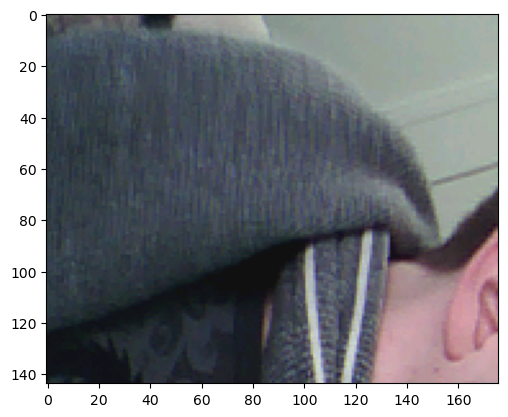

In [16]:

# Reformat the bytes into an image
raw_bytes = np.array(HEXADECIMAL_BYTES, dtype="i2")
image = np.zeros((len(raw_bytes),3), dtype=int)

# Loop through all of the pixels and form the image
for i in range(len(raw_bytes)):
    #Read 16-bit pixel
    pixel = struct.unpack('>h', raw_bytes[i])[0]

    #Convert RGB565 to RGB 24-bit
    r = ((pixel >> 11) & 0x1f) << 3;
    g = ((pixel >> 5) & 0x3f) << 2;
    b = ((pixel >> 0) & 0x1f) << 3;
    image[i] = [r,g,b]

image = np.reshape(image,(144, 176,3)) #QCIF resolution

# Show the image
plt.imshow(image)
plt.show()